<a href="https://colab.research.google.com/github/lorrainelim/data-visualization/blob/main/clinicians_response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Google Drive directory path
dir = 'drive/My Drive/Survey Response/'
!ls 'drive/My Drive/Survey Response/'

clinicians_response.ipynb  clinicians_response.xlsx


In [ ]:
!python --version

Python 3.8.16


In [ ]:
# Import the necessary library
import pandas as pd

df = dir + "clinicians_response.xlsx"
df = pd.read_excel(df)
df.head(3)

Country (affiliation)                                           Position  \
0              Malaysia                                Clinical geneticist   
1              Malaysia  I was responsible for SMA and DMD genetic test...   
2             Indonesia                                     Lab Technician   

  Does your work involve genetic testing?   \
0                                      Yes   
1                                      Yes   
2                                      Yes   

  What is the purpose of the genetic testing that you are carrying out (as part of your work)?                                      \
0  Diagnostic test: Genetic diseases (premarital,...                                                                                 
1  Diagnostic test: Genetic diseases (premarital,...                                                                                 
2  Diagnostic test: Genetic diseases (premarital,...                                                                                 

  How many genetic tests do you do on average per week?  \
0                                             1 - 10      
1                                             1 - 10      
2                                             11- 20      

  How do you get the wet-lab (DNA extraction and sample sequencing / genotyping) part of the genetic testing done?   \
0                         Outsourced internationally                                                                  
1                                           In-house                                                                  
2                                           In-house                                                                  

     If in-house, who gets the genetic testing done?  \
0                                                NaN   
1  Myself (directly or through a team under my di...   
2  Myself (directly or through a team under my di...   

  Which of the following types of genetic testing have you carried out (directly / indirectly)?                        \
0  Microarray (genotyping), Whole exome sequencin...                                                                    
1                                      MLPA and RFLP                                                                    
2                                    Gene sequencing                                                                    

  Upon successful completion of the relevant genetic test, how do you get the data analysis done?  \
0                                           In-house                                                
1                                           In-house                                                
2                                           In-house                                                

  [You chose "in-house"] What type of tools / software / workflow are used to analyze the genetic data?   \
0  Open source, public solutions (software / tool...                                                       
1                                        No software                                                       
2  Open source, public solutions (software / tool...                                                       

   ...  \
0  ...   
1  ...   
2  ...   

  For the following listed application features, how helpful do you think they are in enabling you to run your genetic data analysis effectively?  [Quality control checks]  \
0                                 Needed and helpful                                                                                                                          
1                                 Needed and helpful                                                                                                                          
2                              Optional, but helpful                                                                                       

In [ ]:
# Check header
list(df)

In [ ]:
# Rename the header
df = df.rename(columns={'Country (affiliation)': 'country',
                        'What is the purpose of the genetic testing that you are carrying out (as part of your work)?                                    ': 'purpose_of_genetic_testing',
                        'How many genetic tests do you do on average per week?': 'number_of_genetic_tests_weekly',
                        'Which of the following types of genetic testing have you carried out (directly / indirectly)?                      ': 'types_of_genetic_testing',
                        'For the following listed application features, how helpful do you think they are in enabling you to run your genetic data analysis effectively?  [Intuitive user interface]': 'intuitive_user_interface',
                        'For the following listed application features, how helpful do you think they are in enabling you to run your genetic data analysis effectively?  [Parameter customisation]': 'parameter_customisation',
                        'For the following listed application features, how helpful do you think they are in enabling you to run your genetic data analysis effectively?  [Quality control checks]': 'quality_control_checks',
                        'For the following listed application features, how helpful do you think they are in enabling you to run your genetic data analysis effectively?  [Clinically actionable diagnostic report]': 'clinically_actionable_diagnostic_report',
                        'For the following listed application features, how helpful do you think they are in enabling you to run your genetic data analysis effectively?  [Data sharing]': 'data_sharing',
                        'For the following listed application features, how helpful do you think they are in enabling you to run your genetic data analysis effectively?  [Data visualization]': 'data_visualization',
                        'For the following listed application features, how helpful do you think they are in enabling you to run your genetic data analysis effectively?  [User support]': 'user_support'})

In [ ]:
list(df)

['country',
 'Position',
 'Does your work involve genetic testing? ',
 'purpose_of_genetic_testing',
 'number_of_genetic_tests_weekly',
 'How do you get the wet-lab (DNA extraction and sample sequencing / genotyping) part of the genetic testing done? ',
 'If in-house, who gets the genetic testing done?',
 'types_of_genetic_testing',
 'Upon successful completion of the relevant genetic test, how do you get the data analysis done?',
 '[You chose "in-house"] What type of tools / software / workflow are used to analyze the genetic data? ',
 'What are the common technical and non-technical problems that you face and how do you resolve those issues?',
 'What steps are taken for you to assure the quality of the result?                                                                                 ',
 'Which human reference genome assembly is used for alignment?',
 'Who do you approach in case you need additional consultation to discuss the results of the genetic testing?',
 'Who will make th

# **A5. country**

In [ ]:
df['country'].value_counts()

Malaysia                    17
Indonesia                    7
Germany                      2
United States of America     2
Singapore                    2
China                        1
Iran                         1
Poland                       1
Name: country, dtype: int64

In [ ]:
df['country'] = df['country'].replace(['United States of America'], 'USA')

df['country'].value_counts()

Malaysia     17
Indonesia     7
Germany       2
USA           2
Singapore     2
China         1
Iran          1
Poland        1
Name: country, dtype: int64

In [ ]:
df_country = df['country'].value_counts().rename_axis('country').reset_index(name='counts')
df_country

country  counts
0   Malaysia      17
1  Indonesia       7
2    Germany       2
3        USA       2
4  Singapore       2
5      China       1
6       Iran       1
7     Poland       1

In [ ]:
df_country_clean = df_country

# Add percentage column
df_country_clean['%'] = ((df_country['counts'] / df_country['counts'].sum()) * 100).round(2)
df_country_clean

country  counts      %
0   Malaysia      17  51.52
1  Indonesia       7  21.21
2    Germany       2   6.06
3        USA       2   6.06
4  Singapore       2   6.06
5      China       1   3.03
6       Iran       1   3.03
7     Poland       1   3.03

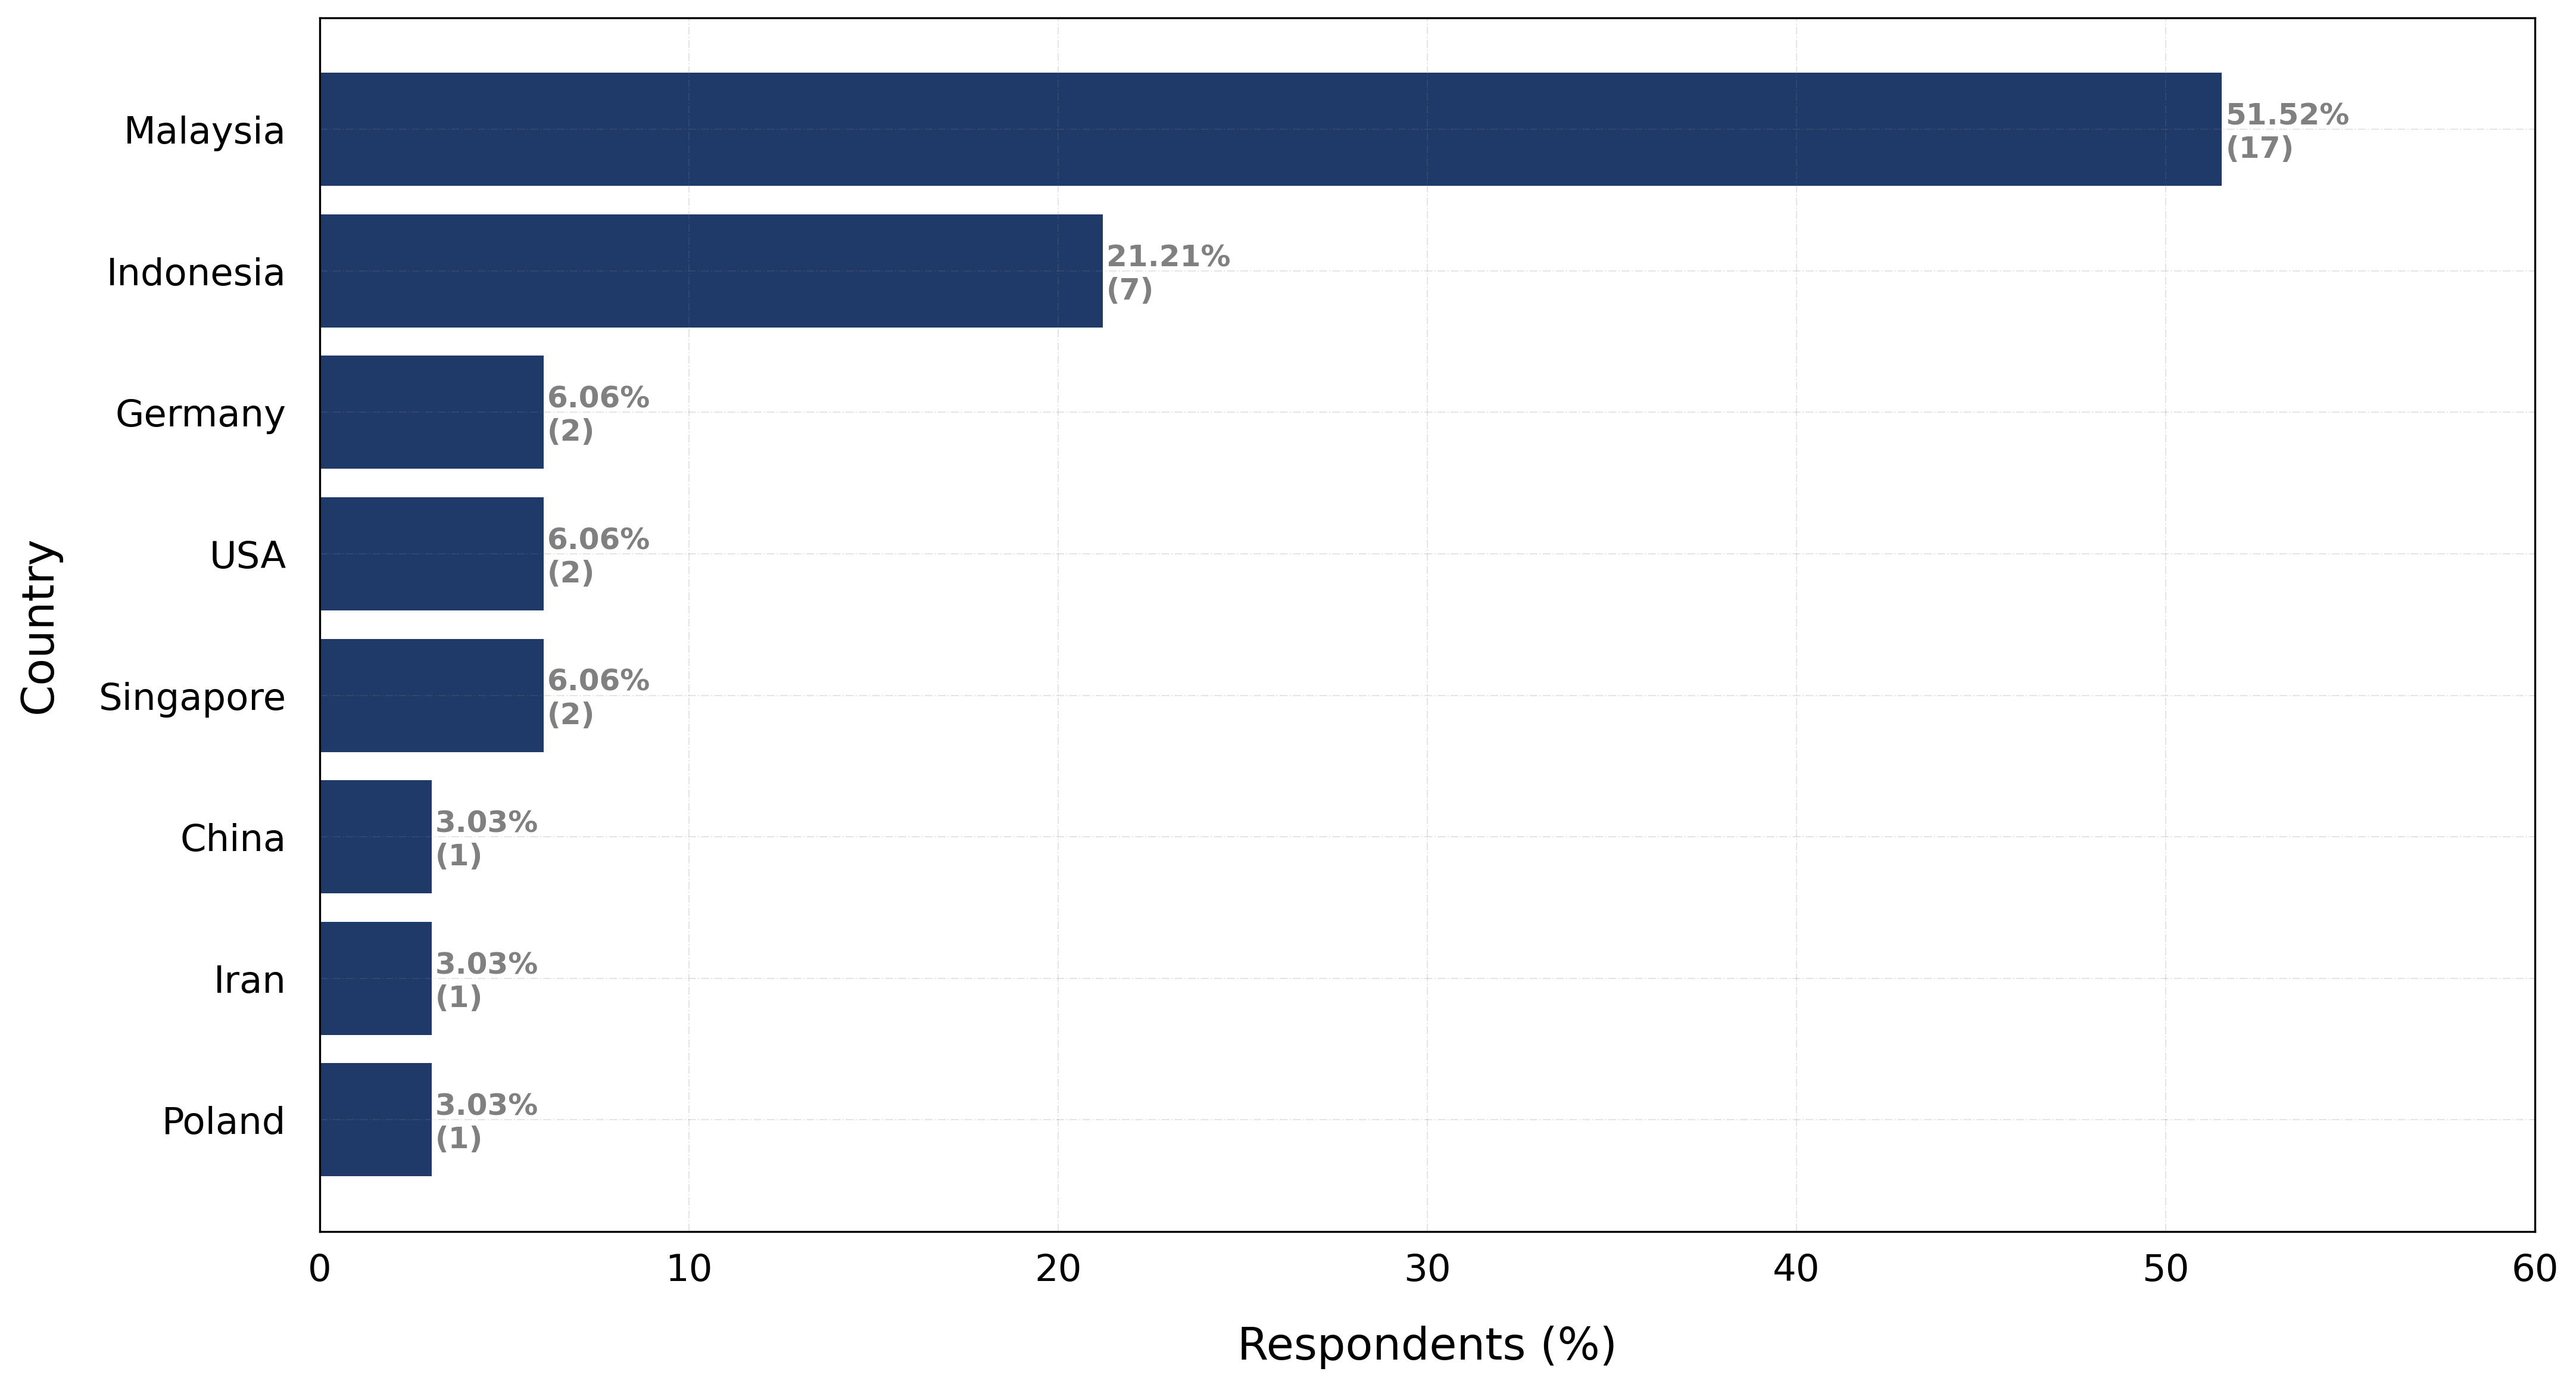

In [ ]:
# Horizontal bar plot
# reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

import matplotlib.pyplot as plt

# Set font size
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the figure title and x, y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Read data
country = df_country['country']
percent = df_country['%']

# Figure size
fig, ax = plt.subplots(figsize =(16, 9))

# Change current axes
plt.xlim(0, 60)

# Horizontal bar plot
ax.barh(country, percent, color="#1F3A68")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
total = 0
for i in ax.patches:
  total += i.get_width()

for i in ax.patches:
    plt.text(i.get_width()+0.1,
             i.get_y()+0.6,
             '{}%\n({})'.format((i.get_width()), round(i.get_width() / total * 33)),
             fontsize = 12, fontweight ='bold',
             color ='grey')

# Set labels
plt.xlabel("Respondents (%)", labelpad = 15)
plt.ylabel("Country", labelpad = 15)
# plt.title("The country of respondents who have experiences in genetic testing", fontweight = 'bold', pad = 20)

plt.gcf().set_dpi(300)

# show plot
plt.show()

# save figure
# plt.savefig('name_plot.png', dpi=300, bbox_inches='tight')

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 36.6 MB/s 
     |████████████████████████████████| 6.3 MB 70.4 MB/s 
     |████████████████████████████████| 16.7 MB 53.4 MB/s 


In [ ]:
# Download cultural vectors from Natural Earth
!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

--2022-08-29 03:21:14--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip [following]
--2022-08-29 03:21:14--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 13.32.151.101, 13.32.151.30, 13.32.151.59, ...
Connecting to naciscdn.org (naciscdn.org)|13.32.151.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K  --.-KB/s    in 0.004s  

2022-08-29 03:21:14 (49.5 MB/s) - ‘ne_110m

In [ ]:
import geopandas as gpd

shapefiles = 'ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefiles)[['ADMIN', 'ADM0_A3', 'geometry']]
world.columns = ['country', 'country_code', 'geometry']
world.head()

country country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [ ]:
print(world[world['country'] == 'Antarctica'])

# Drop row corresponding to 'Antarctica' as it occupies a large space and not required in this analysis
world = world.drop(world.index[159])

        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


In [ ]:
# Merge dataframes world and df_country
merged = world.merge(df_country, how = 'left')
merged

country country_code  \
0                           Fiji          FJI   
1    United Republic of Tanzania          TZA   
2                 Western Sahara          SAH   
3                         Canada          CAN   
4       United States of America          USA   
..                           ...          ...   
171           Republic of Serbia          SRB   
172                   Montenegro          MNE   
173                       Kosovo          KOS   
174          Trinidad and Tobago          TTO   
175                  South Sudan          SDS   

                                              geometry  counts  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...     NaN  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...     NaN  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...     NaN  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...     NaN  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...     2.0  
..                                                 ...     ...  
171  POLYGON ((18.82982 45.90887, 18.82984 45.90888...     NaN  
172  POLYGON ((20.07070 42.58863, 19.80161 42.50009...     NaN  
173  POLYGON ((20.59025 41.85541, 20.52295 42.21787...     NaN  
174  POLYGON ((-61.68000 10.76000, -61.10500 10.890...     NaN  
175  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...     NaN  

[176 rows x 4 columns]

In [ ]:
# Bokeh to incorporate data visualization interactivity
# Bokeh consumes GeoJSON format which represents geographical features with JSON

# Convert merged file to GeoJSON format

import json

# Read data to json
merged_json = json.loads(merged.to_json())

# Convert to string like object
json_data = json.dumps(merged_json)
print(json_data)


{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"country": "Fiji", "country_code": "FJI", "counts": null}, "geometry": {"type": "MultiPolygon", "coordinates": [[[[180.0, -16.067132663642447], [180.0, -16.555216566639196], [179.36414266196414, -16.801354076946883], [178.72505936299711, -17.01204167436804], [178.59683859511713, -16.639150000000004], [179.0966093629971, -16.433984277547403], [179.4135093629971, -16.379054277547404], [180.0, -16.067132663642447]]], [[[178.12557, -17.50481], [178.3736, -17.33992], [178.71806, -17.62846], [178.55271, -18.15059], [177.93266000000003, -18.28799], [177.38146, -18.16432], [177.28504, -17.72465], [177.67087, -17.381140000000002], [178.12557, -17.50481]]], [[[-179.79332010904864, -16.020882256741224], [-179.9173693847653, -16.501783135649397], [-180.0, -16.555216566639196], [-180.0, -16.067132663642447], [-179.79332010904864, -16.020882256741224]]]]}}, {"id": "1", "type": "Feature", "properties": {"country"

In [ ]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer, all_palettes

# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = json_data)

# Define a sequential multi-hue color palette
palette = all_palettes['Viridis'][11] # may change to brewer['RdBu']
# reference (palettes): https://docs.bokeh.org/en/latest/docs/reference/palettes.html

# Reverse colour order (optional)
palette = palette[::-1]

# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 17, nan_color = '#d9d9d9')

# Create colour bar
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 20, height = 560,
border_line_color=None,location = (0,0), orientation = 'vertical')

# Create figure object
p = figure(plot_height = 600 , plot_width = 1150, toolbar_location = None) # may add title here
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.visible = False
p.yaxis.visible = False

# Add patch renderer to figure
p.patches('xs','ys', source = geosource,fill_color = {'field' :'counts', 'transform' : color_mapper},
          line_color = 'darkgrey', line_width = 0.5, fill_alpha = 2)

# Specify figure layout
p.add_layout(color_bar, 'right')

# Display figure inline in Notebook
output_notebook()

# # save figure
# export_png(p, filename = 'respondent_country.png', height = 600, width = 950)

# Display figure
show(p)

####

# !pip install cairosvg
# !conda install -c conda-forge firefox geckodriver

# from bokeh.io import export_svg, export_png
# from bokeh.plotting import Figure
# from cairosvg import svg2png

# p = Figure()
# p.scatter(x=[1, 2, 3], y=[1, 2, 3])

# export_png(p, filename='low_resolution_output.png')

# p.output_backend = 'svg'
# export_svg(p, filename='temporary.svg')
# svg2png(url='temporary.svg', write_to='high_resolution_output.png', scale=2.5)

# **A6. Position**

In [ ]:
# check data values
df['Position'].value_counts()

Clinical geneticist                                                             10
Genetic Counselor                                                                3
Lab Technician                                                                   2
Statistical geneticist                                                           2
Post doctoral researcher                                                         1
Consultant Diabetologist                                                         1
Molecular geneticist                                                             1
Geneticist (Researcher)                                                          1
Lecturer                                                                         1
Researcher                                                                       1
Assistant Professor                                                              1
University Lecturer                                                              1
Rese

In [ ]:
df['Position'] = df['Position'].replace(['Statistical geneticist', 'Researcher (Molecular Diagnostics and Genetics) ', 'Molecular geneticist',
                                         'Geneticist (Researcher)', 'Lecturer', 'Researcher', 'Assistant Professor', 'Post doctoral researcher ',
                                         'Health Informatician', 'University Lecturer', 'I was responsible for SMA and DMD genetic testing in Human Genome Center USM',
                                         'Bioinformatician', 'clinical pathologist, lecturer, researcher',
                                         'Genetic Lecturer', 'Attending Physician', 'Consultant Diabetologist'],
                                        'Others')

df['Position'].value_counts()

Others                         17
Clinical geneticist            10
Genetic Counselor               3
Lab Technician                  2
Trainee Clinical Geneticist     1
Name: Position, dtype: int64

In [ ]:
df_position_count = df['Position'].value_counts().rename_axis('position').reset_index(name='count')
df_position_count

position  count
0                       Others     17
1          Clinical geneticist     10
2            Genetic Counselor      3
3               Lab Technician      2
4  Trainee Clinical Geneticist      1

In [ ]:
df_position_clean = df_position_count

# Add percentage column
df_position_clean['%'] = ((df_position_count['count'] / df_position_count['count'].sum()) * 100).round(2)
df_position_clean

position  count      %
0                       Others     17  51.52
1          Clinical geneticist     10  30.30
2            Genetic Counselor      3   9.09
3               Lab Technician      2   6.06
4  Trainee Clinical Geneticist      1   3.03

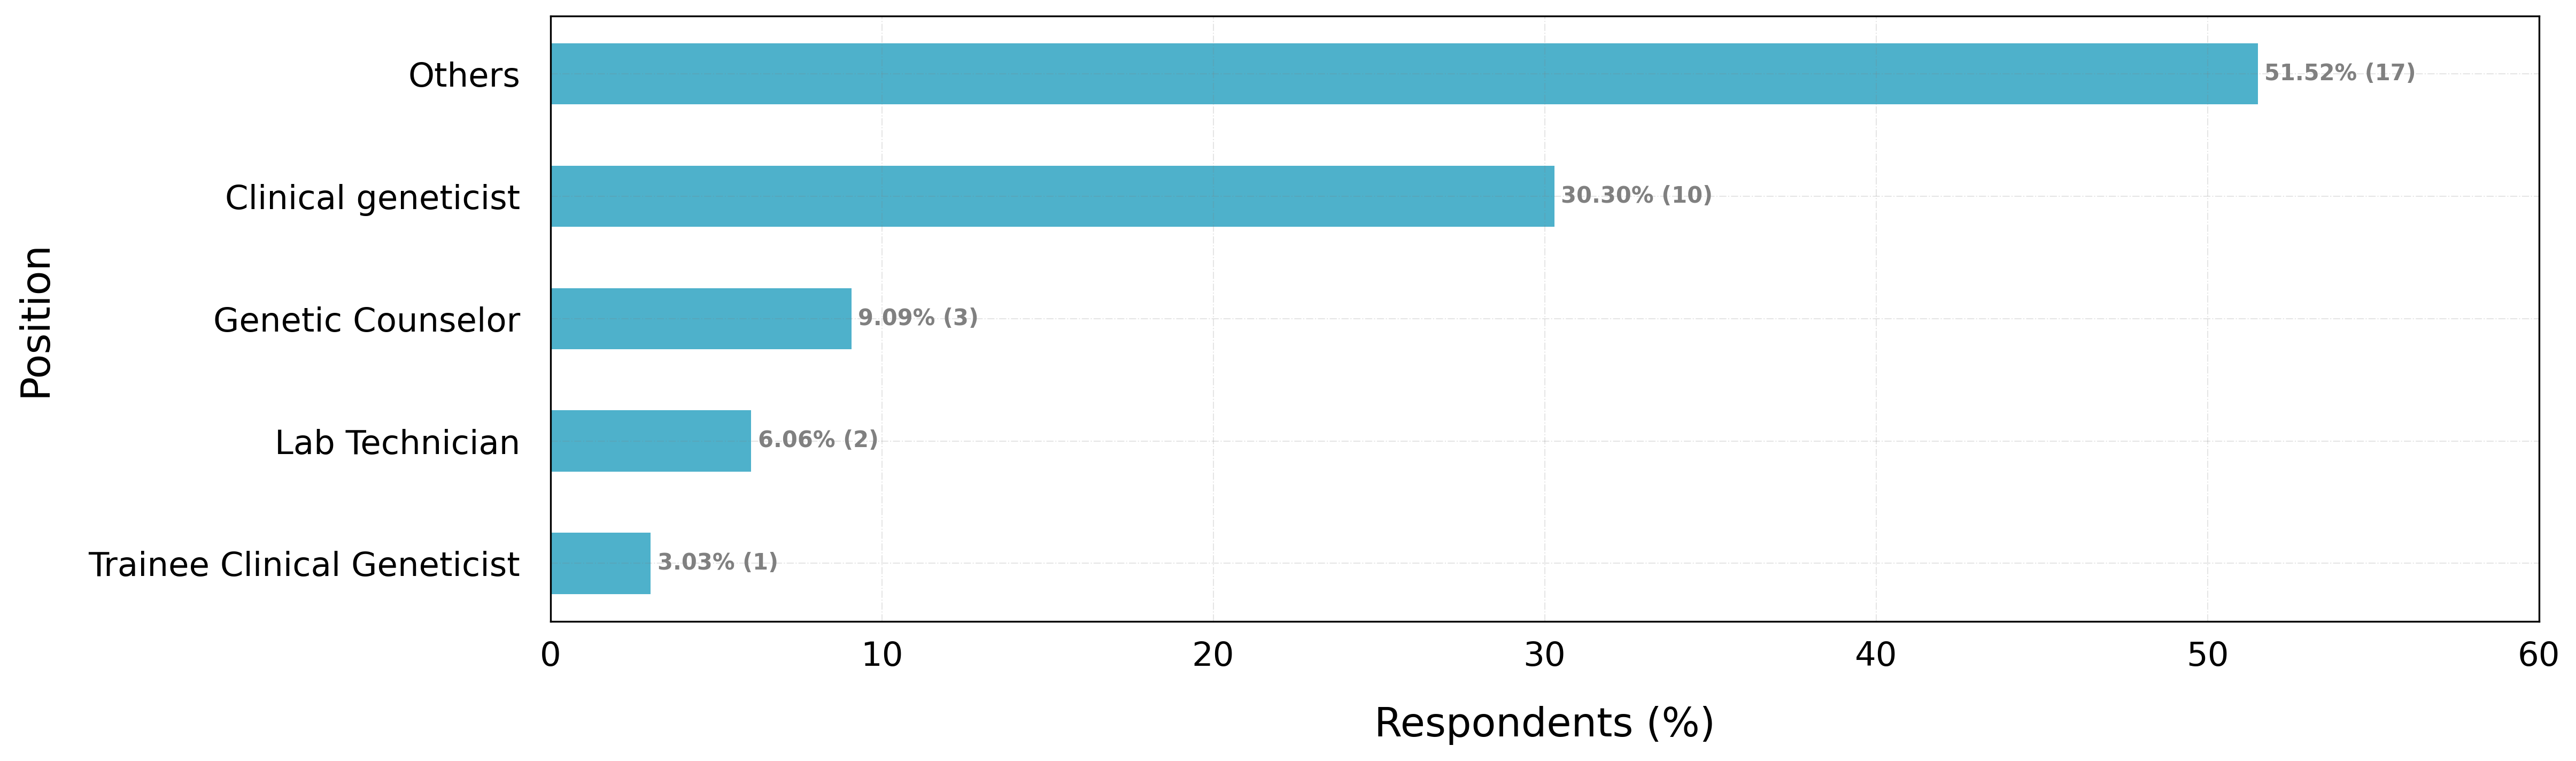

In [ ]:
# Horizontal bar plot
# reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
# reference: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the figure title and x, y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Read data
position = df_position_count['position']
percent = df_position_clean['%']

# Figure size
fig, ax = plt.subplots(figsize =(16, 5))

# Change current axes
plt.xlim(0, 60)

# Horizontal bar plot
ax.barh(position, percent, height=0.5, color="#4EB1CB")


# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
total = 0
for i in ax.patches:
  total += i.get_width()

for i in ax.patches:
    plt.text(i.get_width()+0.2,
             i.get_y()+0.3,
             '{:.2f}% ({})'.format((i.get_width()), round(i.get_width() / total * 33)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Set labels
plt.xlabel("Respondents (%)", labelpad = 15)
plt.ylabel("Position", labelpad = 15)
# plt.title("The position of respondents who have experiences in genetic testing", fontweight = 'bold', pad = 20)

# Display in 300dpi
plt.gcf().set_dpi(300)

# show plot
plt.show()

# save figure
# plt.savefig('name_plot.png', dpi=300, bbox_inches='tight')

# **A6. Position - added extra positions** ❌

In [ ]:
df['Position']

0                                   Clinical geneticist
1     I was responsible for SMA and DMD genetic test...
2                                        Lab Technician
3                                   Attending Physician
4                                     Genetic Counselor
5                                      Genetic Lecturer
6            clinical pathologist, lecturer, researcher
7                                Statistical geneticist
8                                Statistical geneticist
9                                      Bioinformatician
10                                  Clinical geneticist
11                                  Clinical geneticist
12                                 Health Informatician
13                                  Clinical geneticist
14                                  Clinical geneticist
15                                    Genetic Counselor
16                                  Clinical geneticist
17                                  University L

In [ ]:
# check data values, run value counts () return a series
df['Position'].value_counts()

Clinical geneticist                                                             10
Genetic Counselor                                                                3
Lab Technician                                                                   2
Statistical geneticist                                                           2
Post doctoral researcher                                                         1
Consultant Diabetologist                                                         1
Molecular geneticist                                                             1
Geneticist (Researcher)                                                          1
Lecturer                                                                         1
Researcher                                                                       1
Assistant Professor                                                              1
University Lecturer                                                              1
Rese

In [ ]:
# Create a variable for this 'Position' series
series_position = df['Position']
series_position

0                                   Clinical geneticist
1     I was responsible for SMA and DMD genetic test...
2                                        Lab Technician
3                                   Attending Physician
4                                     Genetic Counselor
5                                      Genetic Lecturer
6            clinical pathologist, lecturer, researcher
7                                Statistical geneticist
8                                Statistical geneticist
9                                      Bioinformatician
10                                  Clinical geneticist
11                                  Clinical geneticist
12                                 Health Informatician
13                                  Clinical geneticist
14                                  Clinical geneticist
15                                    Genetic Counselor
16                                  Clinical geneticist
17                                  University L

In [ ]:
# Clean & categorize the position in the series

series_position = series_position \
                      .replace(['Molecular geneticist', 'Health Informatician', 'I was responsible for SMA and DMD genetic testing in Human Genome Center USM', 'Bioinformatician', 'Attending Physician', 'Consultant Diabetologist'], 'Others') \
                      .replace(['Researcher (Molecular Diagnostics and Genetics) ','Geneticist (Researcher)', 'Researcher', 'Post doctoral researcher '], 'Researcher') \
                      .replace(['Lecturer', 'Assistant Professor','University Lecturer', 'clinical pathologist, lecturer, researcher', 'Genetic Lecturer'], 'Lecturer') \
                      .replace(['Trainee Clinical Geneticist'], 'Clinical geneticist')


df_position_count = series_position.value_counts().rename_axis('position').reset_index(name='count')
df_position_count


position  count
0     Clinical geneticist     11
1                  Others      6
2                Lecturer      5
3              Researcher      4
4       Genetic Counselor      3
5          Lab Technician      2
6  Statistical geneticist      2

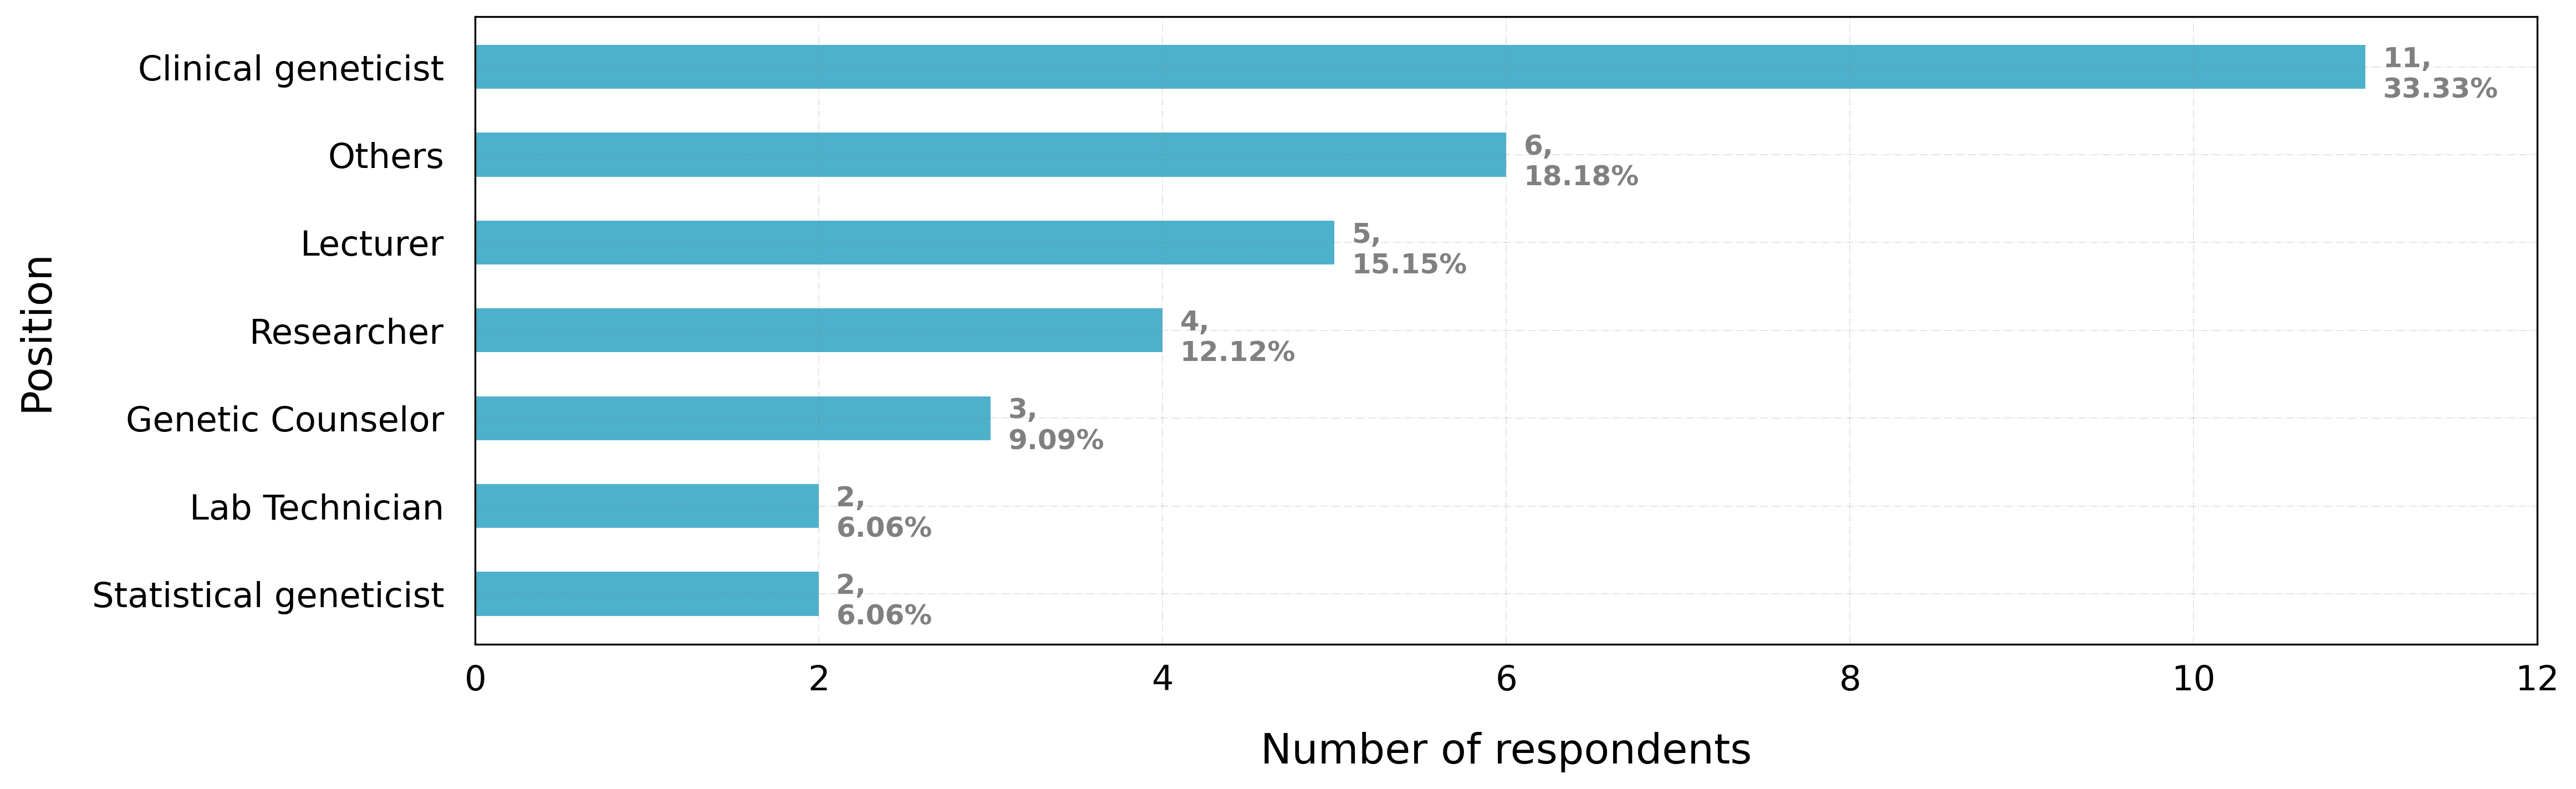

In [ ]:
# Horizontal bar plot
# reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
# reference: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the figure title and x, y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Read data
position = df_position_count['position']
count = df_position_count['count']

# Figure size
fig, ax = plt.subplots(figsize =(16, 5))

# Change current axes
plt.xlim(0, 12)

# Horizontal bar plot
ax.barh(position, count, height=0.5, color="#4EB1CB")


# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Show top values
ax.invert_yaxis()

# Add annotation to bars (count, %)

total = 0
for i in ax.patches:
  total += i.get_width()

for i in ax.patches:
    plt.text(i.get_width()+0.1,
             i.get_y()+0.6,
             '{},\n{}%'.format((i.get_width()), round(i.get_width() / total * 100, 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')

# # Add annotation to bars
# for i in ax.patches:
#     plt.text(i.get_width()+0.2, i.get_y()+0.3,
#              str(round((i.get_width()), 2)),
#              fontsize = 10, fontweight ='bold',
#              color ='grey')

# Set labels
plt.xlabel("Number of respondents",labelpad = 15)
plt.ylabel("Position", labelpad = 15)
# plt.title("The position of respondents who have experiences in genetic testing", fontweight = 'bold', pad = 20)

# Display in 300dpi
plt.gcf().set_dpi(300)

# show plot
plt.show()

# save figure
# plt.savefig('name_plot.png', dpi=300, bbox_inches='tight')

# **B2. purpose_of_genetic_testing**

Options:

- Diagnostic test: Genetic diseases (premarital, prenatal, newborn, adult onset)
- Predisposition, predictive & prognostic test: Multifactorial diseases, Cancer targeted treatments, Physical traits (sport medicine), Mental traits
- Pharmacogenomics test: Drug metabolism, Drug response, Adverse drug reactions
- others

In [ ]:
df_test_purpose = df['purpose_of_genetic_testing'] \
  .str.replace('Diagnostic test\: Genetic diseases \(premarital, prenatal, newborn, adult onset\)', 'Diagnostic test') \
  .str.replace('Predisposition, predictive & prognostic test\: Multifactorial diseases, Cancer targeted treatments, Physical traits \(sport medicine\), Mental traits', 'Predisposition test') \
  .str.replace('Pharmacogenomics test\: Drug metabolism, Drug response, Adverse drug reactions', 'Pharmacogenomics test') \
  .str.split(', ') \
  .explode('types_of_genetic_testing') \
  .replace(['paternity test', 'Secondary findings in population genetic studies', 'infertility', 'carrier testing',
            'predictive test for mendelian disease', 'Facilitation of Testing via Technology Platforms to be more precise',
            'Previously during postgraduate studies dealing with patients with alpha and beta thalassaemia',
            'did molecular diagnostics and molecular genetics testing on samples collected', 'Research', 'biomarker discovery',
            'therapeutic targets identification (research)'], 'Others') \
  .value_counts() \
  .rename_axis('test_purpose') \
  .reset_index(name='count')

df_test_purpose


<ipython-input-6-ee4ae03de07b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test_purpose = df['purpose_of_genetic_testing'] \


test_purpose  count
0        Diagnostic test     24
1    Predisposition test     19
2                 Others     11
3  Pharmacogenomics test      6

In [ ]:
# Drop 'Others'
df_test_purpose_clean = df_test_purpose.drop(index=[2], axis=0)
df_test_purpose_clean


test_purpose  count
0        Diagnostic test     24
1    Predisposition test     19
3  Pharmacogenomics test      6

In [ ]:
# Add percentage column as string
df_test_purpose_clean['%'] = ((df_test_purpose_clean['count'] / df_test_purpose_clean['count'].sum()) * 100).round(2)
df_test_purpose_clean

# print(df_test_purpose_clean['%'].dtypes)

test_purpose  count      %
0        Diagnostic test     24  48.98
1    Predisposition test     19  38.78
3  Pharmacogenomics test      6  12.24

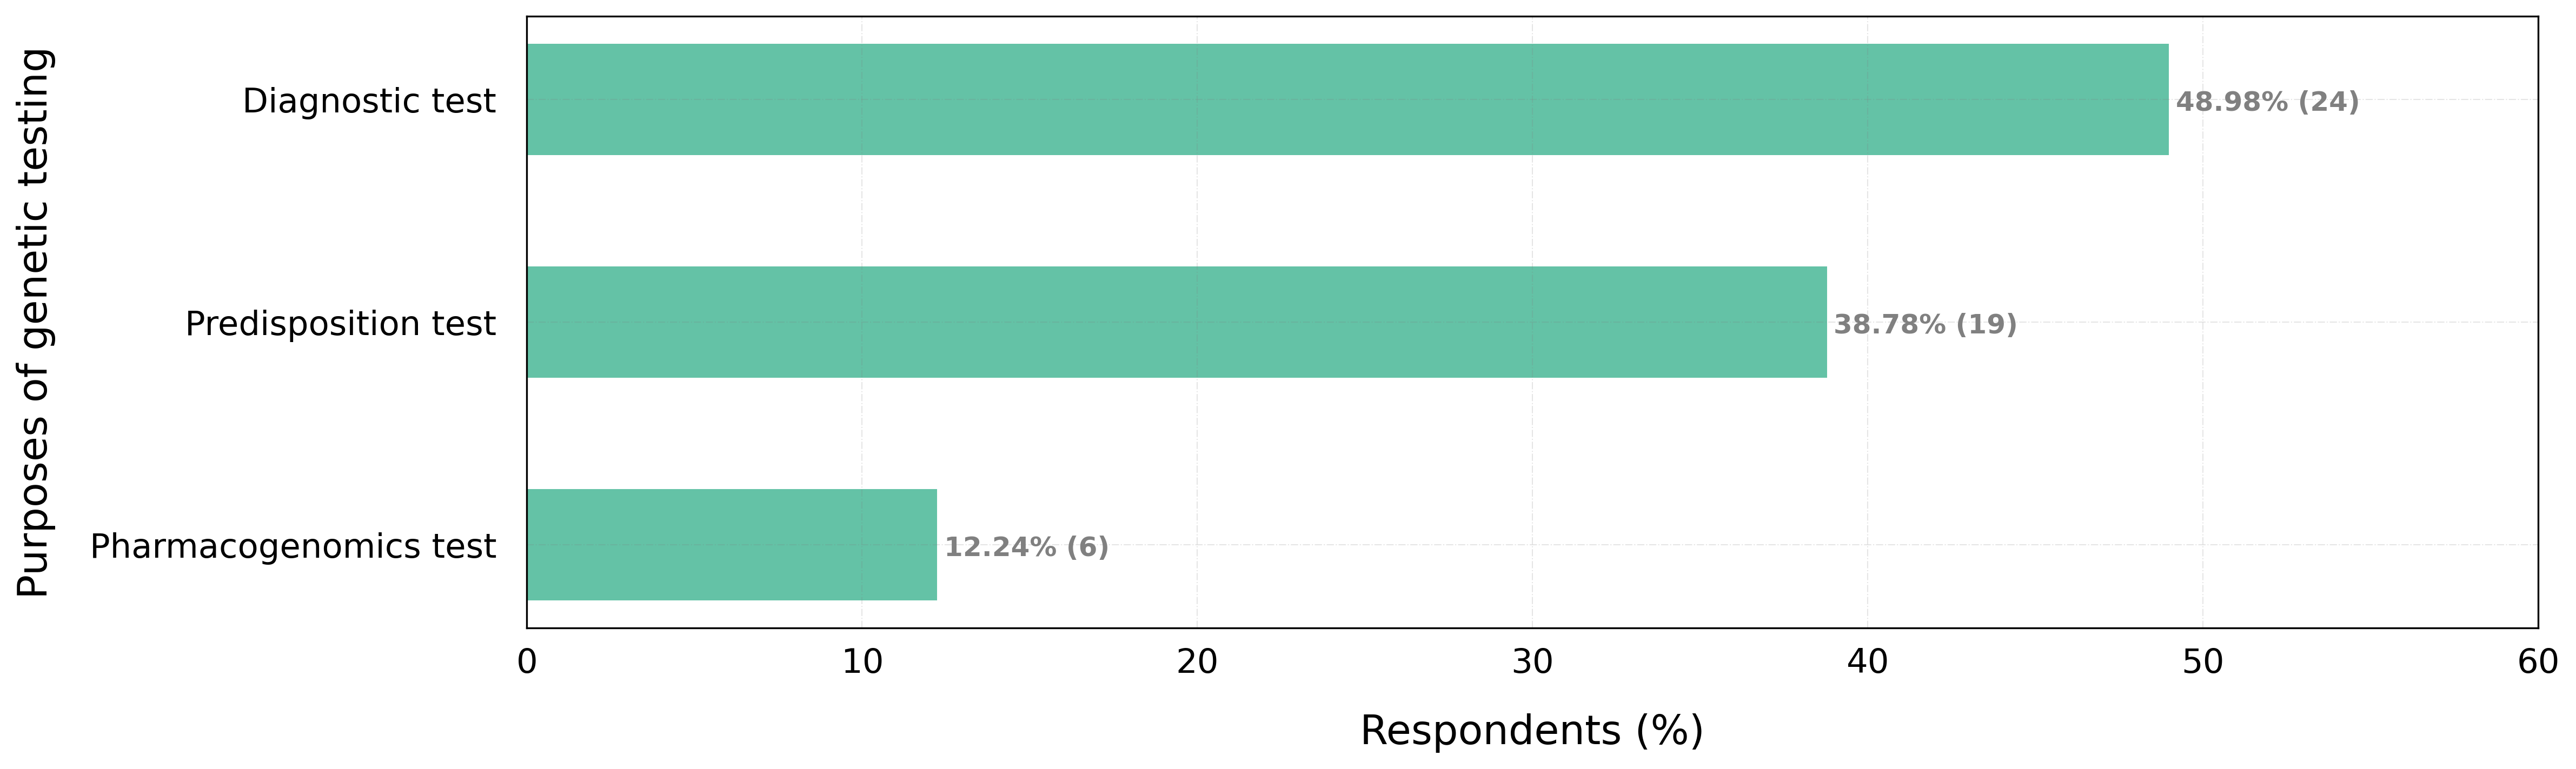

In [ ]:
# Horizontal bar plot
# reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
# reference: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the figure title and x, y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Read data
purpose = df_test_purpose_clean['test_purpose']
percent = df_test_purpose_clean['%']
count = df_test_purpose_clean['count']

# Figure size
fig, ax = plt.subplots(figsize =(16, 5))

# Change current axes
# plt.xlim(left=0, right=22)

# Horizontal bar plot
# my_colors = ['#4EB1CB', '#F66D44', '#64C2A6']
ax.barh(purpose, percent, height=0.5, color='#64C2A6')

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Set xticks
# plt.xticks([0,4,8,12,16,20,24,28])
plt.xticks([0,10,20,30,40,50,60])

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Show top values
ax.invert_yaxis()

# total = sum(item.get_width() for item in ax.patches)
# Add annotation to bars

total = 0
for i in ax.patches:
  total += i.get_width()

for i in ax.patches:
    plt.text(i.get_width()+0.2,
             i.get_y()+0.3,
             '{}% ({})'.format((i.get_width()), round(i.get_width() / total * 49)),
             fontsize = 12, fontweight ='bold',
             color ='grey')

# Set labels
plt.xlabel("Respondents (%)", labelpad = 15)
plt.ylabel("Purposes of genetic testing", labelpad = 15)
# plt.title("Purposes of genetic testing which have been carried out as part of work", fontweight = 'bold', pad = 20)

# Display in 300dpi
plt.gcf().set_dpi(300)

# show plot
plt.show()

# **B3. number_of_genetic_tests_weekly**

In [ ]:
df['number_of_genetic_tests_weekly'].value_counts()

1 - 10          27
11- 20           3
51 and above     1
41- 50           1
21 - 30          1
Name: number_of_genetic_tests_weekly, dtype: int64

In [ ]:
df_numtest = df['number_of_genetic_tests_weekly'].value_counts().rename_axis('num_gen_test_wk').reset_index(name='count').sort_values(by=['num_gen_test_wk'])
df_numtest

# 31-40 - no one select

num_gen_test_wk  count
0          1 - 10     27
1          11- 20      3
4         21 - 30      1
3          41- 50      1
2    51 and above      1

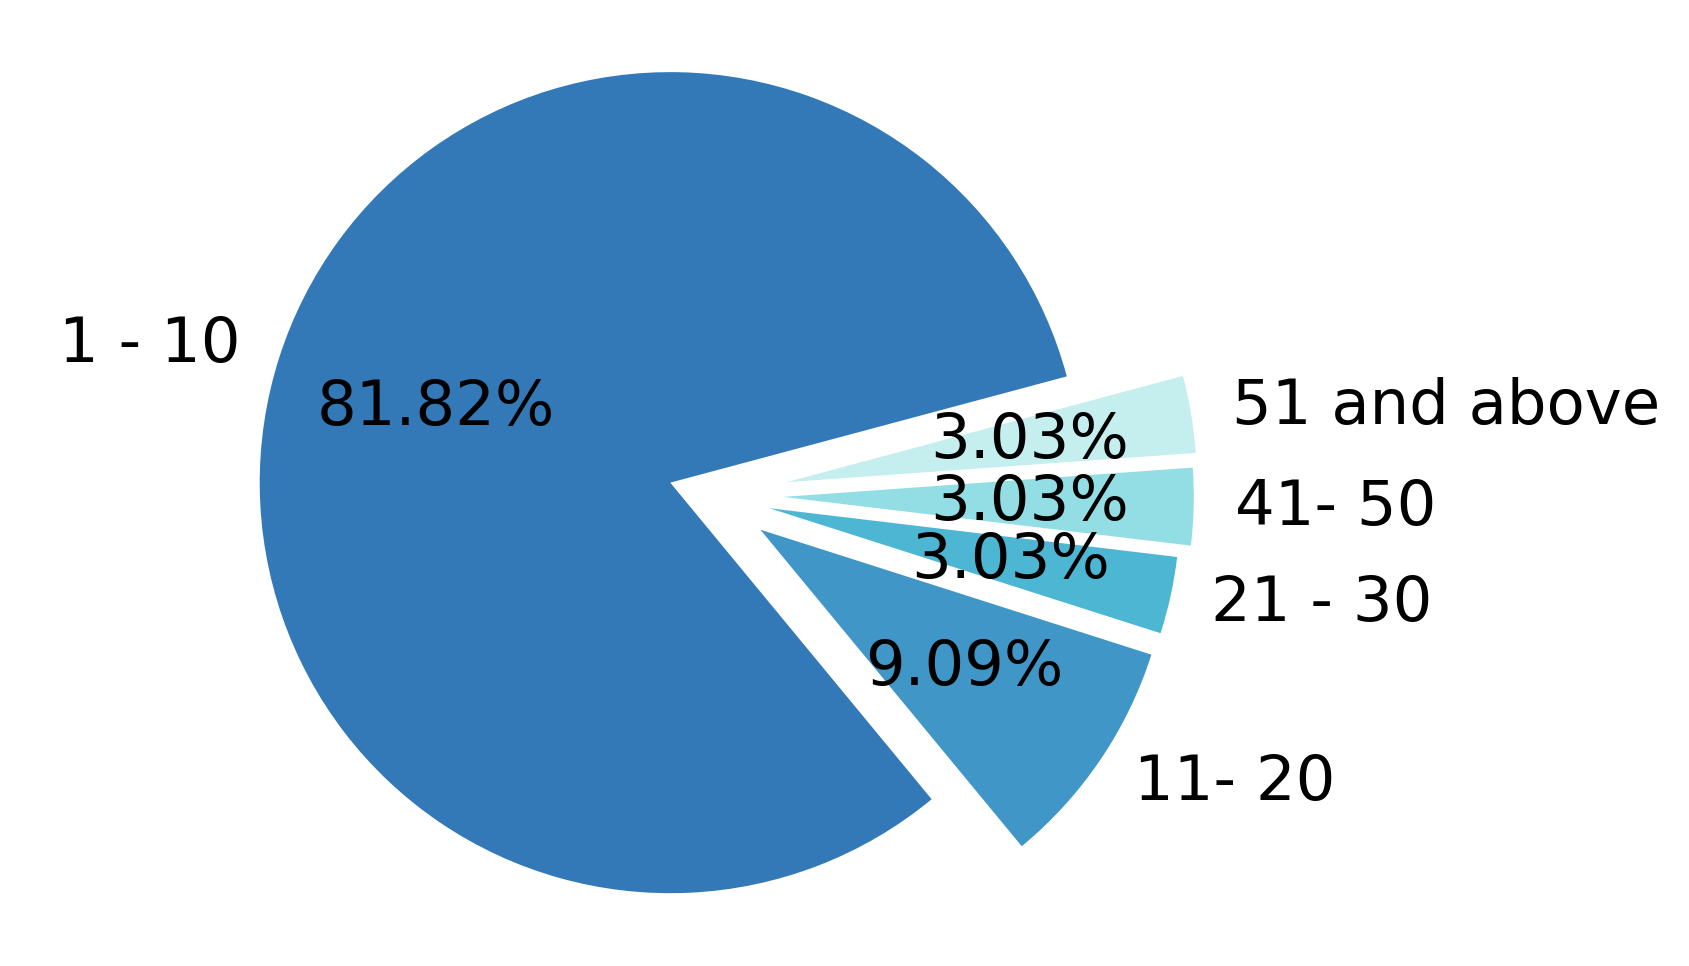

In [ ]:
# reference: https://datatofish.com/pie-chart-matplotlib/

import matplotlib.pyplot as plt

my_colors = ['#3379B7', '#4096C7', '#4DB7D3', '#92DEE4', '#C5EEEF']

# Define the ratio of gap of each fragment in a tuple
explode = (0.1, 0.15, 0.15, 0.18, 0.19)

plt.pie(df_numtest['count'],autopct='%1.2f%%', startangle=15, labels = df_numtest['num_gen_test_wk'],
        colors = my_colors, explode = explode)
plt.axis('equal')

# plt.legend(loc="lower right")

# plt.title('Number of genetic tests done on average per week ', fontsize=15)

plt.gcf().set_dpi(300)

plt.show()
# save figure
# plt.savefig('drive/My Drive/survey-response/num_gen_test_wk.png', dpi=300, bbox_inches='tight')

# **B6. types of genetic testing carried out - horizontal bar chart**

In [ ]:
# Check values
df['types_of_genetic_testing'].value_counts()

Gene sequencing                                                                                                   5
Microarray (genotyping), Gene sequencing, Whole exome sequencing (WES)                                            4
Microarray (genotyping), Whole exome sequencing (WES), Whole genome sequencing (WGS)                              3
Microarray (genotyping), Gene sequencing, Whole exome sequencing (WES), Whole genome sequencing (WGS)             2
Microarray (genotyping), Gene sequencing                                                                          2
Whole exome sequencing (WES), whole transcriptome (research)                                                      1
Gene sequencing, PCR                                                                                              1
Microarray (genotyping), Gene sequencing, MLPA, RT-PCR                                                            1
NGS & MLPA test conducted in-house/outsourced                           

In [ ]:
df_genetic_test = df['types_of_genetic_testing'] \
  .str.split(', ') \
  .explode('types_of_genetic_testing') \
  .replace(['MLPA', 'Karyotyping', 'FISH', 'Cytogenetic testing', 'PCR ', 'RT-PCR', 'NGS & MLPA test conducted in-house/outsourced',
            'PCR-sequencing', 'UPD testing', 'Do not influence the type of testing but could be all the listed above',
            'Methylation studies', 'Panel sequencing', 'MLPA and RFLP', 'whole transcriptome (research)'],
           'Others') \
  .value_counts() \
  .rename_axis('gen_test_types') \
  .reset_index(name='count')

df_genetic_test

gen_test_types  count
0                Gene sequencing     22
1                         Others     18
2   Whole exome sequencing (WES)     17
3        Microarray (genotyping)     16
4  Whole genome sequencing (WGS)      8

In [ ]:
# Drop 'Others'
df_genetic_test_clean = df_genetic_test.drop(index=[1], axis=0)
df_genetic_test_clean

gen_test_types  count
0                Gene sequencing     22
2   Whole exome sequencing (WES)     17
3        Microarray (genotyping)     16
4  Whole genome sequencing (WGS)      8

In [ ]:
# Add percentage column
df_genetic_test_clean['%'] = ((df_genetic_test_clean['count'] / df_genetic_test_clean['count'].sum()) * 100).round(2)
df_genetic_test_clean


gen_test_types  count      %
0                Gene sequencing     22  34.92
2   Whole exome sequencing (WES)     17  26.98
3        Microarray (genotyping)     16  25.40
4  Whole genome sequencing (WGS)      8  12.70

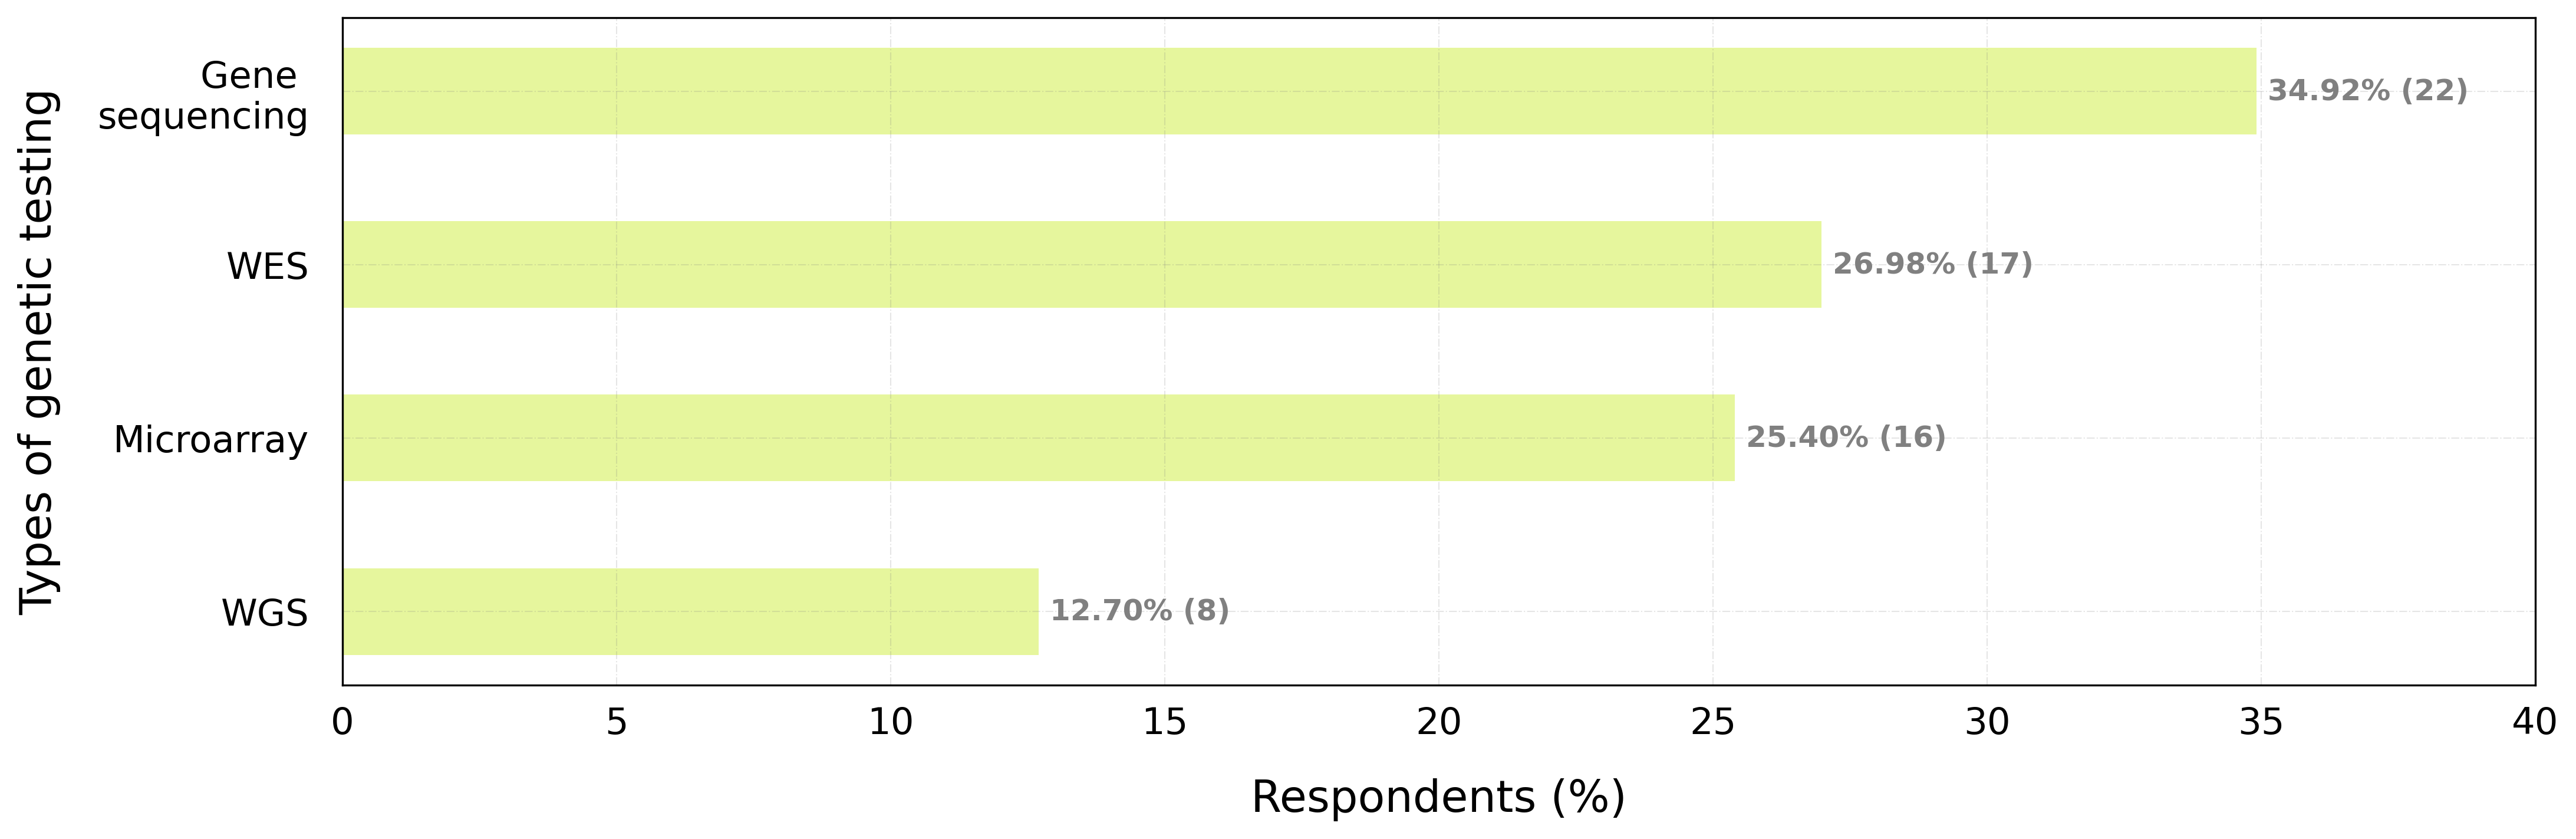

In [ ]:
# Horizontal bar plot
# reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
# reference: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the figure title and x, y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Data
genetic_test = ['Gene \nsequencing', 'WES', 'Microarray', 'WGS']
count = [22, 17, 16, 8]
percent = [34.92, 26.98, 25.40, 12.70]

# Figure size
fig, ax = plt.subplots(figsize =(16, 5))

# Change current axes
# plt.xlim(left=0, right=22)

# Horizontal bar plot
# my_colors = ['#4EB1CB', '#F66D44', '#64C2A6', '#E6F69D']
ax.barh(genetic_test, percent, height=0.5, color='#E6F69D')

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Set xticks
plt.xticks([0,5,10,15,20,25,30,35,40])

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Show top values
ax.invert_yaxis()

# total = sum(item.get_width() for item in ax.patches)
# Add annotation to bars

total = 0
for i in ax.patches:
  total += i.get_width()

for i in ax.patches:
    plt.text(i.get_width()+0.2,
             i.get_y()+0.3,
             '{:.2f}% ({})'.format(i.get_width(), round(i.get_width() / total * 63)),
             fontsize = 12, fontweight ='bold',
             color ='grey')

# Set labels
plt.xlabel("Respondents (%)", labelpad = 15)
plt.ylabel("Types of genetic testing", labelpad = 15)
# plt.title("Types of genetic testing which have been carried out", fontweight = 'bold', pad = 20)

# Display in 300dpi
plt.gcf().set_dpi(300)

# show plot
plt.show()

# **B4 & 7. Primary & Sec Analysis**

ValueError: ignored

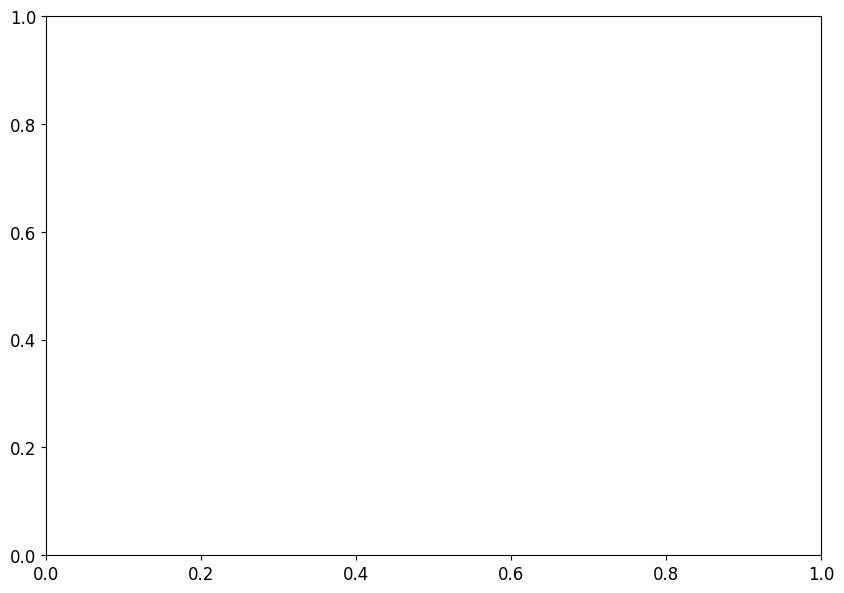

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the figure title and x, y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# create data (17/10/22) from MainData-Diagnost...xlsx (local pc)
x = np.arange(2)
# y1 = [19, 26] # In-house [wet-lab, data analysis]19
# y2 = [7, 8] # Outsourced locally [wet-lab, data analysis]7
# y3 = [8, 5] # Outsourced internationally [wet-lab, data analysis]8

y1 = [55.88, 66.67] # In-house [wet-lab, data analysis]
y2 = [20.59, 20.51] # Outsourced locally [wet-lab, data analysis]
y3 = [23.53, 12.82] # Outsourced internationally [wet-lab, data analysis]
width = 0.2

# my_colors = ['#4EB1CB', '#F66D44', '#64C2A6', '#E6F69D', '#FEAE65']
# colors = blue, red, green, yellow

# Figure size
fig, ax = plt.subplots(figsize =(10, 7))

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Set xticks
plt.xticks([0,10,20,30,40,50,60,70])

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='#4EB1CB')
plt.bar(x, y2, width, color='#F66D44')
plt.bar(x+0.2, y3, width, color='#FEAE65')


for i in ax.patches:
  plt.text(
    i.get_x(),
    i.get_height()+0.3,
    '{}%'.format(i.get_height()),
    fontsize = 10,
    fontweight ='bold',
    color ='grey'
  )

plt.xticks(x, ['Wet lab (Primary analysis)', 'Data analysis (Secondary analysis)'])
plt.xlabel("In/outsourcing of genetic testing analyses", labelpad = 15)
plt.ylabel("Respondents (%)", labelpad = 15)
# plt.title("Main services of running primary and\nsecondary analyses of genetic testing", fontweight = 'bold', pad = 20)
plt.legend(["In-house", "Outsourced locally", "Outsourced internationally"], loc='upper left')

# Display in 300dpi
plt.gcf().set_dpi(300)

plt.show()


# **B8 [You chose "in-house"], what type of tools / software / workflow are used to analyze the genetic data?**






In [ ]:
df['[You chose "in-house"] What type of tools / software / workflow are used to analyze the genetic data? '].value_counts()

Open source, public solutions (software / tools / workflows)    15
Commercial solutions (software / tools / workflows)              5
No software                                                      1
I don’t know / I am not sure                                     1
Name: [You chose "in-house"] What type of tools / software / workflow are used to analyze the genetic data? , dtype: int64

In [ ]:
series_software_type = df['[You chose "in-house"] What type of tools / software / workflow are used to analyze the genetic data? ']
series_software_type

In [ ]:
# Replace label text in the series

series_software_type = series_software_type \
                        .replace(['Open source, public solutions (software / tools / workflows)'], 'Open source, public solutions') \
                        .replace(['Commercial solutions (software / tools / workflows)'], 'Commercial solutions')


df_software_type_count = series_software_type.value_counts().rename_axis('software_type').reset_index(name='count')
df_software_type_count

software_type  count
0  Open source, public solutions     15
1           Commercial solutions      5
2                    No software      1
3   I don’t know / I am not sure      1

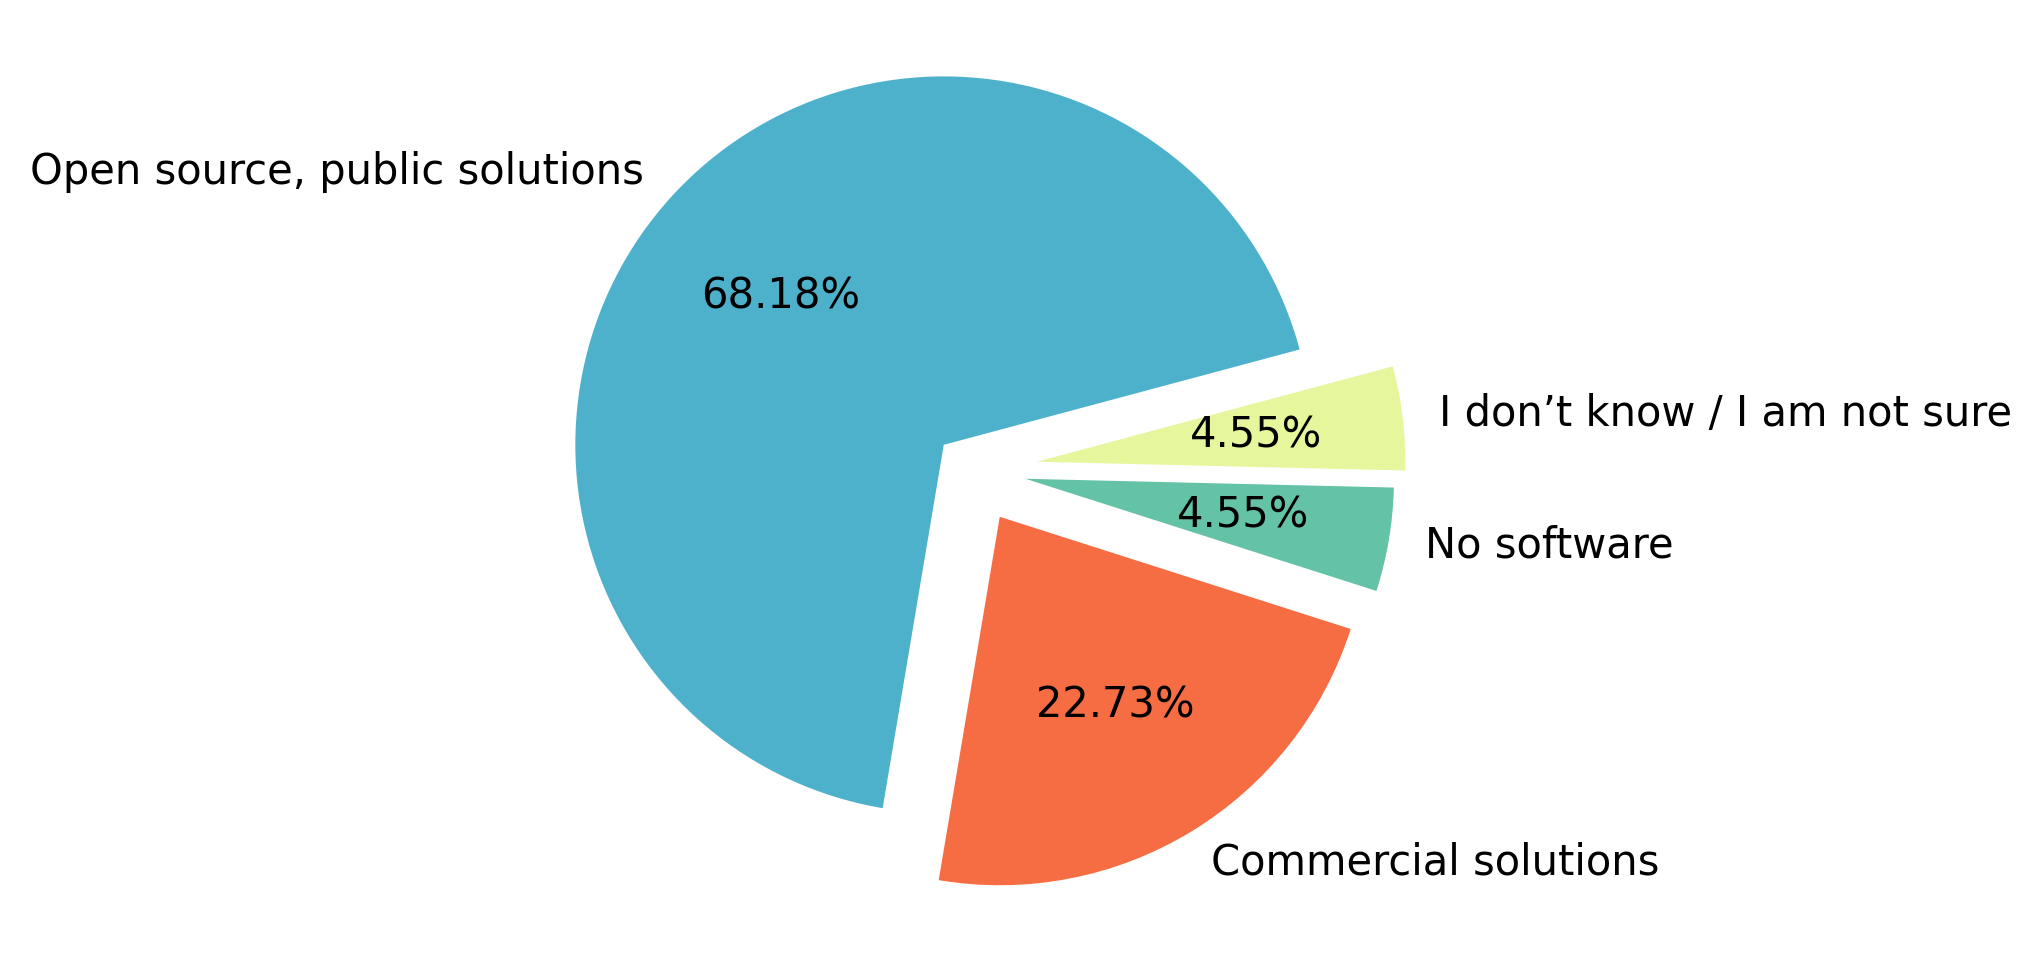

In [ ]:
# reference: https://datatofish.com/pie-chart-matplotlib/

import matplotlib.pyplot as plt

# my_colors = ['#a0bace', '#c0c0c0', '#8c8488', '#afd5e2', '#3090ad'] , '#FEAE65'
my_colors = ['#4EB1CB', '#F66D44', '#64C2A6', '#E6F69D']
# my_colors = ['#3379B7', '#4096C7', '#4DB7D3', '#92DEE4', '#C5EEEF'] #gradient blue

# Define the ratio of gap of each fragment in a tuple , 0.19
explode = (0.1, 0.15, 0.15, 0.18)

plt.pie(df_software_type_count['count'],autopct='%1.2f%%', startangle=15, labels = df_software_type_count['software_type'],
        colors = my_colors, explode = explode)
plt.axis('equal')

# plt.legend(loc="lower right")

# plt.title('Number of genetic tests done on average per week ', fontsize=15)

plt.gcf().set_dpi(300)

plt.show()


# **B11. Which human reference genome assembly is used for alignment?**






In [ ]:
df['Which human reference genome assembly is used for alignment?'].value_counts()

Both (GRCh37 and GRCh38)        17
GRCh37                           6
GRCh38                           5
I don’t know / I am not sure     4
Name: Which human reference genome assembly is used for alignment?, dtype: int64

In [ ]:
series_refgenome = df['Which human reference genome assembly is used for alignment?']
series_refgenome

0         Both (GRCh37 and GRCh38)
1                           GRCh38
2                           GRCh38
3         Both (GRCh37 and GRCh38)
4     I don’t know / I am not sure
5         Both (GRCh37 and GRCh38)
6     I don’t know / I am not sure
7         Both (GRCh37 and GRCh38)
8         Both (GRCh37 and GRCh38)
9                           GRCh37
10        Both (GRCh37 and GRCh38)
11        Both (GRCh37 and GRCh38)
12    I don’t know / I am not sure
13                          GRCh38
14                          GRCh37
15        Both (GRCh37 and GRCh38)
16                             NaN
17        Both (GRCh37 and GRCh38)
18                          GRCh37
19        Both (GRCh37 and GRCh38)
20        Both (GRCh37 and GRCh38)
21                          GRCh37
22                          GRCh37
23        Both (GRCh37 and GRCh38)
24        Both (GRCh37 and GRCh38)
25    I don’t know / I am not sure
26        Both (GRCh37 and GRCh38)
27                          GRCh38
28        Both (GRCh

In [ ]:
# Replace label text in the series

series_refgenome = series_refgenome \
                        .replace(['Both (GRCh37 and GRCh38)'], 'Both') \
                        .replace(['I don’t know / I am not sure'], 'Don\'t know / Not sure')


df_refgenome = series_refgenome.value_counts().rename_axis('ref_genome').reset_index(name='count')
df_refgenome

ref_genome  count
0                   Both     17
1                 GRCh37      6
2                 GRCh38      5
3  Don't know / Not sure      4

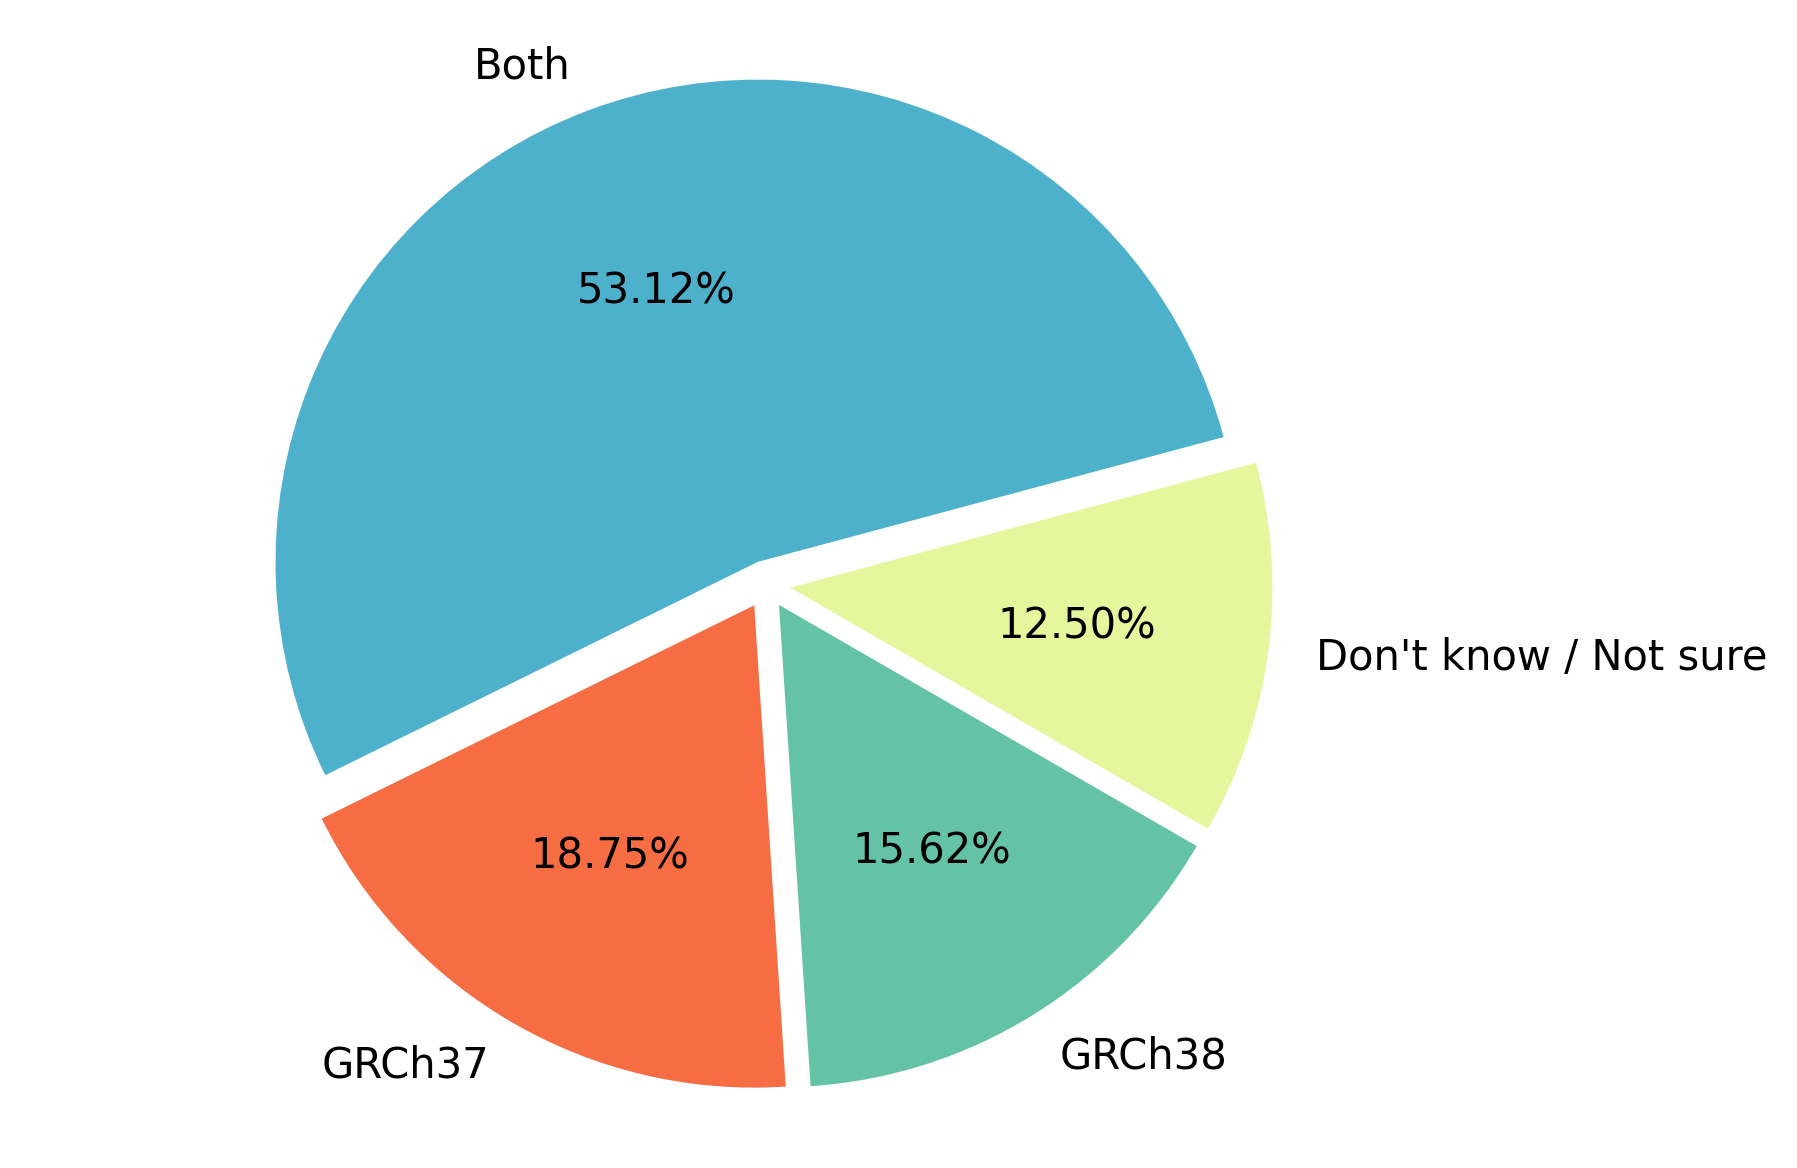

In [ ]:
# reference: https://datatofish.com/pie-chart-matplotlib/

import matplotlib.pyplot as plt

# my_colors = ['#a0bace', '#c0c0c0', '#8c8488', '#afd5e2', '#3090ad'] , '#FEAE65'
my_colors = ['#4EB1CB', '#F66D44', '#64C2A6', '#E6F69D']
# my_colors = ['#3379B7', '#4096C7', '#4DB7D3', '#92DEE4', '#C5EEEF'] #gradient blue

# Define the ratio of gap of each fragment in a tuple , 0.19
# explode = (0.1, 0.15, 0.15, 0.18)
explode = (0.05, 0.05, 0.05, 0.05)

plt.pie(df_refgenome['count'],autopct='%1.2f%%', startangle=15, labels = df_refgenome['ref_genome'],
        colors = my_colors, explode = explode)
plt.axis('equal')

# plt.legend(loc="lower right")

# plt.title('Number of genetic tests done on average per week ', fontsize=15)

plt.gcf().set_dpi(300)

plt.show()


# **B12. Who do you approach in case you need additional consultation to discuss the results of the genetic testing?**

In [ ]:
df['Who do you approach in case you need additional consultation to discuss the results of the genetic testing?']

0          My team (a team under my direct supervision)
1               Colleagues in other university/hospital
2          My team (a team under my direct supervision)
3                        My outsourced service provider
4     An in-house team (NOT directly under my superv...
5     An in-house team (NOT directly under my superv...
6                        My outsourced service provider
7     An in-house team (NOT directly under my superv...
8     My work is part of global collaborations and h...
9          My team (a team under my direct supervision)
10                       My outsourced service provider
11         My team (a team under my direct supervision)
12                       My outsourced service provider
13    An in-house team (NOT directly under my superv...
14                       My outsourced service provider
15                                          All 3 above
16    the service provider or other center who did t...
17    An in-house team (NOT directly under my su

In [ ]:
# check data values, run value counts () return a series
df['Who do you approach in case you need additional consultation to discuss the results of the genetic testing?'].value_counts()

An in-house team (NOT directly under my supervision)                                                                                  11
My team (a team under my direct supervision)                                                                                           8
My outsourced service provider                                                                                                         8
Colleagues in other university/hospital                                                                                                1
My work is part of global collaborations and huge international consortiums. These consortiums are full of experts in their field.     1
All 3 above                                                                                                                            1
the service provider or other center who did the same experiments                                                                      1
Both An in-house team (NOT directly under

In [ ]:
# Create a variable for this 'Position' series
series_consult = df['Who do you approach in case you need additional consultation to discuss the results of the genetic testing?']
series_consult

0          My team (a team under my direct supervision)
1               Colleagues in other university/hospital
2          My team (a team under my direct supervision)
3                        My outsourced service provider
4     An in-house team (NOT directly under my superv...
5     An in-house team (NOT directly under my superv...
6                        My outsourced service provider
7     An in-house team (NOT directly under my superv...
8     My work is part of global collaborations and h...
9          My team (a team under my direct supervision)
10                       My outsourced service provider
11         My team (a team under my direct supervision)
12                       My outsourced service provider
13    An in-house team (NOT directly under my superv...
14                       My outsourced service provider
15                                          All 3 above
16    the service provider or other center who did t...
17    An in-house team (NOT directly under my su

In [ ]:
# Clean & categorize in the series

series_consult = series_consult \
                      .replace(['An in-house team (NOT directly under my supervision)'], 'An in-house team') \
                      .replace(['My team (a team under my direct supervision)'], 'My team') \
                      .replace(['Colleagues in other university/hospital', 'My work is part of global collaborations and huge international consortiums. These consortiums are full of experts in their field.', 'the service provider or other center who did the same experiments', 'Discussion with my collaborators '], 'Others')


df_consult = series_consult.value_counts().rename_axis('consult').reset_index(name='count')
df_consult


consult  count
0                                   An in-house team     11
1                                            My team      8
2                     My outsourced service provider      8
3                                             Others      4
4                                        All 3 above      1
5  Both An in-house team (NOT directly under my s...      1

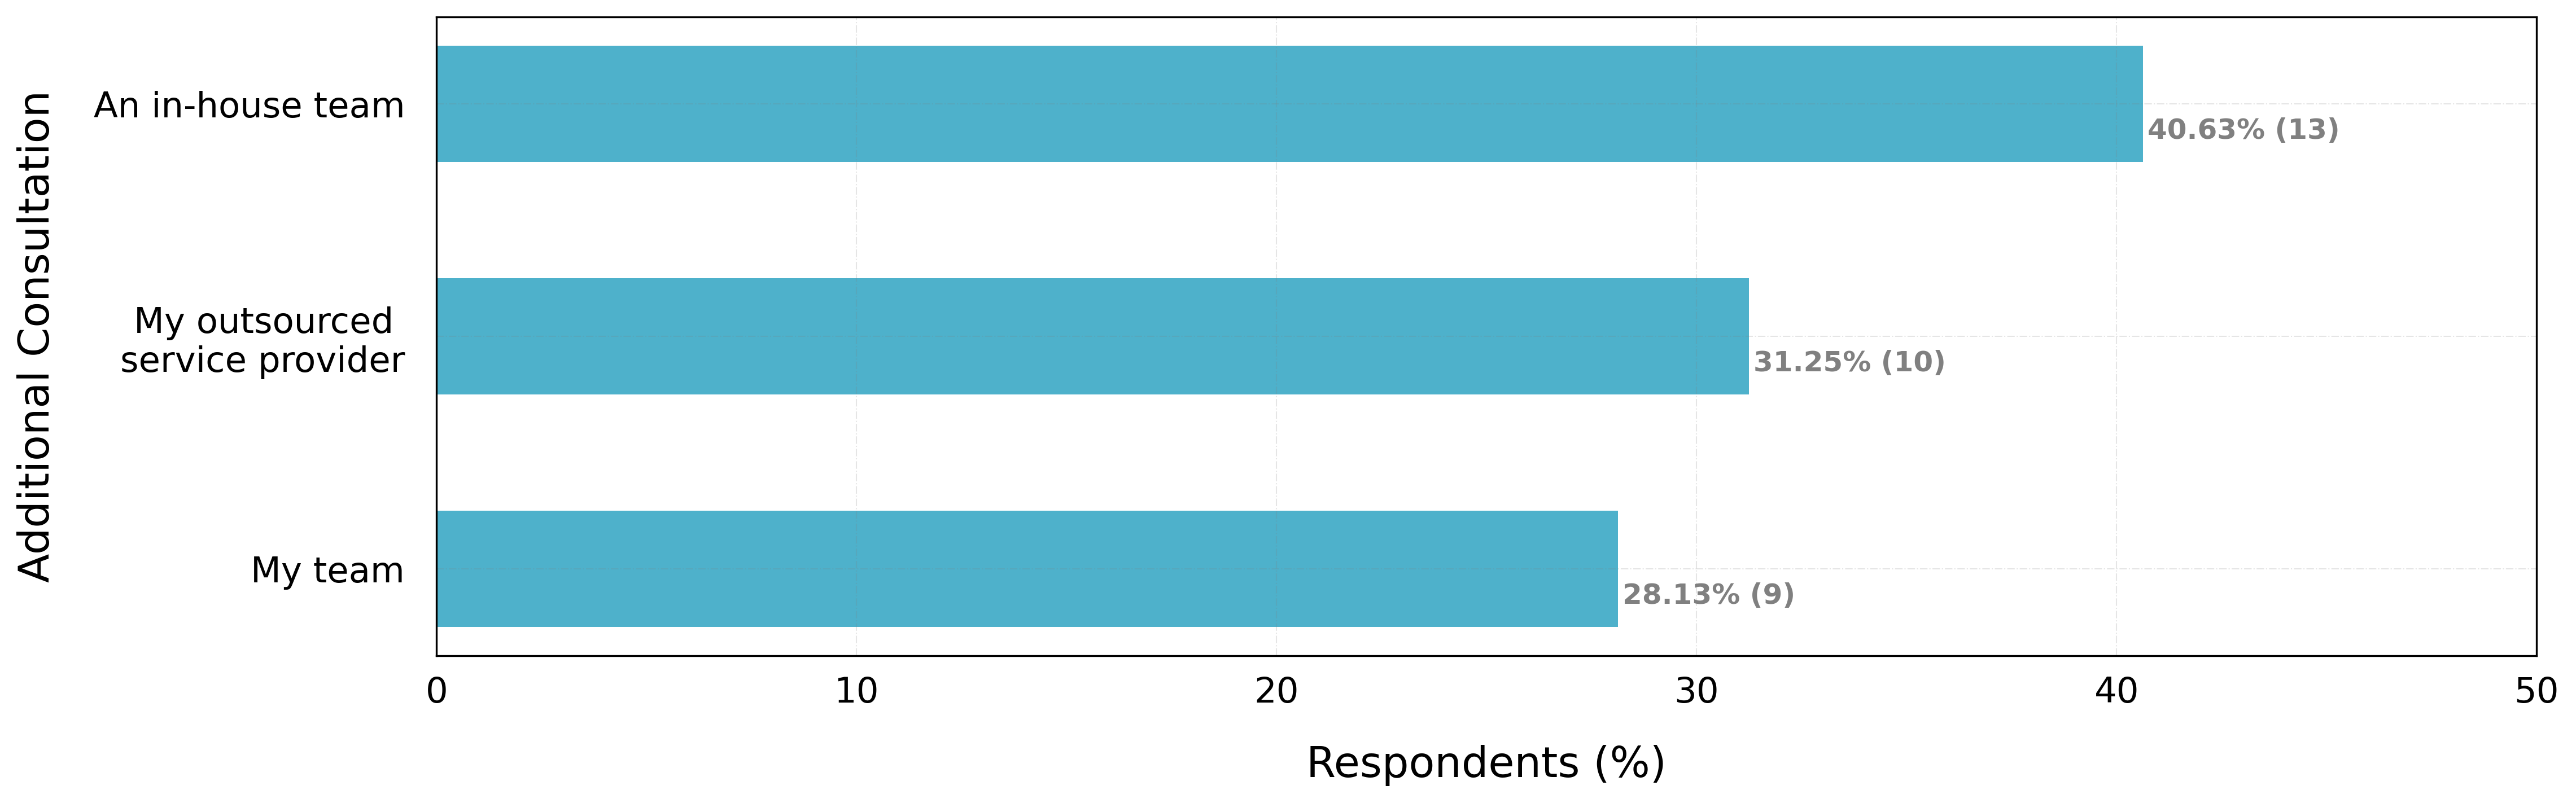

In [ ]:
# Horizontal bar plot
# reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
# reference: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the figure title and x, y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Read data
# position = df_position_count['position']
# count = df_position_count['count']

# Note: total = 32
consult = ['An in-house team', 'My outsourced \nservice provider', 'My team']
count = [13, 10, 9]
percent = [40.63,31.25,28.13]

# Figure size
fig, ax = plt.subplots(figsize =(16, 5))

# Change current axes
# plt.xlim(0, 15)

# Horizontal bar plot
ax.barh(consult, percent, height=0.5, color="#4EB1CB")


# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Set xticks
plt.xticks([0,10,20,30,40,50])

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Show top values
ax.invert_yaxis()

# Add annotation to bars (count, %)

total = 0
for i in ax.patches:
  total += i.get_width()

for i in ax.patches:
    plt.text(i.get_width()+0.1,
             i.get_y()+0.4,
             '{:.2f}% ({})'.format((i.get_width()), round(i.get_width() / total * 32)),
             fontsize = 12, fontweight ='bold',
             color ='grey')

# for i in ax.patches:
#     plt.text(i.get_width()+0.2,
#              i.get_y()+0.3,
#              '{:.2f}% ({})'.format(i.get_width(), round(i.get_width() / total * 63)),
#              fontsize = 12, fontweight ='bold',
#              color ='grey')

# Set labels
plt.xlabel("Respondents (%)", labelpad = 15)
plt.ylabel("Additional Consultation", labelpad = 15)
# plt.title("The position of respondents who have experiences in genetic testing", fontweight = 'bold', pad = 20)

# Display in 300dpi
plt.gcf().set_dpi(300)

# show plot
plt.show()

# save figure
# plt.savefig('name_plot.png', dpi=300, bbox_inches='tight')

# **B13. Who will make the final clinical decision based on the genetic testing data?**






In [ ]:
df['Who will make the final clinical decision based on the genetic testing data? '].value_counts()

Me and my team                                                                                        18
Myself                                                                                                 4
Outsourced                                                                                             3
Other team (in-house)                                                                                  2
As said, my work is included in international collaborations and all co-authors need to consent.       1
The ordering physician                                                                                 1
Both Other team (in-house) & Outsourced                                                                1
Our directors                                                                                          1
In house pathologist                                                                                   1
My supervisor - senior geneticist                      

In [ ]:
series_final_decision = df['Who will make the final clinical decision based on the genetic testing data? ']
series_final_decision

In [ ]:
# Replace label text in the series

series_final_decision = series_final_decision \
                        .replace(['As said, my work is included in international collaborations and all co-authors need to consent.  '], 'Others') \
                        .replace(['The ordering physician'], 'Others') \
                        .replace(['Our directors '], 'Others') \
                        .replace(['In house pathologist'], 'Others') \
                        .replace(['My supervisor - senior geneticist'], 'Others')


df_final_decision = series_final_decision.value_counts().rename_axis('final_decision').reset_index(name='count')
df_final_decision

final_decision  count
0                           Me and my team     18
1                                   Others      5
2                                   Myself      4
3                               Outsourced      3
4                    Other team (in-house)      2
5  Both Other team (in-house) & Outsourced      1

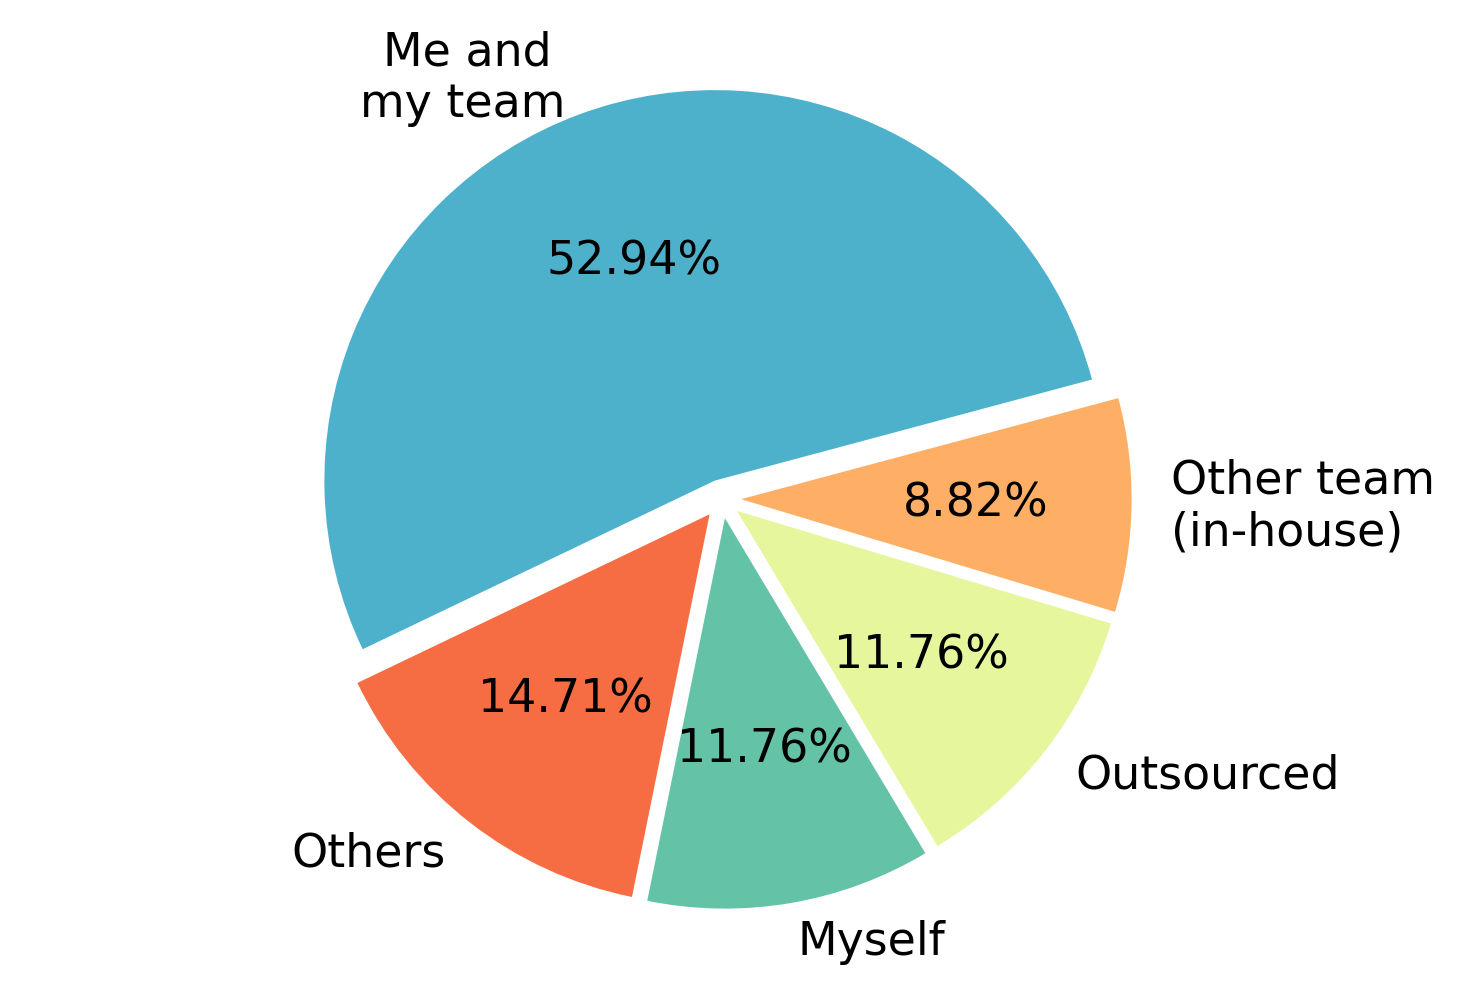

In [ ]:
# reference: https://datatofish.com/pie-chart-matplotlib/

import matplotlib.pyplot as plt

refgenome = ['Me and \nmy team', 'Others', 'Myself', 'Outsourced', 'Other team \n(in-house)']
count = [18, 5, 4, 4, 3]

my_colors = ['#4EB1CB', '#F66D44', '#64C2A6', '#E6F69D', '#FEAE65']

# Define the ratio of gap of each fragment in a tuple , 0.19
# explode = (0.1, 0.15, 0.15, 0.18)
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(count, autopct='%1.2f%%', startangle=15, labels = refgenome,
        colors = my_colors, explode = explode, textprops={'fontsize': 11})
plt.axis('equal')

# plt.legend(loc="lower right")

# plt.title('Number of genetic tests done on average per week ', fontsize=15)

plt.gcf().set_dpi(300)

plt.show()


# **B14. How easy was it, the first time, for you to interpret the genetic report? / How confident were you in interpreting the genetic report, the first time?**

In [ ]:
# Check values
df['How easy was it, the first time, for you to interpret the genetic report? / How confident were you in interpreting the genetic report, the first time?'].value_counts()

4.0    11
2.0     9
3.0     7
1.0     3
5.0     3
Name: How easy was it, the first time, for you to interpret the genetic report? / How confident were you in interpreting the genetic report, the first time?, dtype: int64

In [ ]:
df_interpretation_easiness = df['How easy was it, the first time, for you to interpret the genetic report? / How confident were you in interpreting the genetic report, the first time?'].value_counts().rename_axis('interpretation_easiness').reset_index(name='count').sort_values(by=['interpretation_easiness'])
df_interpretation_easiness

interpretation_easiness  count
3                      1.0      3
1                      2.0      9
2                      3.0      7
0                      4.0     11
4                      5.0      3

In [ ]:
# Add percentage column as string

df_interpretation_easiness['%'] = ((df_interpretation_easiness['count'] / df_interpretation_easiness['count'].sum()) * 100).round(2).astype(str) + '%'

df_interpretation_easiness

interpretation_easiness  count       %
3                      1.0      3   9.09%
1                      2.0      9  27.27%
2                      3.0      7  21.21%
0                      4.0     11  33.33%
4                      5.0      3   9.09%

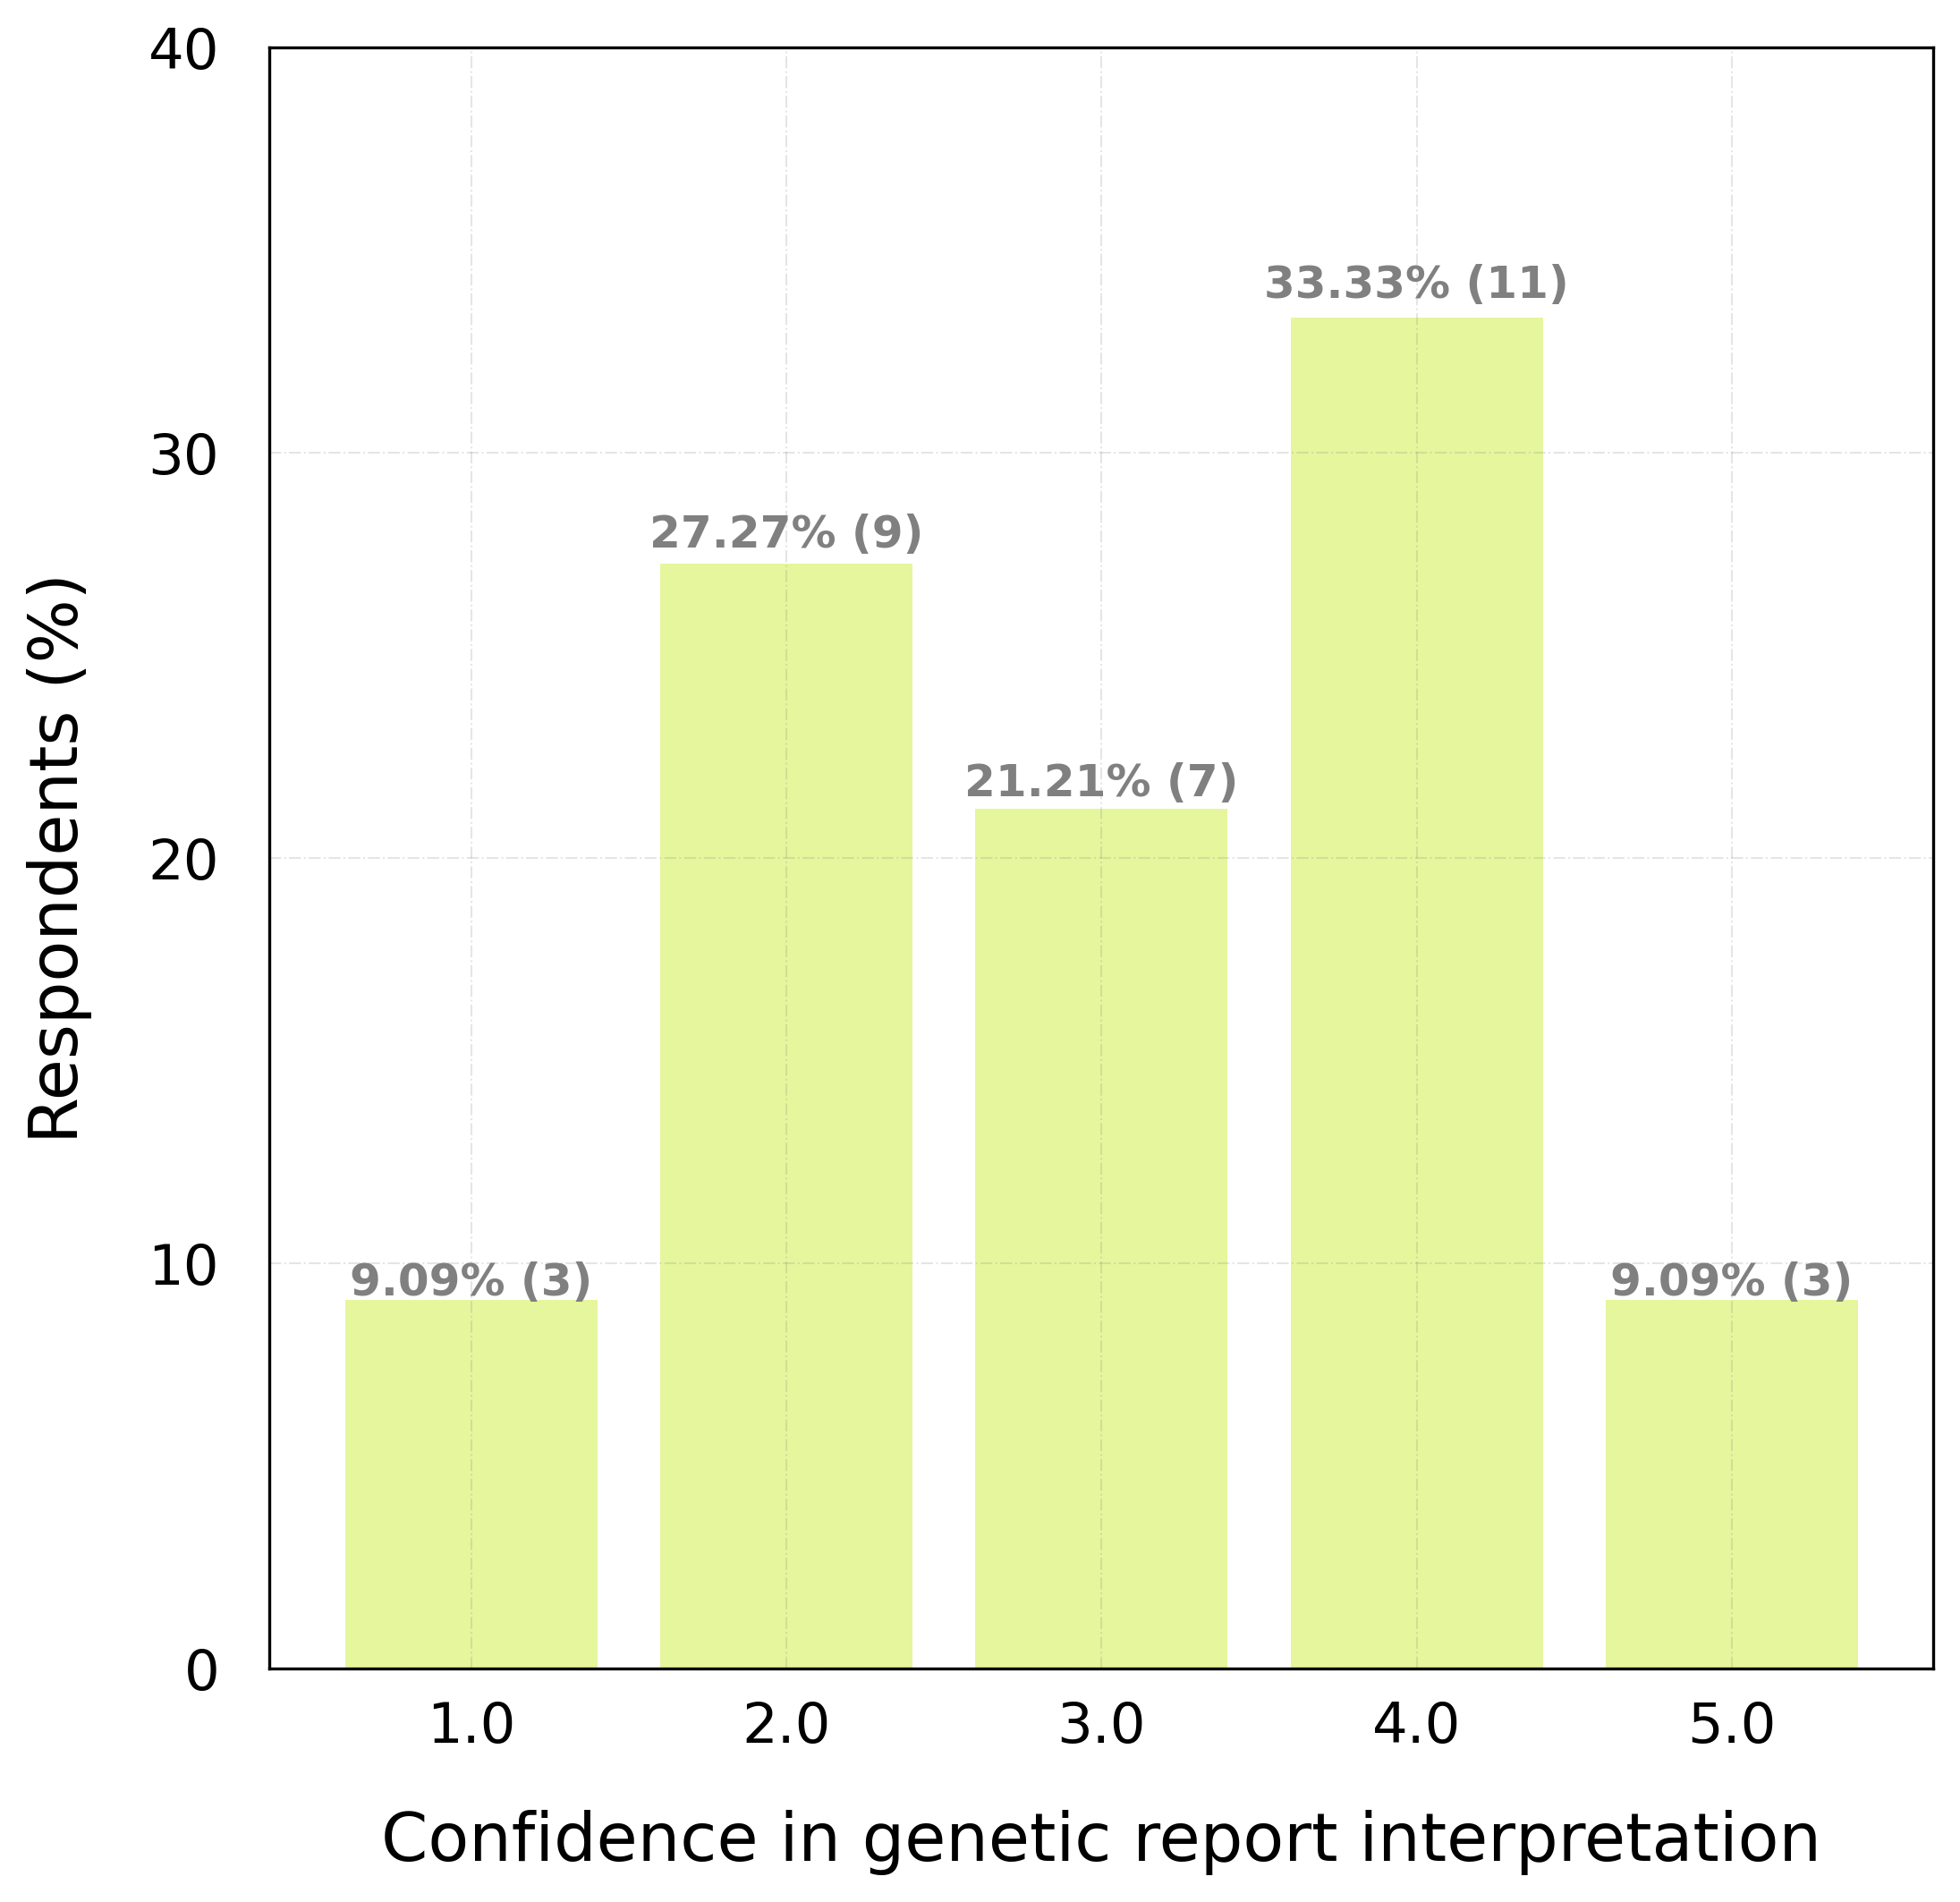

In [ ]:
# depict illustration

import pandas as pd
import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the figure title and x, y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# assign data
data = pd.DataFrame({'Interpretation_easiness': ['1.0', '2.0', '3.0', '4.0', '5.0'],
                     'Count': [3, 9, 7, 11, 3],
                     'Percentage': [9.09, 27.27, 21.21, 33.33, 9.09]
                     })

# depict illustration
# Figure size
fig, ax = plt.subplots(figsize =(8, 8))

# plt.figure(figsize=(8, 10))
graph = plt.bar(data.Interpretation_easiness, data.Percentage, color='#E6F69D')

# Add annotation
i = 0
for p in graph:
	width = p.get_width()
	height = p.get_height()
	x, y = p.get_xy()

	plt.text(x+width/2,
			y+height*1.015,
			'{}% ({})'.format((data.Percentage[i]), (data.Count[i])),
			ha='center',
			color ='grey',  fontsize = 12, fontweight ='bold',)
	i += 1

# Change current axes
# plt.ylim(bottom=0, top=40)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# # Set xticks
# plt.xticks([0,4,8,12,16,20,24])
# Set xticks
plt.yticks([0,10,20,30,40])

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Set labels
plt.xlabel("Confidence in genetic report interpretation", labelpad = 15)
plt.ylabel("Respondents (%)", labelpad = 15)

# Display in 300dpi
plt.gcf().set_dpi(300)

plt.show()



# **B15. Do you have a network of technicians and clinicians to help each other with regards to genetic testing and interpretation of results?**






In [ ]:
df['Do you have a network of technicians and clinicians to help each other with regards to genetic testing and interpretation of results?'].value_counts()

Yes    26
No      7
Name: Do you have a network of technicians and clinicians to help each other with regards to genetic testing and interpretation of results?, dtype: int64

In [ ]:
df_network = df['Do you have a network of technicians and clinicians to help each other with regards to genetic testing and interpretation of results?'].value_counts().rename_axis('network').reset_index(name='answer')
df_network

network  answer
0     Yes      26
1      No       7

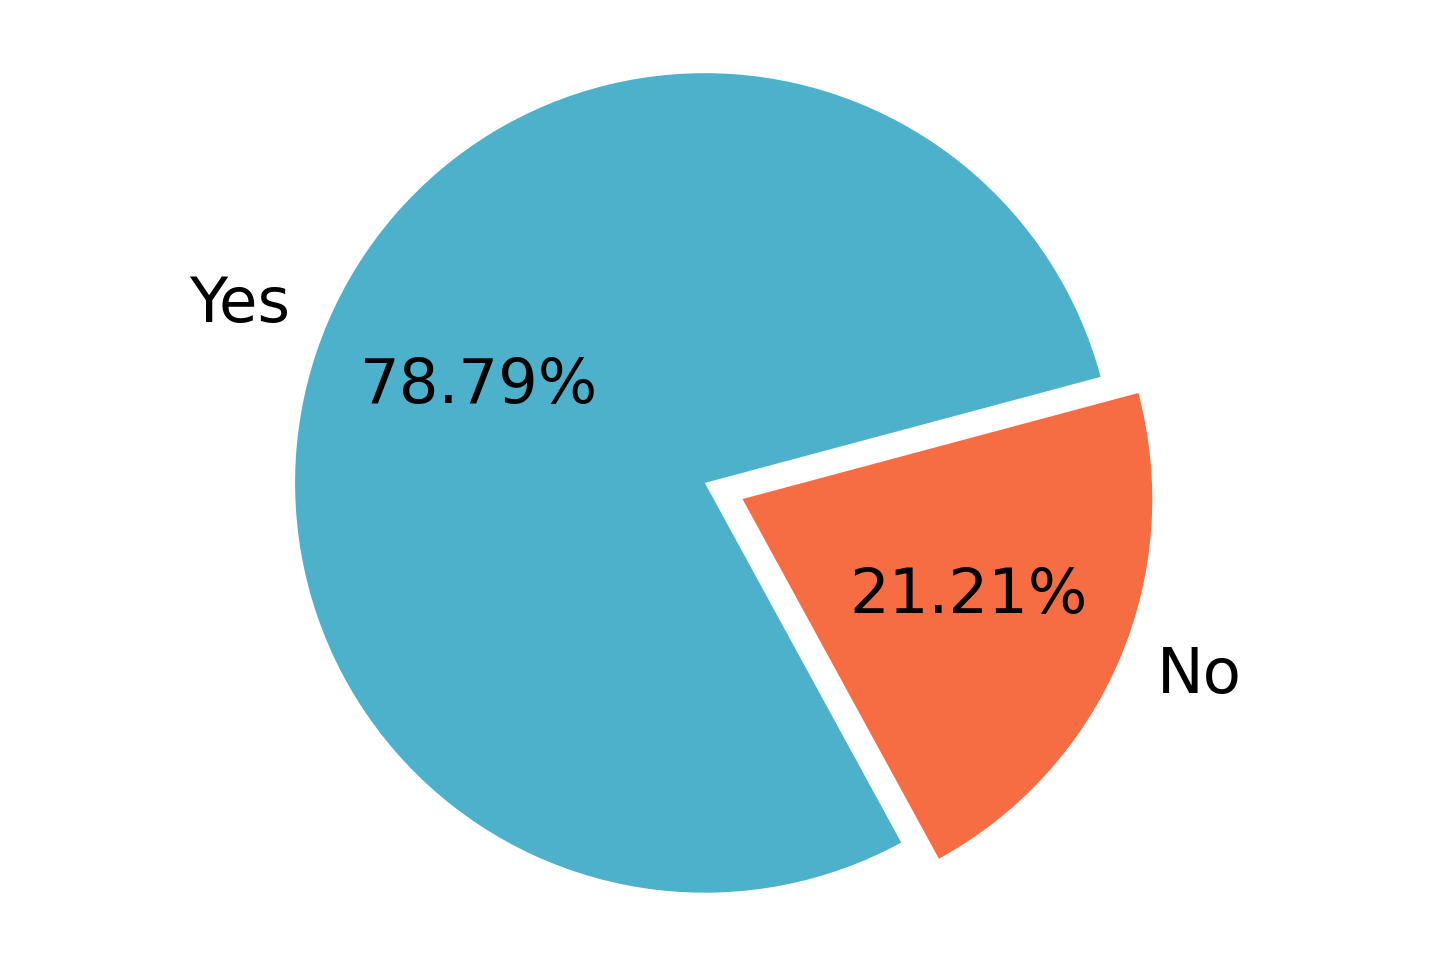

In [ ]:
# reference: https://datatofish.com/pie-chart-matplotlib/

import matplotlib.pyplot as plt

my_colors = ['#4EB1CB', '#F66D44']

# Define the ratio of gap of each fragment in a tuple , 0.19
# explode = (0.1, 0.15, 0.15, 0.18)
explode = (0.05, 0.05)

plt.pie(df_network['answer'],autopct='%1.2f%%', startangle=15, labels = df_network['network'],
        colors = my_colors, explode = explode)
plt.axis('equal')

# plt.legend(loc="lower right")

# plt.title('Number of genetic tests done on average per week ', fontsize=15)

plt.gcf().set_dpi(300)

plt.show()


# **B16. Would you be interested in being part of such a network?**






In [ ]:
df['Would you be interested in being part of such a network?'].value_counts()

Yes    31
No      2
Name: Would you be interested in being part of such a network?, dtype: int64

In [ ]:
df_network_interest = df['Would you be interested in being part of such a network?'].value_counts().rename_axis('interest').reset_index(name='answer')
df_network_interest

interest  answer
0      Yes      31
1       No       2

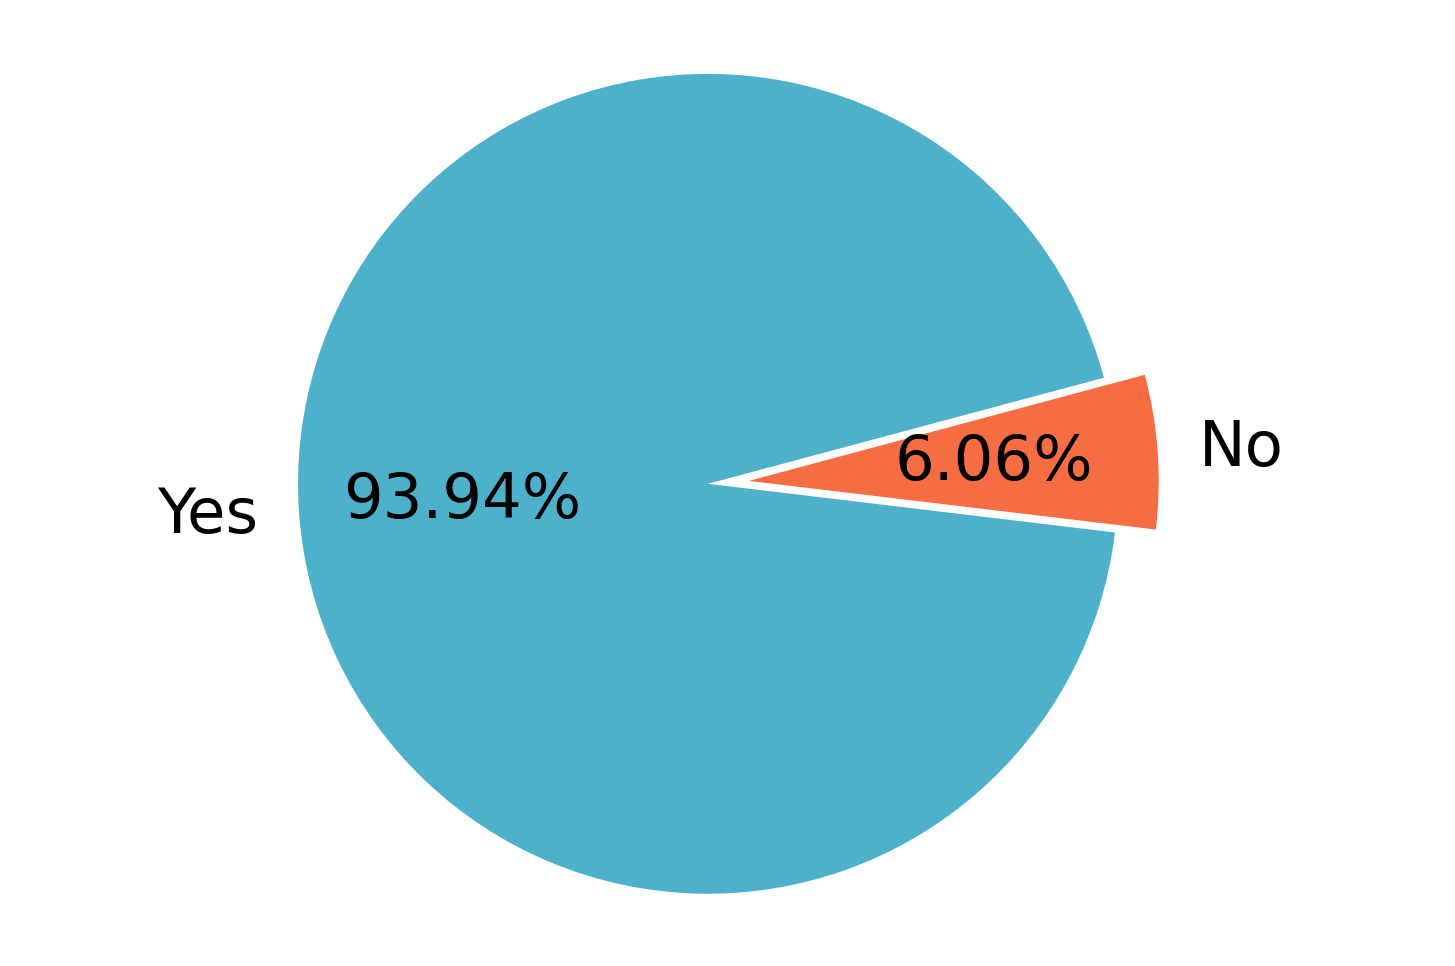

In [ ]:
# reference: https://datatofish.com/pie-chart-matplotlib/

import matplotlib.pyplot as plt

# , '#64C2A6', '#E6F69D'
my_colors = ['#4EB1CB', '#F66D44']

# Define the ratio of gap of each fragment in a tuple , 0.19
# explode = (0.1, 0.15, 0.15, 0.18)
explode = (0.05, 0.05)

plt.pie(df_network_interest['answer'],autopct='%1.2f%%', startangle=15, labels = df_network_interest['interest'],
        colors = my_colors, explode = explode)
plt.axis('equal')

# plt.legend(loc="lower right")

# plt.title('Number of genetic tests done on average per week ', fontsize=15)

plt.gcf().set_dpi(300)

plt.show()


# **C1. How important is it to you for genetic data analysis for diagnostic purposes to be as clinician-friendly as possible?**

In [ ]:
# Check values
df['How important is it to you for genetic data analysis for diagnostic purposes to be as clinician-friendly as possible? '].value_counts()

5.0    25
4.0     8
Name: How important is it to you for genetic data analysis for diagnostic purposes to be as clinician-friendly as possible? , dtype: int64

In [ ]:
# df_clinician_friendly = df['How easy was it, the first time, for you to interpret the genetic report? / How confident were you in interpreting the genetic report, the first time?'].value_counts().rename_axis('interpretation_easiness').reset_index(name='count').sort_values(by=['interpretation_easiness'])
df_clinician_friendly = pd.DataFrame({'degree of importance': [1, 2, 3, 4, 5],
                                      'count': [0, 0, 0, 8, 25],
                                      })
df_clinician_friendly


degree of importance  count
0                     1      0
1                     2      0
2                     3      0
3                     4      8
4                     5     25

In [ ]:
# Add percentage column as string

df_clinician_friendly['%'] = ((df_clinician_friendly['count'] / df_clinician_friendly['count'].sum()) * 100).round(2).astype(str) + '%'

df_clinician_friendly

degree of importance  count       %
0                     1      0    0.0%
1                     2      0    0.0%
2                     3      0    0.0%
3                     4      8  24.24%
4                     5     25  75.76%

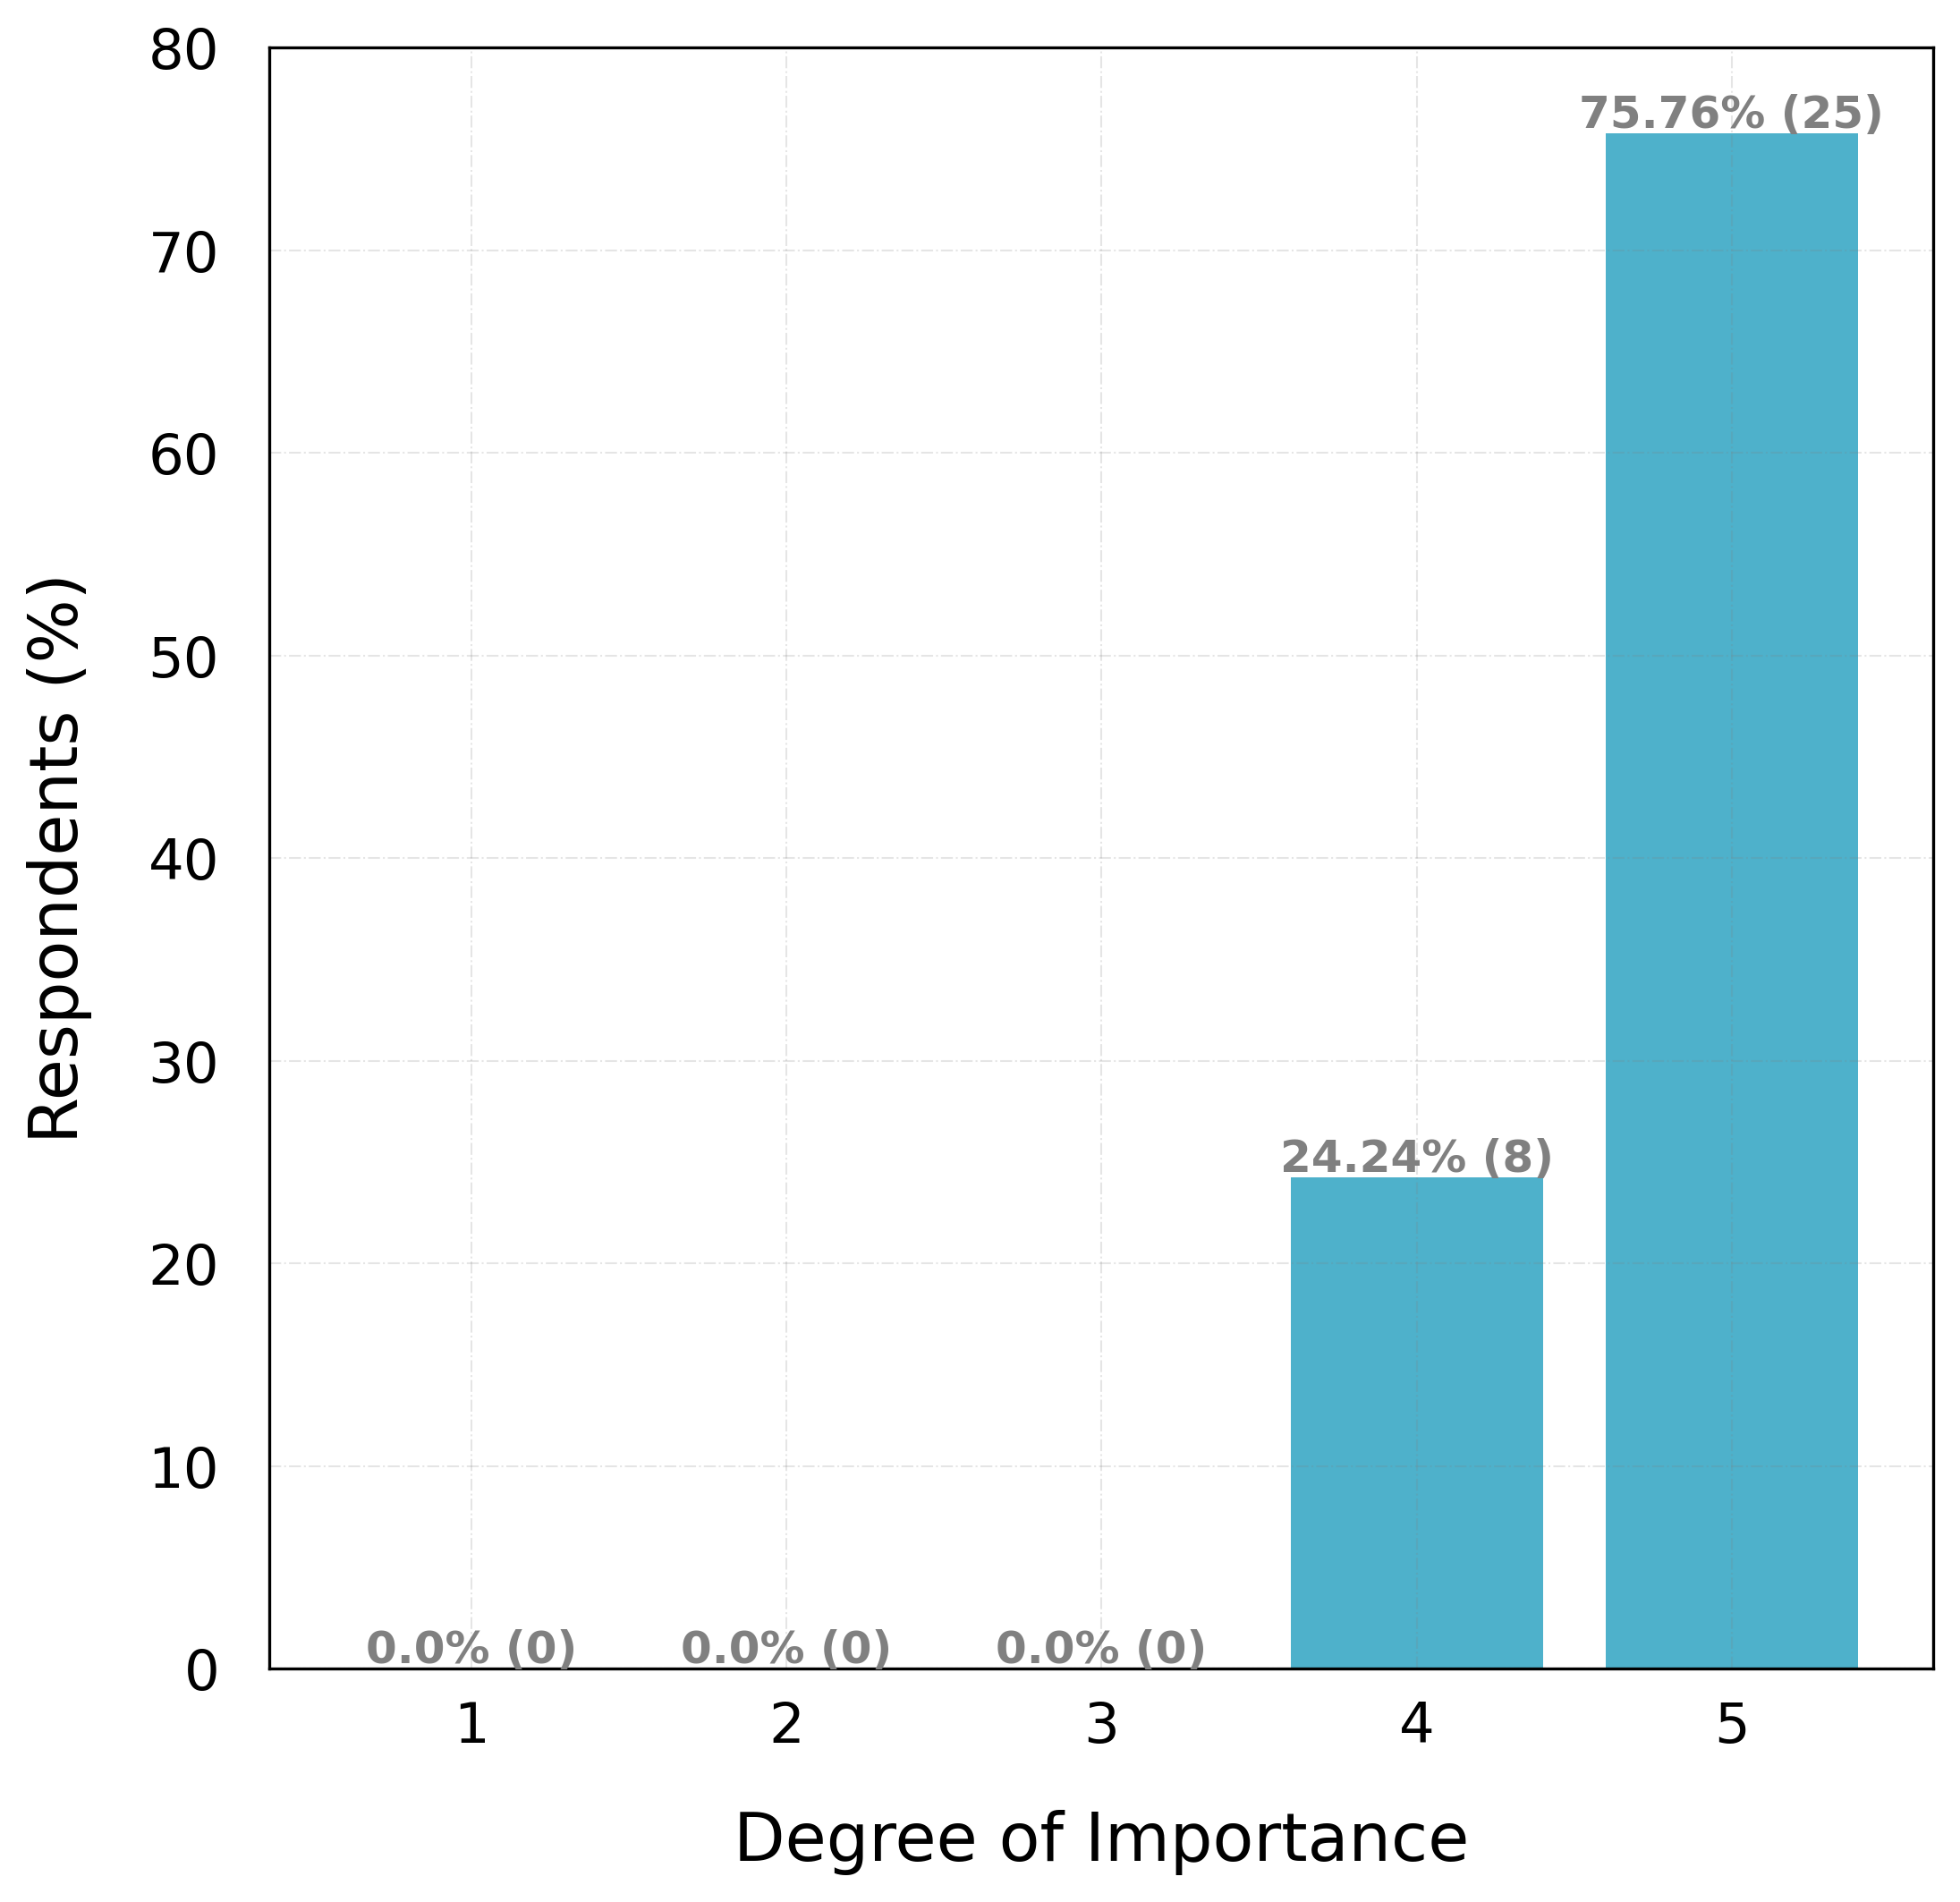

In [ ]:
# depict illustration

import pandas as pd
import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the figure title and x, y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# assign data
data = pd.DataFrame({'Degree_of_importance': [1, 2, 3, 4, 5],
                    'Count': [0, 0, 0, 8, 25],
                    'Percentage': [0.0, 0.0, 0.0, 24.24, 75.76]
										})

# depict illustration
# Figure size
fig, ax = plt.subplots(figsize =(8, 8))

# plt.figure(figsize=(8, 10))
graph = plt.bar(data.Degree_of_importance, data.Percentage, color='#4EB1CB')

i = 0
for p in graph:
	width = p.get_width()
	height = p.get_height()
	x, y = p.get_xy()

	plt.text(x+width/2,
			 0.3 if height == 0 else y+height+0.3,
			'{}% ({})'.format((data.Percentage[i]), (data.Count[i])),
			ha='center',
			color ='grey',  fontsize = 12, fontweight ='bold',)
	i += 1

# Change current axes
plt.ylim(bottom=0, top=80)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# # Set xticks
# plt.xticks([0,4,8,12,16,20,24])

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Set labels
plt.xlabel("Degree of Importance", labelpad = 15)
plt.ylabel("Respondents (%)", labelpad = 15)

# Display in 300dpi
plt.gcf().set_dpi(300)

plt.show()



# **C2. Would you use a software application that is intuitive to use for running your genetic data analysis and to produce an easy to understand and clinically actionable diagnostic report?**






In [ ]:
df['Would you use a software application that is intuitive to use for running your genetic data analysis and to produce an easy to understand and clinically actionable diagnostic report?'].value_counts()

Yes, if it is medically accredited                             31
We are developing these interpretation interfaces currently     1
cost is the main issue                                          1
Name: Would you use a software application that is intuitive to use for running your genetic data analysis and to produce an easy to understand and clinically actionable diagnostic report?, dtype: int64

In [ ]:
series_use_software = df['Would you use a software application that is intuitive to use for running your genetic data analysis and to produce an easy to understand and clinically actionable diagnostic report?']



In [ ]:
series_use_software = series_use_software \
                        .replace(['We are developing these interpretation interfaces currently'], 'Others') \
                        .replace(['cost is the main issue'], 'Others')

df_use_software = series_use_software.value_counts().rename_axis('use_software').reset_index(name='answer')
df_use_software

use_software  answer
0  Yes, if it is medically accredited      31
1                              Others       2

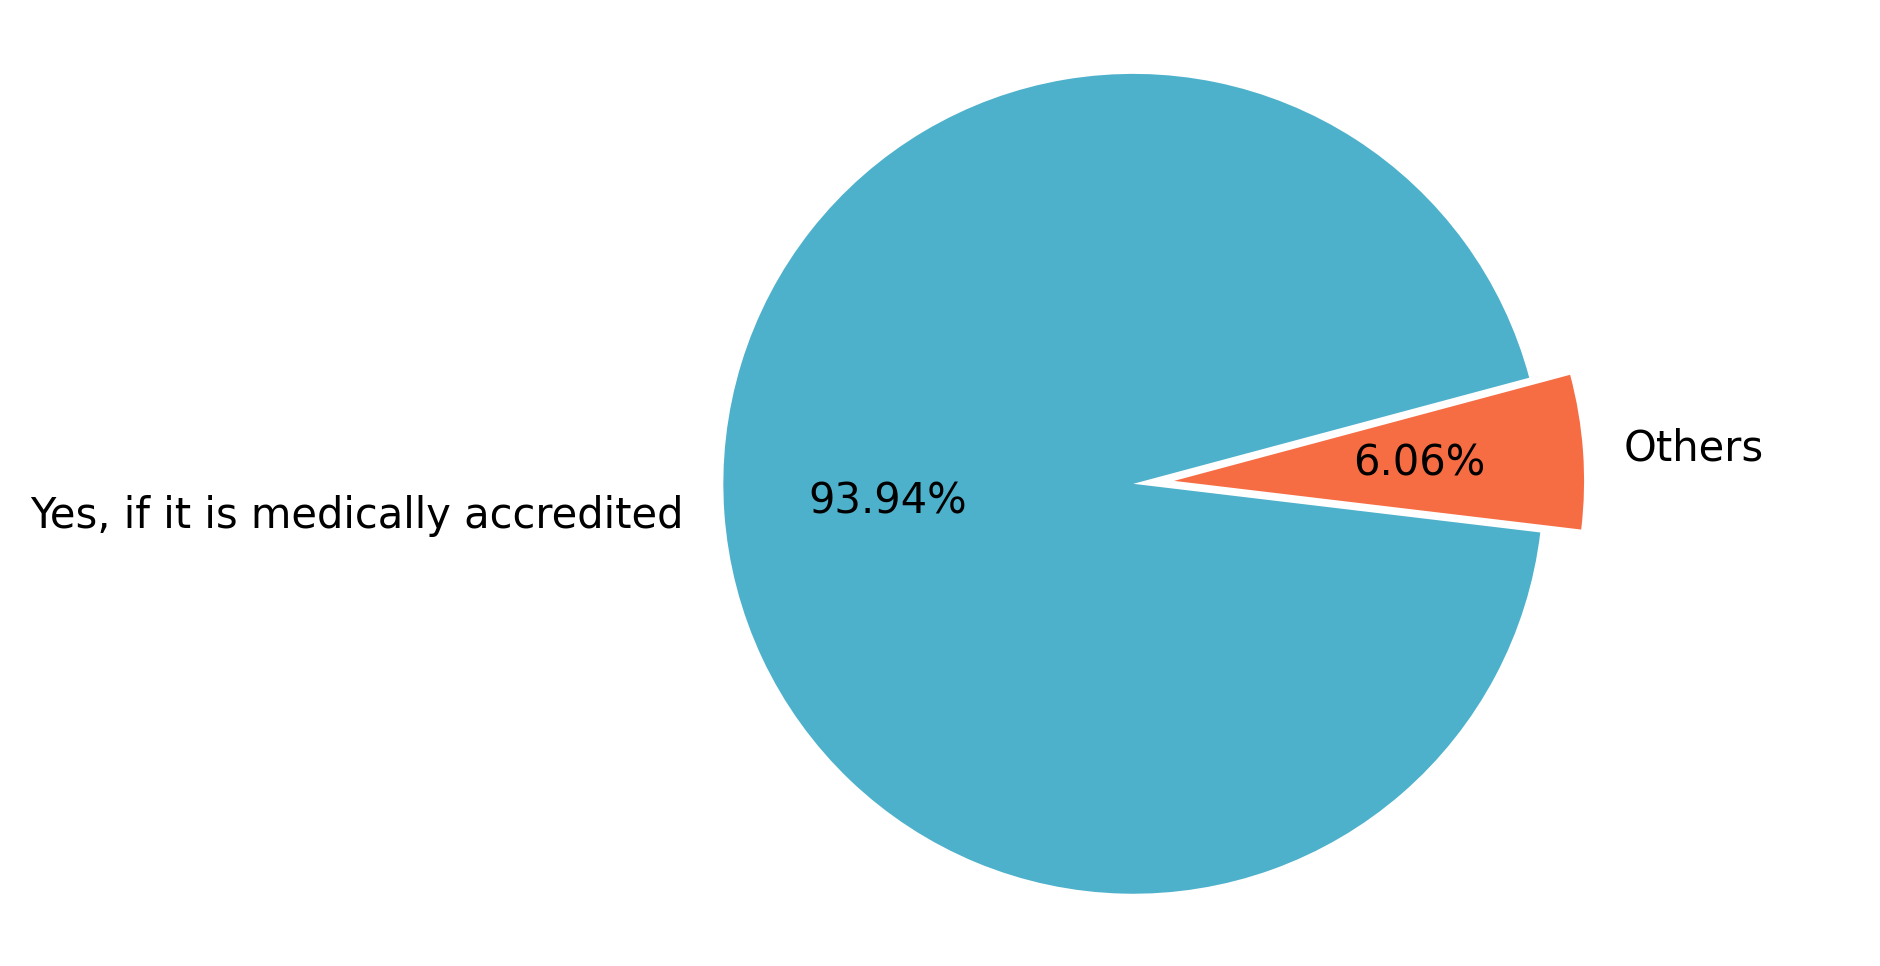

In [ ]:
# reference: https://datatofish.com/pie-chart-matplotlib/

import matplotlib.pyplot as plt

# , '#64C2A6', '#E6F69D'
my_colors = ['#4EB1CB', '#F66D44']

# Define the ratio of gap of each fragment in a tuple , 0.19
# explode = (0.1, 0.15, 0.15, 0.18)
explode = (0.05, 0.05)

plt.pie(df_use_software['answer'],autopct='%1.2f%%', startangle=15, labels = df_use_software['use_software'],
        colors = my_colors, explode = explode)
plt.axis('equal')

# plt.legend(loc="lower right")

# plt.title('Number of genetic tests done on average per week ', fontsize=15)

plt.gcf().set_dpi(300)

plt.show()


# **C3. Concern with such software application**

In [ ]:
# Check values
df['What concerns would you have with such a software application?'].value_counts()

Accessibility (easy access), Analysis duration, Accuracy, Ease of use, Pricing                                                                                 12
Accessibility (easy access), Accuracy, Ease of use, Pricing                                                                                                     5
Accuracy, Ease of use, Pricing                                                                                                                                  3
Accessibility (easy access), Accuracy, Pricing                                                                                                                  3
Ease of use, Pricing                                                                                                                                            1
Accuracy, Pricing                                                                                                                                               1
Accessibility (easy access),

In [ ]:
df_app_concern = df['What concerns would you have with such a software application?'] \
  .str.split(', ') \
  .explode('What concerns would you have with such a software application?') \
  .replace(['And security', 'providing full assistance for troubleshooting (can be contacted at anytime)',
            'cloud based', 'Approved by Hospotal'],
           'Others') \
  .value_counts() \
  .rename_axis('app_concern') \
  .reset_index(name='count')

df_app_concern

app_concern  count
0                     Accuracy     31
1                      Pricing     30
2                  Ease of use     25
3  Accessibility (easy access)     24
4            Analysis duration     15
5                       Others      4

In [ ]:
# Drop 'Others'
df_app_concern_clean = df_app_concern.drop(index=[5], axis=0)
df_app_concern_clean

app_concern  count
0                     Accuracy     31
1                      Pricing     30
2                  Ease of use     25
3  Accessibility (easy access)     24
4            Analysis duration     15

In [ ]:
# Add percentage column
df_app_concern_clean['%'] = ((df_app_concern_clean['count'] / df_app_concern_clean['count'].sum()) * 100).round(2)
df_app_concern_clean

app_concern  count     %
0                     Accuracy     31  24.8
1                      Pricing     30  24.0
2                  Ease of use     25  20.0
3  Accessibility (easy access)     24  19.2
4            Analysis duration     15  12.0

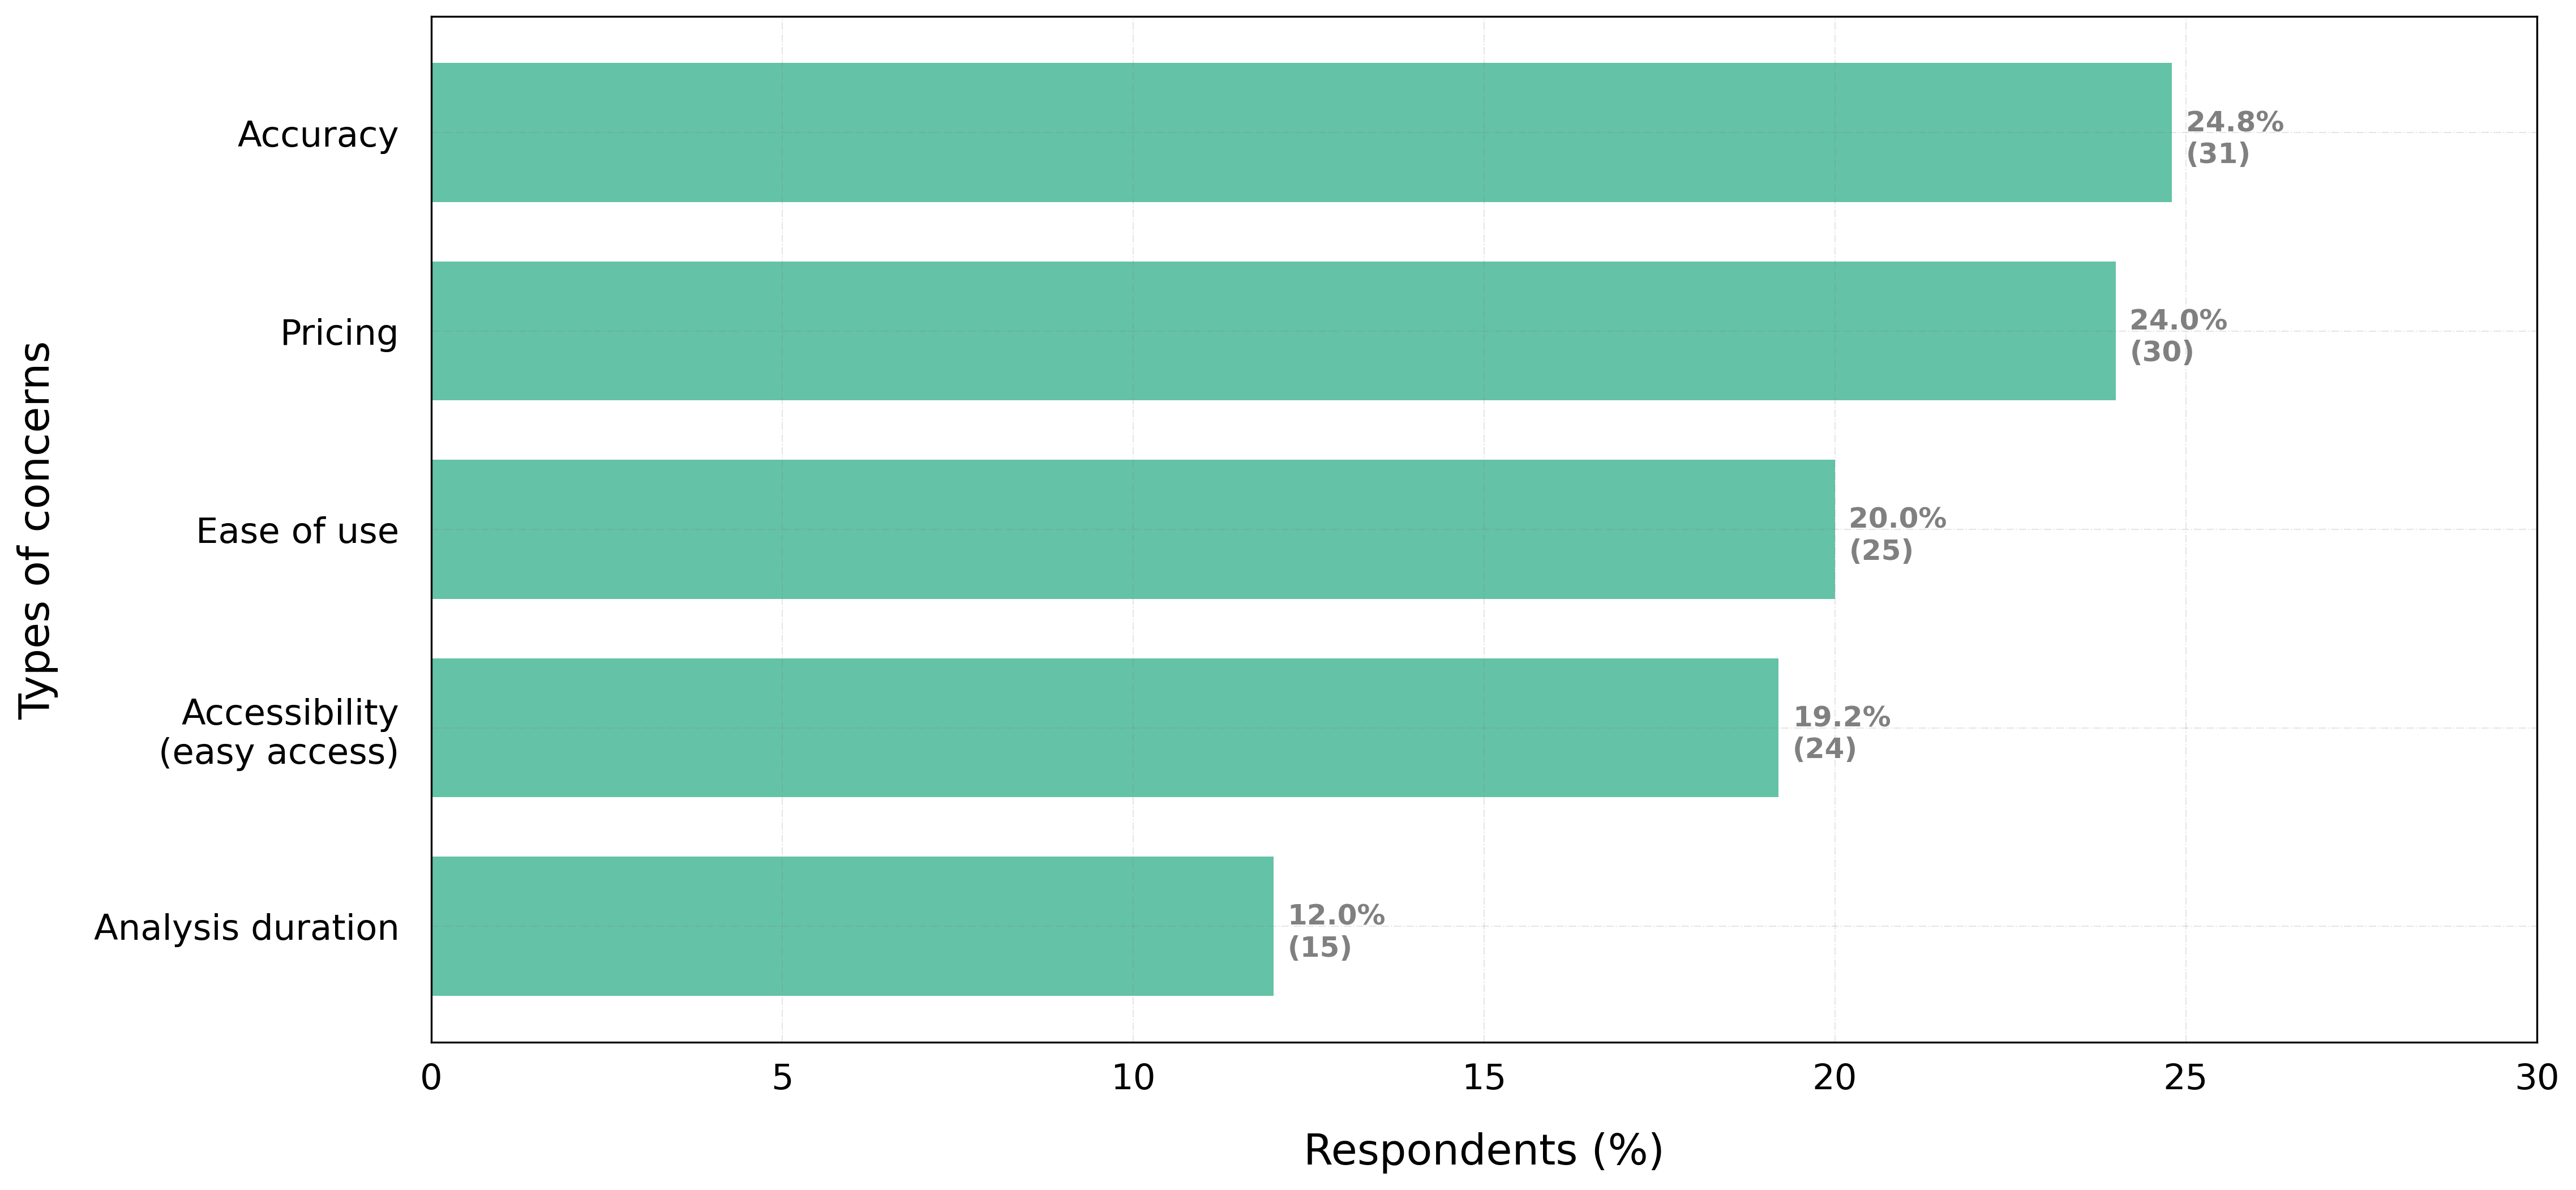

In [ ]:
# Horizontal bar plot
# reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
# reference: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the figure title and x, y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Read data
# app_concern = df_app_concern_clean['app_concern']

app_concern = ['Accuracy','Pricing','Ease of use','Accessibility\n(easy access)','Analysis duration']
# count = df_app_concern_clean['count']

percent = df_app_concern_clean['%']

# Figure size
fig, ax = plt.subplots(figsize =(16, 8))

# Change current axes
# plt.xlim(left=0, right=22)

# Horizontal bar plot
# my_colors = ['#4EB1CB', '#F66D44', '#64C2A6', '#E6F69D', '#FEAE65']
ax.barh(app_concern, percent, height=0.7, color='#64C2A6')

# How to make label double line?

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Set xticks
plt.xticks([0,5,10,15,20,25,30])

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
total = 0
for i in ax.patches:
  total += i.get_width()

for i in ax.patches:
    plt.text(i.get_width()+0.2,
             i.get_y()+0.5,
             '{}%\n({})'.format((i.get_width()), round(i.get_width() / total * 125)),
             fontsize = 12, fontweight ='bold',
             color ='grey')

# Set labels
plt.xlabel("Respondents (%)", labelpad = 15)
plt.ylabel("Types of concerns", labelpad = 15)
# plt.title("Types of concerns with a software application that is intuitive to use for running\ngenetic data analysis and to produce an easy to understand and clinically actionable diagnostic report",
#           fontweight = 'bold', pad = 20)

# Display in 300dpi
plt.gcf().set_dpi(300)

# show plot
plt.show()

# **C4. features' helpfulness**

In [ ]:
# reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 38.5 MB/s eta 0:00:00


In [ ]:
# Intuitive User Interface

df_user_interface = df['intuitive_user_interface'].value_counts().rename_axis('user_interface').reset_index(name='count')
df_user_interface

user_interface  count
0     Needed and helpful     25
1  Optional, but helpful      8

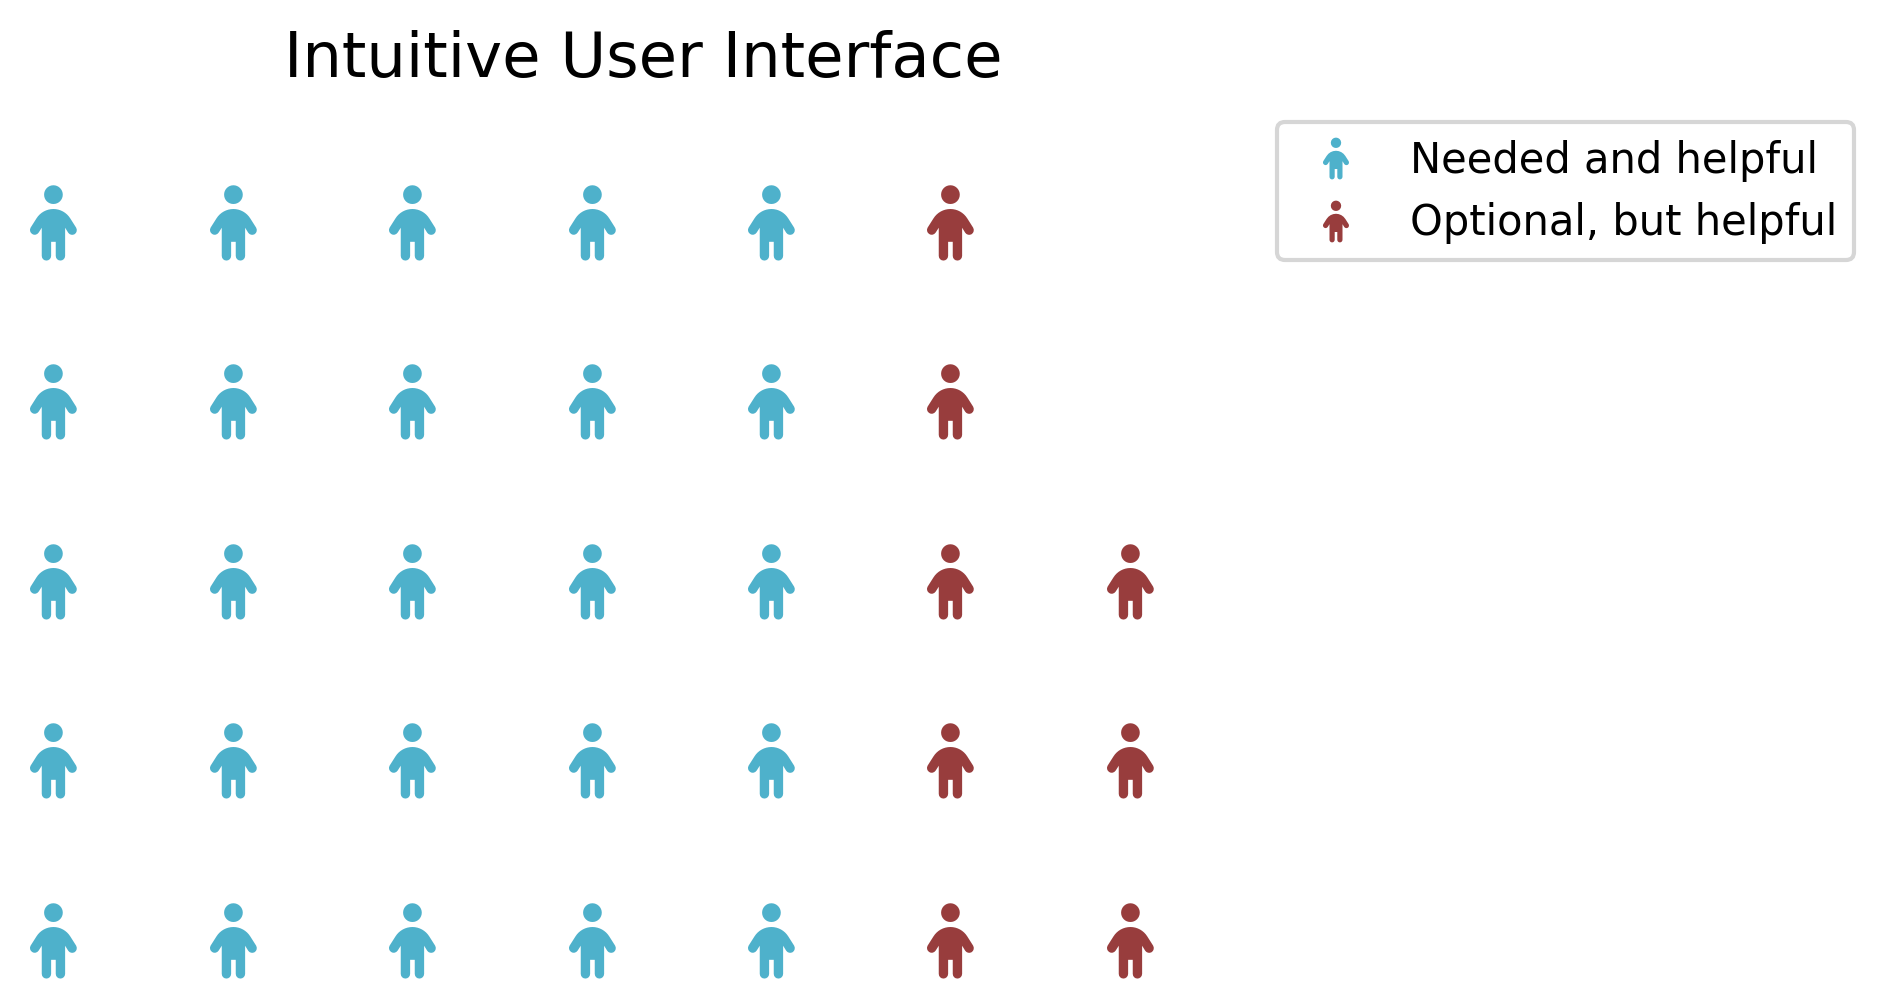

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

# # set column as index
# df_user_interface = df_user_interface.set_index('user_interface')

# # change to dictionary
# dict_user_interface = df_user_interface.to_dict('dict')
dict_user_interface = {'Needed and helpful': 25, 'Optional, but helpful': 8}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    dpi=300,
    facecolor='white',
    values=dict_user_interface,
    colors=("#4EB1CB", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=18,  # icons = 'user'
    icon_legend=True
)


plt.title('Intuitive User Interface', fontsize=15)
plt.show()

# save figure (issue saving image with plt.savefig)
# plt.savefig('drive/My Drive/survey-response/intuitive_user_interface.png', dpi=300)

In [ ]:
# Parameter Customisation

df_parameter_customisation = df['parameter_customisation'].value_counts().rename_axis('parameter_customisation').reset_index(name='count')
df_parameter_customisation

parameter_customisation  count
0      Needed and helpful     27
1   Optional, but helpful      6

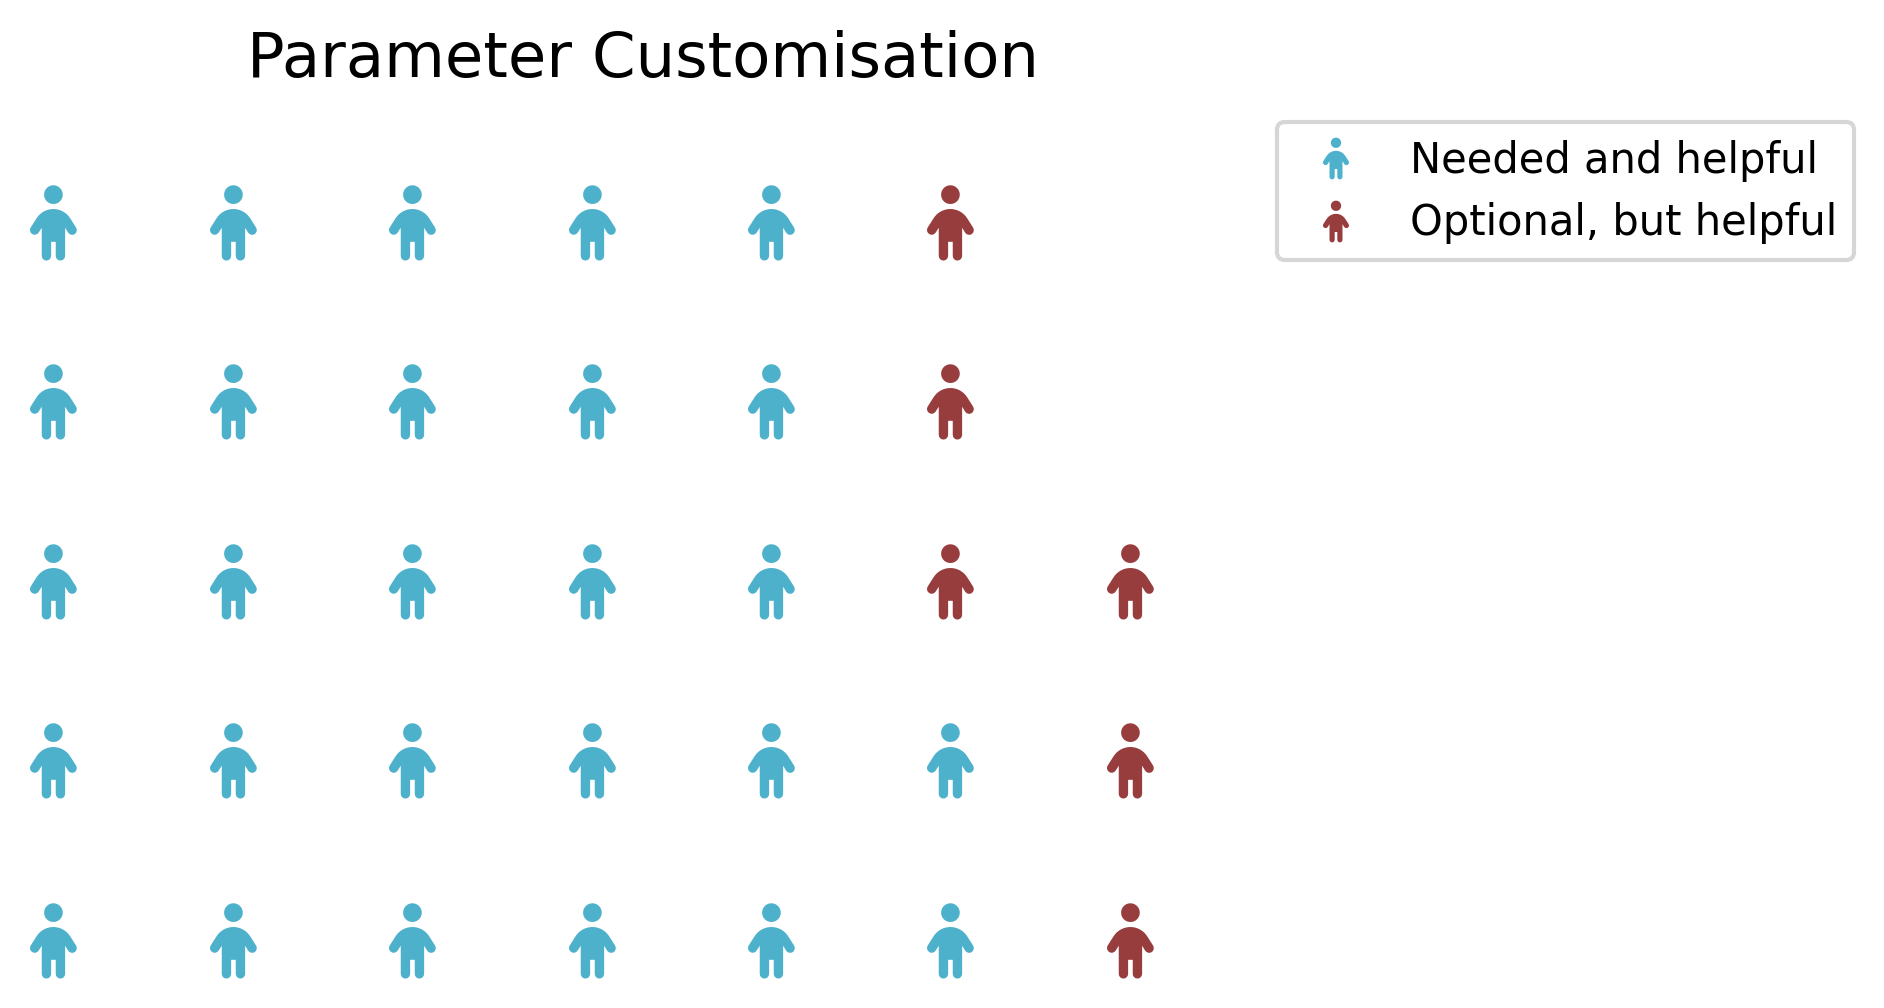

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

dict_parameter_customisation = {'Needed and helpful': 27, 'Optional, but helpful': 6}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    dpi=300,
    facecolor='white',
    values=dict_parameter_customisation,
    colors=("#4EB1CB", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=18,
    icon_legend=True
)

plt.title('Parameter Customisation', fontsize=15)
plt.show()

# # save figure
# plt.savefig('drive/My Drive/survey-response/parameter_customisation.png', dpi=300, bbox_inches='tight')


In [ ]:
# Quality Control Checks

df_qc = df['quality_control_checks'].value_counts().rename_axis('quality_control_checks').reset_index(name='count')
df_qc

quality_control_checks  count
0     Needed and helpful     29
1  Optional, but helpful      4

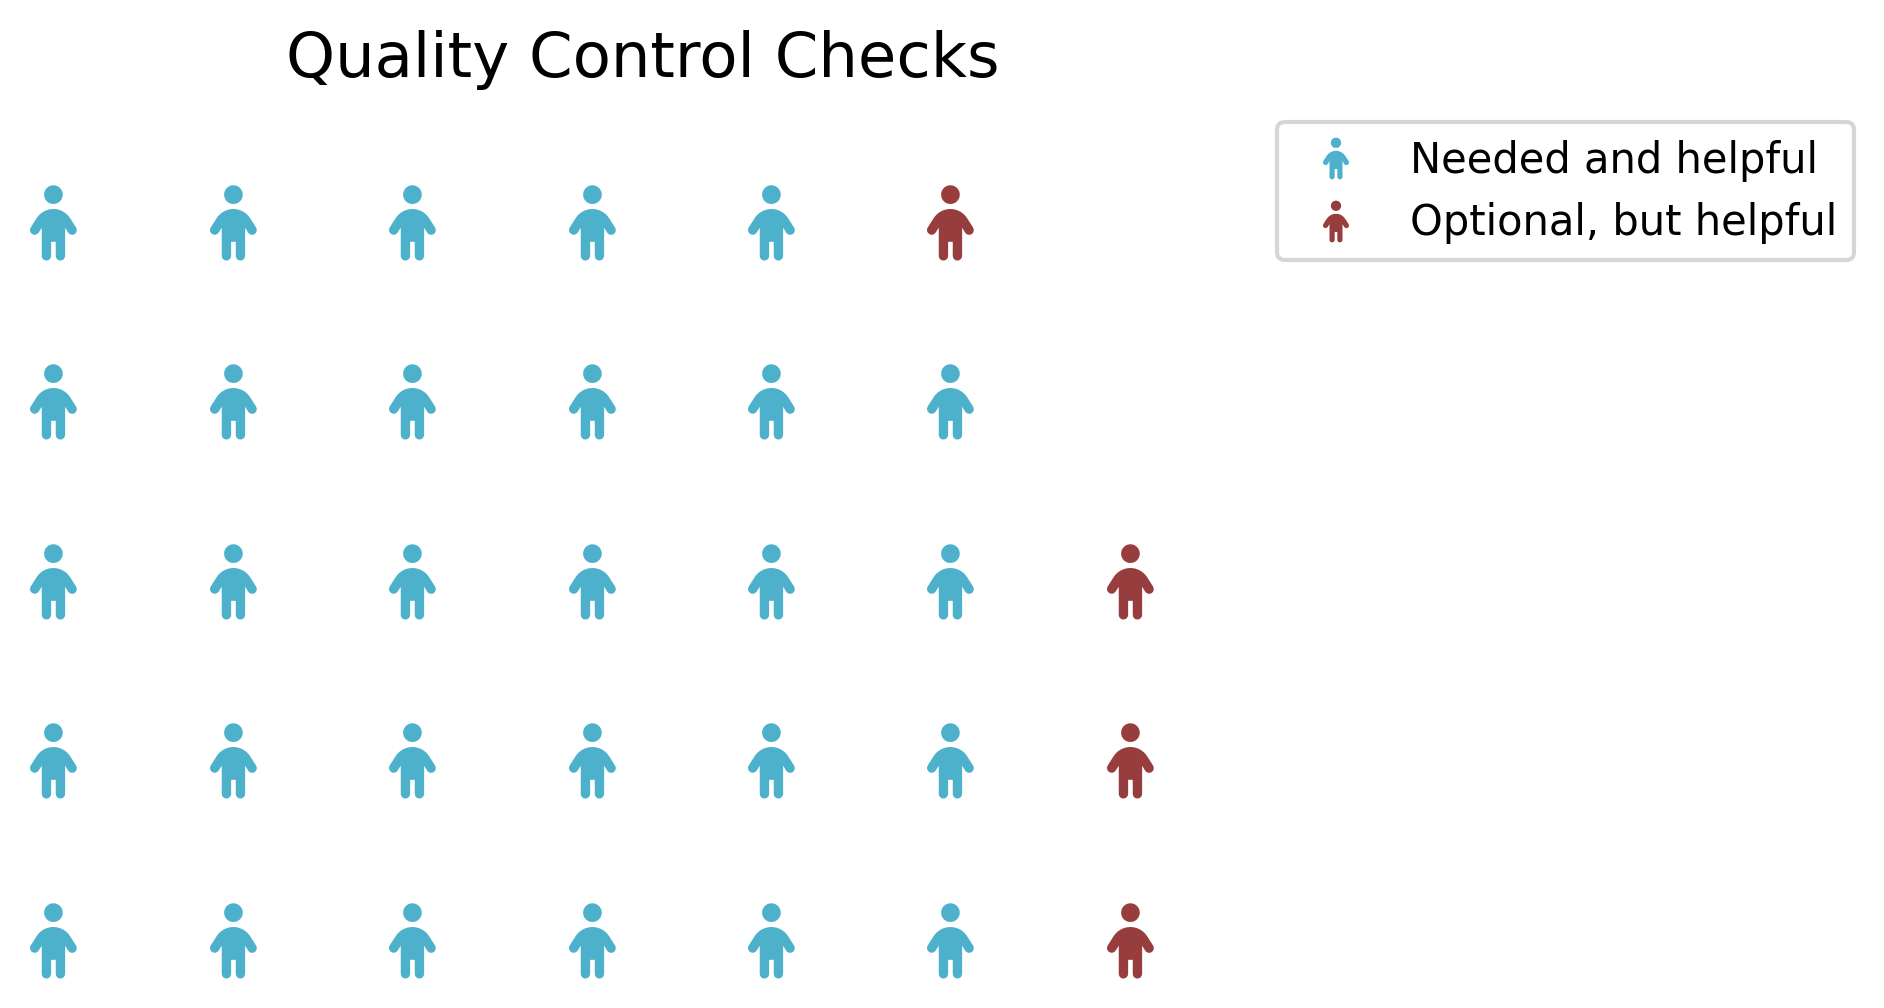

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

dict_quality_control_checks = {'Needed and helpful': 29, 'Optional, but helpful': 4}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    dpi=300,
    facecolor='white',
    values=dict_quality_control_checks,
    colors=("#4EB1CB", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=18,
    icon_legend=True
)

plt.title('Quality Control Checks', fontsize=15)
plt.show()

# # save figure
# plt.savefig('drive/My Drive/survey-response/quality_control_checks.png', dpi=300, bbox_inches='tight')

In [ ]:
# Clinically Actionable Diagnostic Report

df_actionable_diagnostic_report = df['clinically_actionable_diagnostic_report'].value_counts().rename_axis('clinically_actionable_diagnostic_report').reset_index(name='count')
df_actionable_diagnostic_report

clinically_actionable_diagnostic_report  count
0                      Needed and helpful     28
1                   Optional, but helpful      5

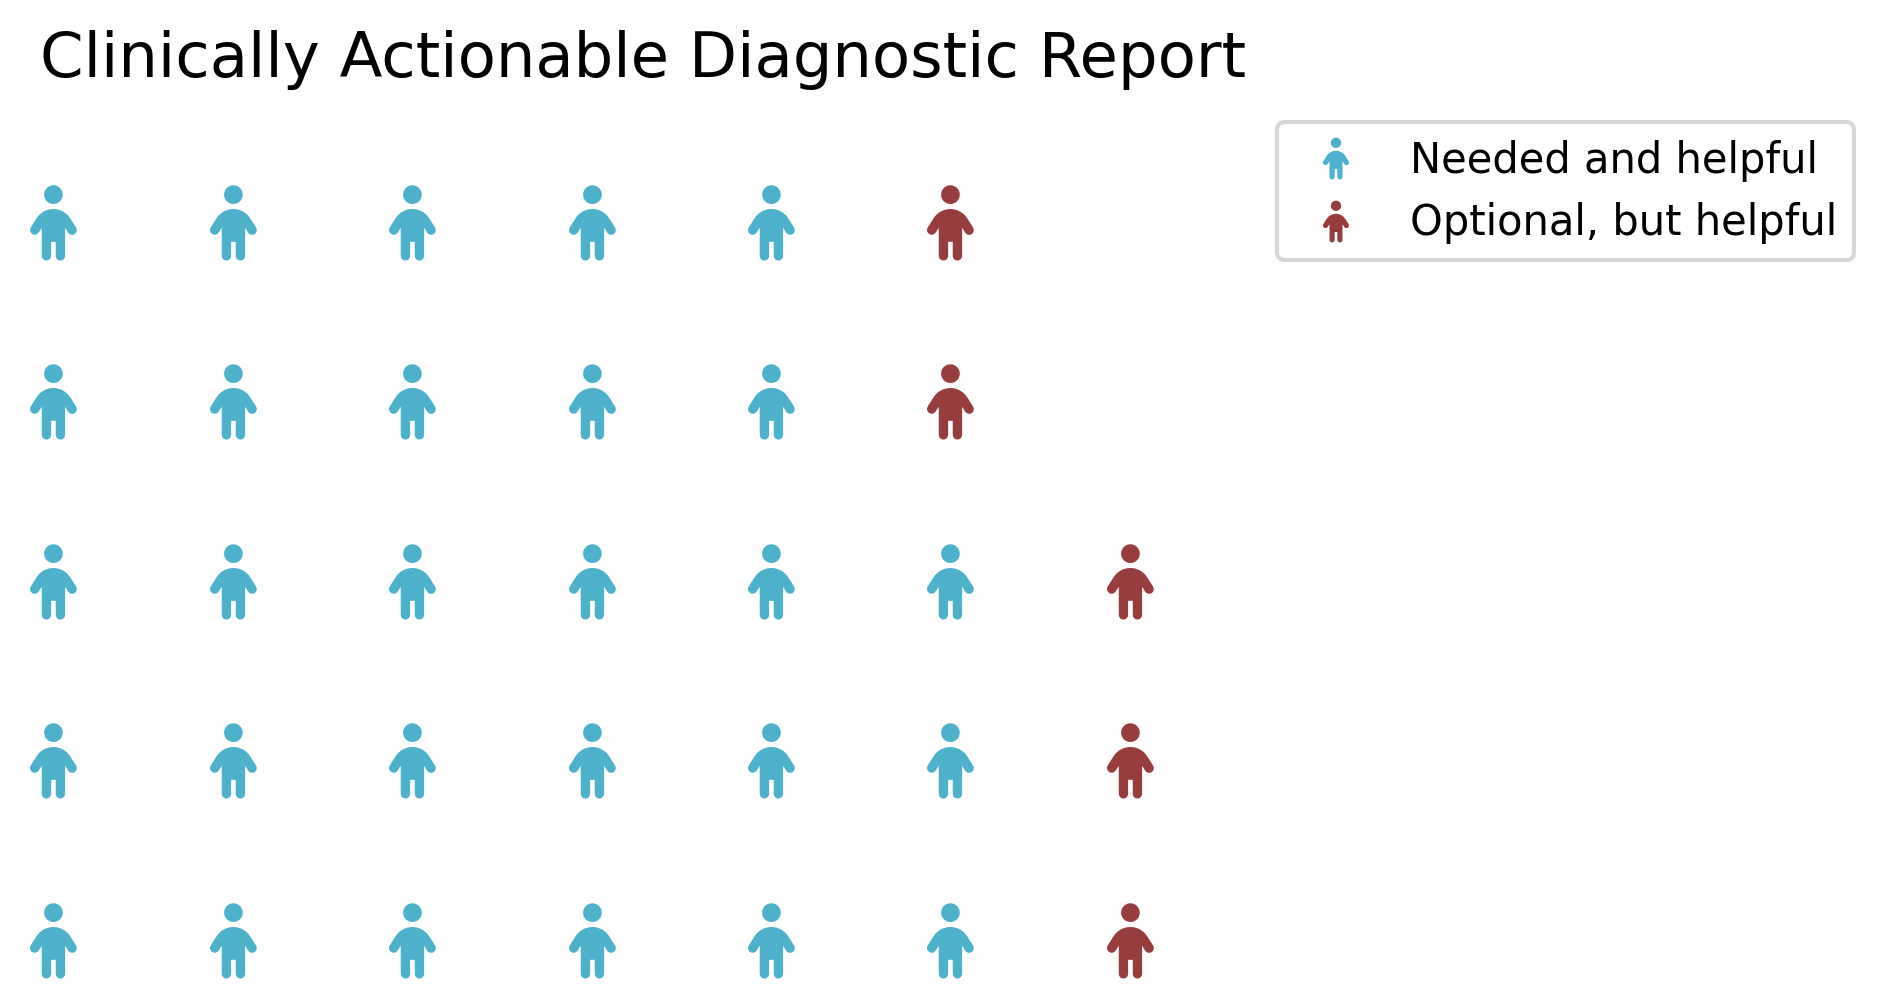

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

dict_actionable_diagnostic_report = {'Needed and helpful': 28, 'Optional, but helpful': 5}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    dpi=300,
    facecolor='white',
    values=dict_actionable_diagnostic_report,
    colors=("#4EB1CB", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=18,
    icon_legend=True
)

plt.title('Clinically Actionable Diagnostic Report', fontsize=15)
plt.show()

# # save figure
# plt.savefig('drive/My Drive/survey-response/clinically_actionable_diagnostic_report.png', dpi=300, bbox_inches='tight')

In [ ]:
# Data Sharing

df_data_sharing = df['data_sharing'].value_counts().rename_axis('data_sharing').reset_index(name='count')
df_data_sharing

data_sharing  count
0  Optional, but helpful     18
1     Needed and helpful     15

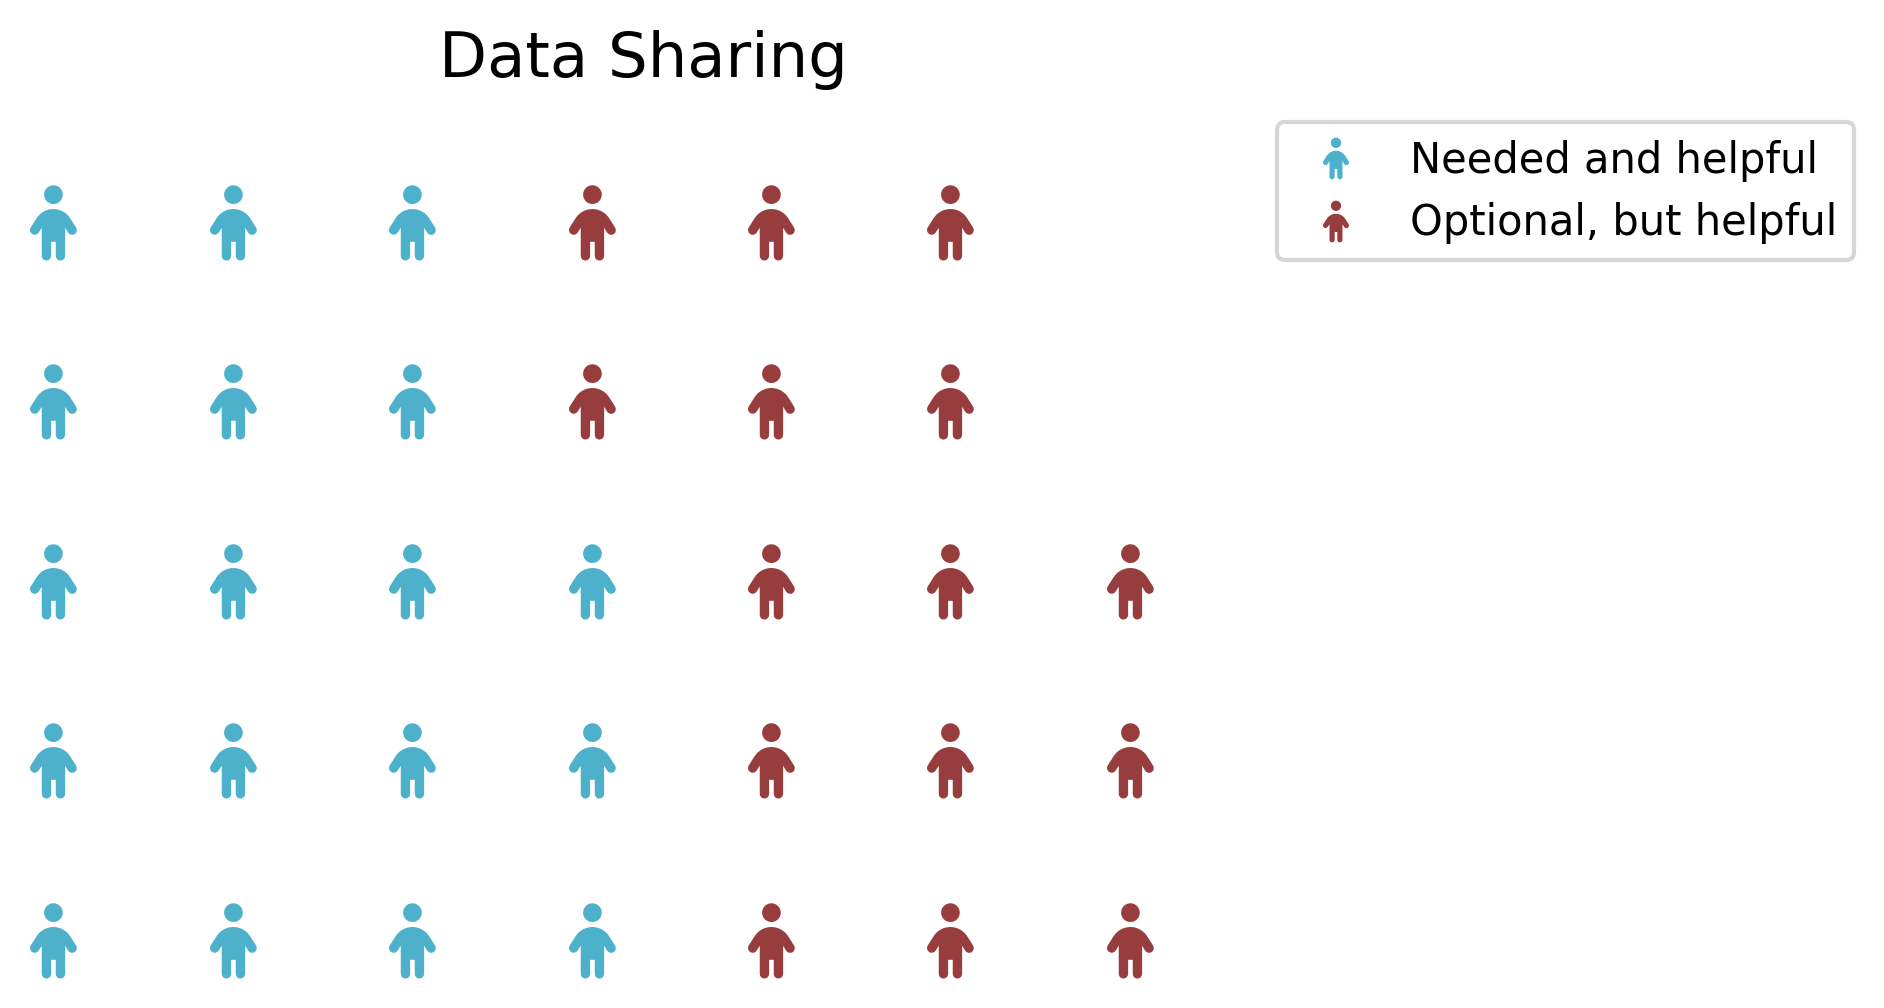

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

dict_data_sharing = {'Needed and helpful': 18, 'Optional, but helpful': 15}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    dpi=300,
    facecolor='white',
    values=dict_data_sharing,
    colors=("#4EB1CB", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=18,
    icon_legend=True
)

plt.title('Data Sharing', fontsize=15)
plt.show()

In [ ]:
# Data Visualization

df_data_visualization = df['data_visualization'].value_counts().rename_axis('data_visualization').reset_index(name='count')
df_data_visualization

data_visualization  count
0     Needed and helpful     24
1  Optional, but helpful      9

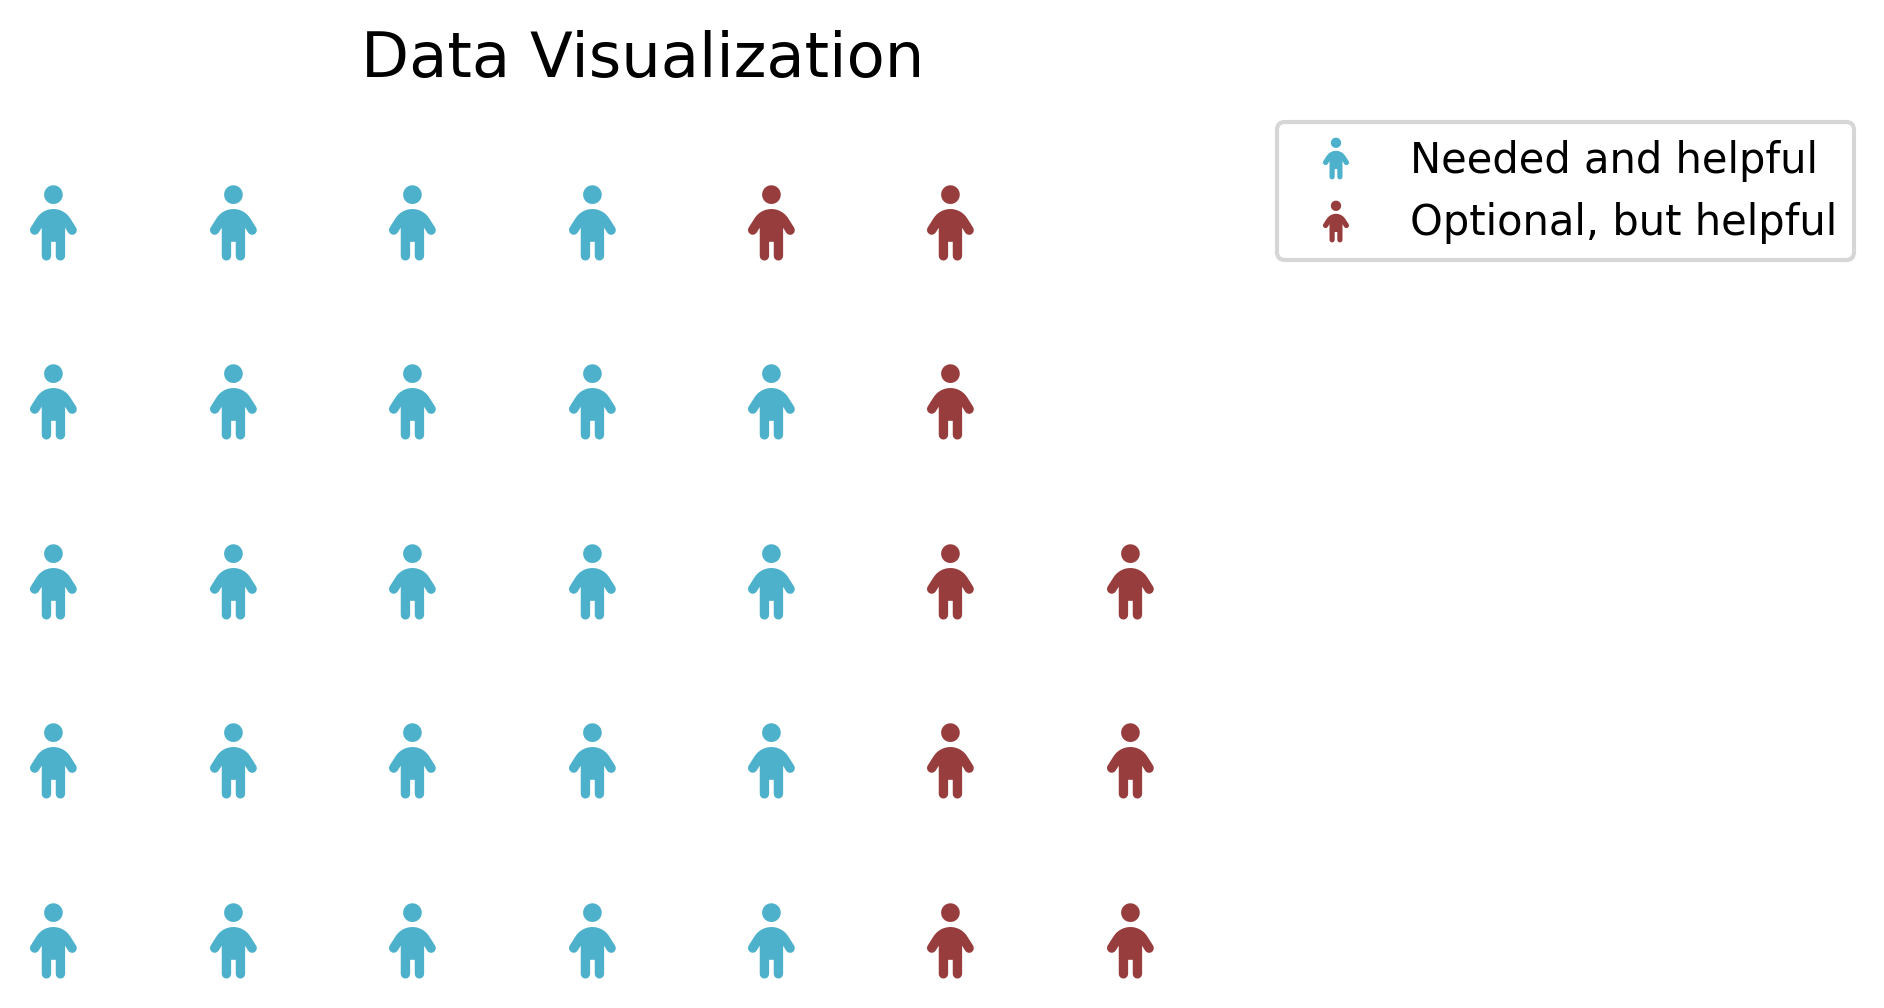

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

dict_data_visualization = {'Needed and helpful': 24, 'Optional, but helpful': 9}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    dpi=300,
    facecolor='white',
    values=dict_data_visualization,
    colors=("#4EB1CB", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=18,
    icon_legend=True
)

plt.title('Data Visualization', fontsize=15)
plt.show()

In [ ]:
# User Support

df_user_support = df['user_support'].value_counts().rename_axis('user_support').reset_index(name='count')
df_user_support

user_support  count
0     Needed and helpful     29
1  Optional, but helpful      4

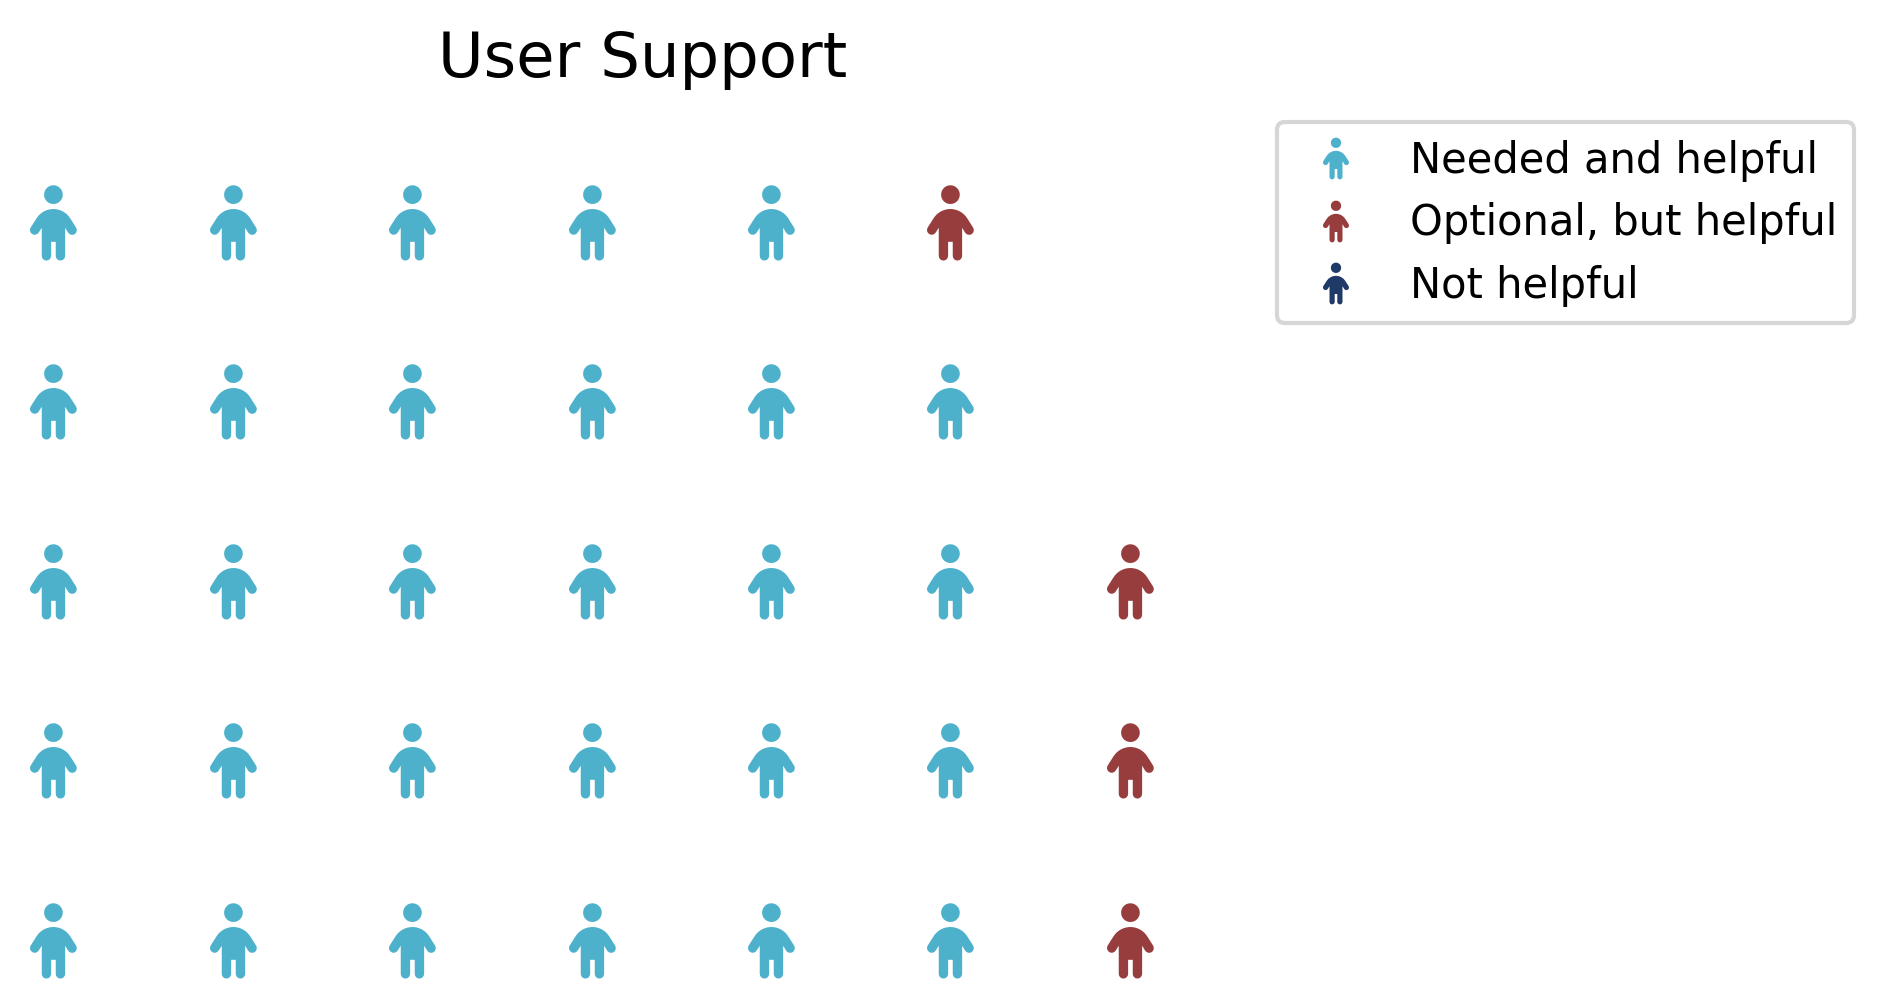

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

dict_user_support = {'Needed and helpful': 29, 'Optional, but helpful': 4, 'Not helpful':0}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    dpi=300,
    facecolor='white',
    values=dict_user_support,
    colors=("#4EB1CB", "#983D3D", "#1F3A68"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=18, # icon can change to user
    icon_legend=True
)

plt.title('User Support', fontsize=15)
plt.show()

# **C5. Unfulfilled needs by existing tools - horizontal bar chart (ct, pc)**

In [ ]:
# Check values
df['What are some of your needs that are not fulfilled by existing tools / software / workflow solutions for genetic data analysis?'].value_counts()

Do not provide or difficult to make follow-up enquiries                                                                                                                                                                      8
Do not provide guidance on which type of technology to be used (eg: to use sequencing or genotyping), Do not provide explanation of the results, Do not provide or difficult to make follow-up enquiries                     6
Do not provide explanation of the results                                                                                                                                                                                    6
Do not provide guidance on which type of technology to be used (eg: to use sequencing or genotyping), Do not provide explanation of the results                                                                              4
Do not provide guidance on which type of technology to be used (eg: to use sequencing or genotyping)        

In [ ]:
df_unfulfill_needs = df['What are some of your needs that are not fulfilled by existing tools / software / workflow solutions for genetic data analysis?'] \
  .str.split(', ') \
  .explode('What concerns would you have with such a software application?') \
  .replace(['Do not provide docker container setup', 'The necessity of periodical re-evaluation of  VUS', 'Static and flat',
            'N/A. genetic data analysis done by lab', 'VUS'],
           'Others') \
  .value_counts() \
  .rename_axis('unfulfill_needs') \
  .reset_index(name='count')

df_unfulfill_needs

unfulfill_needs  count
0          Do not provide explanation of the results     19
1  Do not provide or difficult to make follow-up ...     17
2  Do not provide guidance on which type of techn...     13
3                                             Others      5

In [ ]:
# Drop 'Others'
df_unfulfill_needs_clean = df_unfulfill_needs.drop(index=[3], axis=0)
df_unfulfill_needs_clean

unfulfill_needs  count
0          Do not provide explanation of the results     19
1  Do not provide or difficult to make follow-up ...     17
2  Do not provide guidance on which type of techn...     13

In [ ]:
# Add percentage column
df_unfulfill_needs_clean['%'] = ((df_unfulfill_needs_clean['count'] / df_unfulfill_needs_clean['count'].sum()) * 100).round(2)
df_unfulfill_needs_clean

unfulfill_needs  count      %
0          Do not provide explanation of the results     19  38.78
1  Do not provide or difficult to make follow-up ...     17  34.69
2  Do not provide guidance on which type of techn...     13  26.53

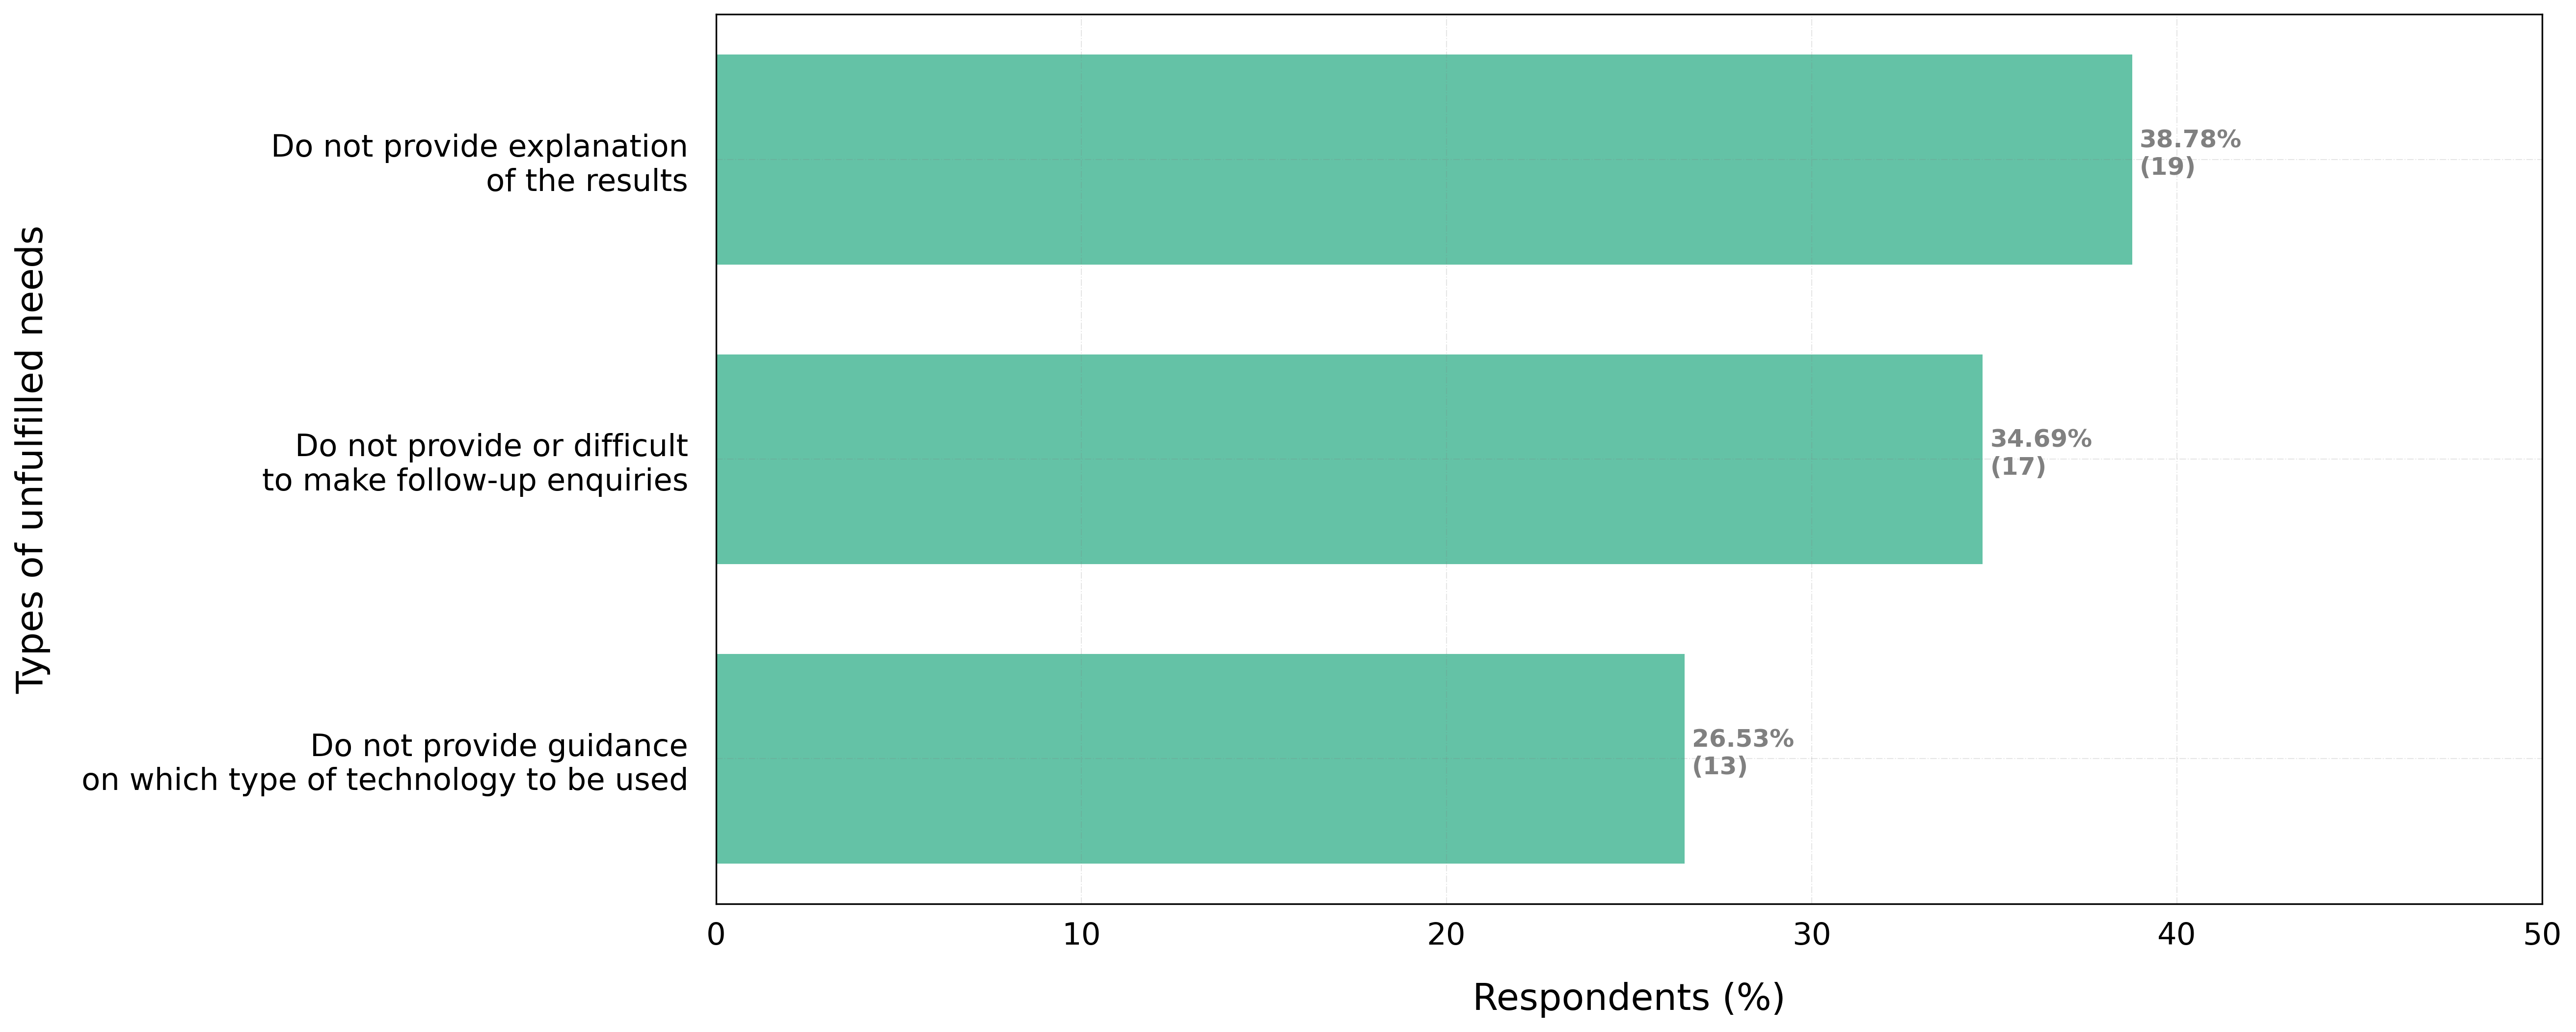

In [ ]:
# Horizontal bar plot
# reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
# reference: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)     # fontsize of the figure title and x, y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Read data
# unfulfill_needs = df_unfulfill_needs_clean['unfulfill_needs']
unfulfill_needs = ['Do not provide explanation\nof the results', 'Do not provide or difficult\nto make follow-up enquiries', 'Do not provide guidance\non which type of technology to be used']
percent = df_unfulfill_needs_clean['%']

# Figure size
fig, ax = plt.subplots(figsize =(16, 8))

# Change current axes
# plt.xlim(left=0, right=22)

# Horizontal bar plot
# my_colors = ['#4EB1CB', '#F66D44', '#64C2A6']
ax.barh(unfulfill_needs, percent, height=0.7, color='#64C2A6')

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Set xticks
plt.xticks([0,10,20,30,40,50])

# plt.yticks(['Do not provide guidance on which type of technology to be used (eg: to use sequencing or genotyping)',
#      'Do not provide explanation of the results',  'Do not provide or difficult to make follow-up enquiries'])

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
total = 0
for i in ax.patches:
  total += i.get_width()

for i in ax.patches:
    plt.text(i.get_width()+0.2,
             i.get_y()+0.4,
             '{}%\n({})'.format((i.get_width()), round(i.get_width() / total * 49)),
             fontsize = 12, fontweight ='bold',
             color ='grey')

# Set labels
plt.xlabel("Respondents (%)", labelpad = 15)
plt.ylabel("Types of unfulfilled needs", labelpad = 15)
# plt.title("Types of unfulfilled needs by existing genetic data analysis tools",
#           fontweight = 'bold', pad = 20)

# Display in 300dpi
plt.gcf().set_dpi(300)

# show plot
plt.show()